In [4]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
from tqdm import tqdm
import umap
import seaborn as sns
import sklearn
import glob
from typing import List, Dict, Tuple
from copy import deepcopy
from scipy.cluster.hierarchy import dendrogram
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, PolynomialFeatures
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from sklearn.cluster import FeatureAgglomeration, KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE, SelectFwe
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor, LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier, kneighbors_graph
from sklearn.svm import SVC, SVR
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import adjusted_rand_score, silhouette_score, mean_absolute_error, explained_variance_score, mean_squared_error, mean_squared_log_error, r2_score
from sklearn.metrics import f1_score

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from yellowbrick.cluster import KElbowVisualizer
from collections import OrderedDict


/Users/SamihaMahin/miniconda3/envs/cell_painting/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
cell_painting_data_path_3_22 = "/Users/SamihaMahin/Desktop/brack_lab/ISR_cellpainting/cell_painting_3_22_24_MuSCs/Objects_Population - Nuclei.csv"
cell_painting_data_path_3_24 = "/Users/SamihaMahin/Desktop/brack_lab/ISR_cellpainting/cell_painting_3_24_24_MuSCs/Objects_Population - Nuclei.csv"
# TODO: ADD FILE PATH FOR NEW DATA FILES

data_df_3_22_raw = pd.read_csv(cell_painting_data_path_3_22)
data_df_3_24_raw = pd.read_csv(cell_painting_data_path_3_24)
# TODO: READ NEW DATA

age_color_map = {
    "Ad": 'maroon',
    "Ag": 'darkgray',
    "AgS": 'lightskyblue',
}

sample_map = {
    "Ad": 'S1',
    "Ag": 'S2',
    "AgS": 'S2',   
}

batch_norm_map = {
    "S1": 'Ad',
    "S2": 'Ag',
}

age_experiment_map = {
    "All groups": ['Ad', 'Ag', 'AgS'],
    "Adult vs Aged": ['Ad', 'Ag'],
    "Aged vs Aged+Sal": ['Ag', 'AgS']
}


In [7]:
data_df_3_22_raw

Row  Column  Timepoint  Field  Object No    X    Y       Bounding Box  \
0        2       2          0      1          1   67   47      [1,1,138,117]   
1        2       2          0      1          2  997   60  [966,32,1060,103]   
2        2       2          0      1          3  714   51     [664,1,785,88]   
3        2       2          0      1          4  270   85   [202,42,316,110]   
4        2       2          0      1          5  328   92   [270,62,373,132]   
...    ...     ...        ...    ...        ...  ...  ...                ...   
16975    4       3          0    121          3  423  147   [326,81,461,177]   
16976    4       3          0    121          4   71  234    [47,208,94,259]   
16977    4       3          0    121          5  145  359  [120,302,170,393]   
16978    4       3          0    121          6  190  605  [164,578,226,699]   
16979    4       3          0    121          7  270  742  [236,694,306,865]   

       Position X [µm]  Position Y [µm]  ...  \
0               -85.89            89.89  ...   
1                85.31            86.84  ...   
2                32.08            90.57  ...   
3               -51.11            84.74  ...   
4               -40.25            80.44  ...   
...                ...              ...  ...   
16975           999.09          -952.53  ...   
16976           939.71          -969.45  ...   
16977           953.26          -991.24  ...   
16978           962.24         -1042.71  ...   
16979           976.20         -1064.86  ...   

       Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean  \
0                                                6478.33          
1                                                2184.23          
2                                                4127.52          
3                                                2773.88          
4                                                3564.15          
...                                                  ...          
16975                                            1834.26          
16976                                            5049.64          
16977                                            4181.06          
16978                                            3161.16          
16979                                            3475.19          

       Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum  \
0                                               68113200         
1                                                7976790         
2                                               23122300         
3                                                8962390         
4                                               11301900         
...                                                  ...         
16975                                           10385600         
16976                                           10139700         
16977                                           12066500         
16978                                           14996600         
16979                                           18376800         

       Nuclei - Cell Area [µm²]  Nuclei - Cell Roundness  \
0                      348.7470                 0.646806   
1                      121.1360                 0.406222   
2                      185.8170                 0.559590   
3                      107.1710                 0.529886   
4                      105.1810                 0.660634   
...                         ...                      ...   
16975                  187.8070                 0.535380   
16976                   66.6049                 0.945874   
16977                   95.7279                 0.718381   
16978                  157.3570                 0.666898   
16979                  175.4020                 0.548509   

       Nuclei - Cell Width [µm]  Nuclei - Cell Length [µm]  \
0                      14.73760                    31.7317   
1                       8.

In [8]:
data_df_3_24_raw

Row  Column  Timepoint  Field  Object No    X     Y  \
0        2       2          0      1          1  747    89   
1        2       2          0      1          2  465   145   
2        2       2          0      1          3  959   188   
3        2       2          0      1          4  287   241   
4        2       2          0      1          5  653   275   
...    ...     ...        ...    ...        ...  ...   ...   
11562    4       3          0    132         29  419   913   
11563    4       3          0    132         30  177   919   
11564    4       3          0    132         31  346   993   
11565    4       3          0    132         32  510  1012   
11566    4       3          0    132         33  975  1035   

              Bounding Box  Position X [µm]  Position Y [µm]  ...  \
0         [701,33,804,140]            37.45            81.46  ...   
1        [422,100,618,188]            -5.76            70.96  ...   
2       [905,155,1008,225]            76.31            64.09  ...   
3        [247,207,389,277]           -43.39            54.22  ...   
4        [552,195,707,339]            19.53            50.75  ...   
...                    ...              ...              ...  ...   
11562    [320,861,465,955]         -1049.98         -1298.06  ...   
11563    [106,886,220,956]         -1093.54         -1299.30  ...   
11564   [323,962,369,1026]         -1060.50         -1312.36  ...   
11565   [469,972,540,1070]         -1031.82         -1317.25  ...   
11566  [944,974,1030,1066]          -943.75         -1319.03  ...   

       Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean  \
0                                                2911.48          
1                                                2790.87          
2                                                2449.94          
3                                                3706.20          
4                                                3422.77          
...                                                  ...          
11562                                            2607.73          
11563                                            2983.69          
11564                                            3306.09          
11565                                            3655.16          
11566                                            1905.48          

       Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum  \
0                                               18121100         
1                                               28260300         
2                                               10743000         
3                                               21092000         
4                                               32215200         
...                                                  ...         
11562                                           15776800         
11563                                           15879200         
11564                                            7504820         
11565                                           14759500         
11566                                            7608580         

       Nuclei - Cell Area [µm²]  Nuclei - Cell Roundness  \
0                      206.3980                 0.715895   
1                      335.7940                 0.464480   
2                      145.4140                 0.718714   
3                      188.7230                 0.628756   
4                      312.1170                 0.459095   
...                         ...                      ...   
11562                  200.6280                 0.499717   
11563                  176.4860                 0.779295   
11564                   75.2768                 0.880353   
11565                  133.9070                 0.745501   
11566                  132.4140                 0.596778   

       Nuclei - Cell Width [µm]  Nuclei - Cell Length [µm]  \
0                      13.05570                    2

## Data cleanup and preprocessing

In [9]:
relevant_columns = [
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean',
    'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px',
    'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px',
    'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum',
    'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean',
    'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
    'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean',
    'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum',
    'Nuclei - Cell Area [µm²]',
    'Nuclei - Cell Roundness',
    'Nuclei - Cell Width [µm]',
    'Nuclei - Cell Length [µm]',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean',
    'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum',
]
print(len(relevant_columns))

73


In [10]:
#TODO: if we want to add more features, add them/uncomment to the feature_mapping

feature_mapping = {
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Mean': 'DAPI nucleus intensity mean',
    'Nuclei - Intensity Nucleus Hoechst 33342 - nucleus Sum': 'DAPI nucleus intensity sum',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Mean': 'DAPI cyto intensity mean',
    # 'Nuclei - Intensity Cytoplasm Hoechst 33342 - nucleus Sum': 'DAPI cyto intensity sum',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Mean': 'DAPI cell intensity mean',
    # 'Nuclei - Intensity Cell Hoechst 33342 - nucleus Sum': 'DAPI cell intensity sum',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Spot 0.2 px': 'Actin texture spot',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Hole 0.2 px': 'Actin texture hole',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Edge 0.2 px': 'Actin texture edge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Ridge 0.2 px': 'Actin texture ridge',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Valley 0.2 px': 'Actin texture valley',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Saddle 0.2 px': 'Actin texture saddle',
    'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Bright 0.2 px': 'Actin texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Spot 0.2 px': 'Mito texture spot',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Hole 0.2 px': 'Mito texture hole',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Edge 0.2 px': 'Mito texture edge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Ridge 0.2 px': 'Mito texture ridge',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Valley 0.2 px': 'Mito texture valley',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Saddle 0.2 px': 'Mito texture saddle',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Bright 0.2 px': 'Mito texture bright',
    'Nuclei - Cell MitoTracker Deep Red - mito SER Dark 0.2 px': 'Mito texture dark',
    # 'Nuclei - Intensity Nucleus Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin nucleus intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cyto intensity mean',
    'Nuclei - Intensity Cytoplasm Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cyto intensity sum',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Mean': 'Actin cell intensity mean',
    # 'Nuclei - Intensity Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane Sum': 'Actin cell intensity sum',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Mean': 'Mito nucleus intensity mean',
    # 'Nuclei - Intensity Nucleus MitoTracker Deep Red - mito Sum': 'Mito nucleus intensity sum',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Mean': 'Mito cyto intensity mean',
    'Nuclei - Intensity Cytoplasm MitoTracker Deep Red - mito Sum': 'Mito cyto intensity sum',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Mean': 'Mito cell intensity mean',
    # 'Nuclei - Intensity Cell MitoTracker Deep Red - mito Sum': 'Mito cell intensity sum',
    'Nuclei - Cell Area [µm²]': 'Cell area',
    'Nuclei - Cell Roundness': 'Cell roundness',
    'Nuclei - Cell Width [µm]': 'Cell width',
    'Nuclei - Cell Length [µm]': 'Cell length',
   
}

relevant_features = [feature_mapping[col] for col in relevant_columns if col in feature_mapping]



In [11]:
def process_data(data_df_raw, curr_exp, batch_normalize=True):
    data_df_clean = data_df_raw.loc[:, [i for i in relevant_columns if i in feature_mapping]]
    data_df_clean.columns = [feature_mapping[col] for col in data_df_clean.columns]
    data_df_clean.insert(0, 'Exp', [curr_exp]*len(data_df_clean))
    data_df_clean.insert(1, 'Well ID', [i for i in zip(data_df_raw['Row'], data_df_raw['Column'])])
    data_df_clean.insert(2, 'Field', data_df_raw['Field'])
    data_df_clean.insert(3, 'Age', data_df_raw['Group'])
    data_df_clean.insert(4, 'Sample', [curr_exp + " " + sample_map[i] for i in data_df_raw['Group']])
    data_df_clean = data_df_clean.replace([np.inf, -np.inf], np.nan)
    data_df_clean = data_df_clean.dropna(axis=0, how='any', subset=None, inplace=False)
    print(f"Dropped {len(data_df_raw)-len(data_df_clean)} rows")

    if batch_normalize:
        data_df_normalized = pd.DataFrame()
        for sample in np.unique(data_df_clean.Sample):
            normalizer = RobustScaler()
            normalized_group = data_df_clean.loc[data_df_clean.Sample==sample]
            train_set = normalized_group.loc[normalized_group.Age==batch_norm_map[sample.split()[-1]]]
            normalizer.fit(train_set.loc[:, relevant_features])
            normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transform(normalizer.transform)
            data_df_normalized = pd.concat([data_df_normalized, normalized_group])
        return data_df_normalized

    return data_df_clean


In [12]:
#TODO: for any new experiments do process_data and add to data_df_combined
data_df_3_22 = process_data(data_df_raw=data_df_3_22_raw, curr_exp="3_22", batch_normalize=True)
data_df_3_24 = process_data(data_df_raw=data_df_3_24_raw, curr_exp="3_24", batch_normalize=True)
data_df_combined = pd.concat([data_df_3_22, data_df_3_24])

Dropped 13 rows
Dropped 24 rows


/var/folders/77/x6qg0ssj59b1b0t1ph730np40000gn/T/ipykernel_77079/659390158.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4.60380441 -0.65452449  0.10293551 ...  0.43070912  0.59792075
  0.06078016]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transform(normalizer.transform)
/var/folders/77/x6qg0ssj59b1b0t1ph730np40000gn/T/ipykernel_77079/659390158.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 3.08508345 -0.4793585   0.79524071 ... -0.52756305  2.764206
  0.05065099]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_group.loc[:, relevant_features] = normalizer.transform(normalized_group.loc[:, relevant_features]) #.transfor

In [13]:
data_df_3_22

Exp Well ID  Field  Age   Sample  DAPI nucleus intensity mean  \
0      3_22  (2, 2)      1   Ad  3_22 S1                    -0.551728   
1      3_22  (2, 2)      1   Ad  3_22 S1                    -0.653592   
2      3_22  (2, 2)      1   Ad  3_22 S1                    -0.800411   
3      3_22  (2, 2)      1   Ad  3_22 S1                    -0.065392   
4      3_22  (2, 2)      1   Ad  3_22 S1                     0.414287   
...     ...     ...    ...  ...      ...                          ...   
16975  3_22  (4, 3)    121  AgS  3_22 S2                    -0.127637   
16976  3_22  (4, 3)    121  AgS  3_22 S2                     1.500404   
16977  3_22  (4, 3)    121  AgS  3_22 S2                     1.067960   
16978  3_22  (4, 3)    121  AgS  3_22 S2                     0.469207   
16979  3_22  (4, 3)    121  AgS  3_22 S2                     0.133161   

       DAPI nucleus intensity sum  Actin texture spot  Actin texture hole  \
0                        4.603804           -0.659380           -0.410470   
1                       -0.654524            1.644321            0.815784   
2                        0.102936            0.597449            0.429114   
3                        0.356169           -0.104486           -0.021137   
4                        0.322815           -0.673020           -0.564213   
...                           ...                 ...                 ...   
16975                    0.222422            0.817766            0.391865   
16976                    0.058801           -0.212098           -0.997045   
16977                    0.527275           -0.278003           -0.927708   
16978                    0.366496           -0.432699           -0.372565   
16979                    0.477167           -0.237563           -0.158902   

       Actin texture edge  ...  Mito texture bright  Mito texture dark  \
0               -0.088995  ...            -0.253857          -0.253574   
1               -0.232516  ...             1.078635           0.986686   
2                1.018482  ...             0.145450           0.127086   
3               -0.235089  ...             1.194069           0.558204   
4                0.307566  ...             0.077728           0.143658   
...                   ...  ...                  ...                ...   
16975            0.184339  ...             0.064496           0.089931   
16976            1.588892  ...             0.059251           0.000567   
16977            0.639458  ...            -0.483404          -0.461692   
16978           -0.149427  ...            -0.637389          -0.723487   
16979           -0.089172  ...            -0.110823          -0.412568   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       1.761702                  3.085083   
1                      -0.409930                 -0.479359   
2                       1.168038                  0.795241   
3                       0.450016                 -0.309129   
4                       1.044714                 -0.038483   
...                          ...                       ...   
16975                   0.213935                  0.378474   
16976                   2.141810                 -0.257482   
16977                   1.236863                 -0.096104   
16978                   0.447631                  0.299387   
16979                  -0.160162                  0.050926   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.718117                 3.183574   1.476258   
1                     -0.674686                -0.560473  -0.245810   
2                      0.633632                 0.519892   0.243556   
3                      0.297146                -0.289947  -0.351467   
4                      0.128350                -0.287763  -0.366523   
...                         ...                      ...        ...   
16975                 -0.727232                -0.291115   0.249022   
1697

In [14]:
data_df_3_24

Exp Well ID  Field  Age   Sample  DAPI nucleus intensity mean  \
0      3_24  (2, 2)      1   Ad  3_24 S1                    -0.271082   
1      3_24  (2, 2)      1   Ad  3_24 S1                    -0.097038   
2      3_24  (2, 2)      1   Ad  3_24 S1                     0.131164   
3      3_24  (2, 2)      1   Ad  3_24 S1                     0.076056   
4      3_24  (2, 2)      1   Ad  3_24 S1                     0.176028   
...     ...     ...    ...  ...      ...                          ...   
11562  3_24  (4, 3)    132  AgS  3_24 S2                     0.201400   
11563  3_24  (4, 3)    132  AgS  3_24 S2                     0.592979   
11564  3_24  (4, 3)    132  AgS  3_24 S2                     0.946870   
11565  3_24  (4, 3)    132  AgS  3_24 S2                     0.218982   
11566  3_24  (4, 3)    132  AgS  3_24 S2                     0.217319   

       DAPI nucleus intensity sum  Actin texture spot  Actin texture hole  \
0                        0.016297            0.166952           -0.622557   
1                        0.078688           -0.300254           -0.308948   
2                       -0.076645            0.112757           -0.292852   
3                        0.482819            0.045232           -0.831971   
4                        0.312073           -0.364779           -0.252089   
...                           ...                 ...                 ...   
11562                    0.972444           -0.929886           -1.294359   
11563                    3.137749           -1.307453           -1.554087   
11564                   -2.650668           -1.045349           -1.452891   
11565                    0.174080           -0.735010           -1.438620   
11566                   -0.304111            0.016742           -0.323462   

       Actin texture edge  ...  Mito texture bright  Mito texture dark  \
0                0.105281  ...            -0.082389          -0.169468   
1               -0.254916  ...            -0.151463          -0.151711   
2               -0.229348  ...             1.525374           1.500650   
3                1.026345  ...            -0.157266          -0.220061   
4                0.315725  ...             0.007012          -0.041190   
...                   ...  ...                  ...                ...   
11562            0.236806  ...             0.215684           0.265128   
11563            0.433290  ...            -0.410545          -0.382619   
11564            0.614176  ...            -0.114341          -0.147363   
11565            0.149485  ...             0.593133           0.626386   
11566            0.292902  ...             1.859908           2.004557   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       1.079519                 -0.073124   
1                       0.376731                  0.368841   
2                       0.533772                 -0.443294   
3                       1.241426                 -0.110829   
4                       0.458616                  0.324552   
...                          ...                       ...   
11562                   0.703983                 -0.285473   
11563                   1.458213                 -0.322031   
11564                   1.074757                 -0.623346   
11565                   0.552946                 -0.561858   
11566                   0.226965                 -0.591767   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      0.825569                -0.113535  -0.274306   
1                      0.267201                 0.359697   0.157806   
2                      0.076328                -0.527309  -0.477960   
3                      1.568587                 0.009839  -0.333331   
4                      1.113611                 0.748580   0.078738   
...                         ...                      ...        ...   
11562                  0.429373                -0.334535  -0.341108   
1156

In [15]:

data_df_combined

Exp Well ID  Field  Age   Sample  DAPI nucleus intensity mean  \
0      3_22  (2, 2)      1   Ad  3_22 S1                    -0.551728   
1      3_22  (2, 2)      1   Ad  3_22 S1                    -0.653592   
2      3_22  (2, 2)      1   Ad  3_22 S1                    -0.800411   
3      3_22  (2, 2)      1   Ad  3_22 S1                    -0.065392   
4      3_22  (2, 2)      1   Ad  3_22 S1                     0.414287   
...     ...     ...    ...  ...      ...                          ...   
11562  3_24  (4, 3)    132  AgS  3_24 S2                     0.201400   
11563  3_24  (4, 3)    132  AgS  3_24 S2                     0.592979   
11564  3_24  (4, 3)    132  AgS  3_24 S2                     0.946870   
11565  3_24  (4, 3)    132  AgS  3_24 S2                     0.218982   
11566  3_24  (4, 3)    132  AgS  3_24 S2                     0.217319   

       DAPI nucleus intensity sum  Actin texture spot  Actin texture hole  \
0                        4.603804           -0.659380           -0.410470   
1                       -0.654524            1.644321            0.815784   
2                        0.102936            0.597449            0.429114   
3                        0.356169           -0.104486           -0.021137   
4                        0.322815           -0.673020           -0.564213   
...                           ...                 ...                 ...   
11562                    0.972444           -0.929886           -1.294359   
11563                    3.137749           -1.307453           -1.554087   
11564                   -2.650668           -1.045349           -1.452891   
11565                    0.174080           -0.735010           -1.438620   
11566                   -0.304111            0.016742           -0.323462   

       Actin texture edge  ...  Mito texture bright  Mito texture dark  \
0               -0.088995  ...            -0.253857          -0.253574   
1               -0.232516  ...             1.078635           0.986686   
2                1.018482  ...             0.145450           0.127086   
3               -0.235089  ...             1.194069           0.558204   
4                0.307566  ...             0.077728           0.143658   
...                   ...  ...                  ...                ...   
11562            0.236806  ...             0.215684           0.265128   
11563            0.433290  ...            -0.410545          -0.382619   
11564            0.614176  ...            -0.114341          -0.147363   
11565            0.149485  ...             0.593133           0.626386   
11566            0.292902  ...             1.859908           2.004557   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       1.761702                  3.085083   
1                      -0.409930                 -0.479359   
2                       1.168038                  0.795241   
3                       0.450016                 -0.309129   
4                       1.044714                 -0.038483   
...                          ...                       ...   
11562                   0.703983                 -0.285473   
11563                   1.458213                 -0.322031   
11564                   1.074757                 -0.623346   
11565                   0.552946                 -0.561858   
11566                   0.226965                 -0.591767   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.718117                 3.183574   1.476258   
1                     -0.674686                -0.560473  -0.245810   
2                      0.633632                 0.519892   0.243556   
3                      0.297146                -0.289947  -0.351467   
4                      0.128350                -0.287763  -0.366523   
...                         ...                      ...        ...   
11562                  0.429373                -0.334535  -0.341108   
1156

## Feature Analysis 

### Pie plot age count distribution

Text(0.5, 1.0, 'cell_painting_combined cell distribution pie plot')

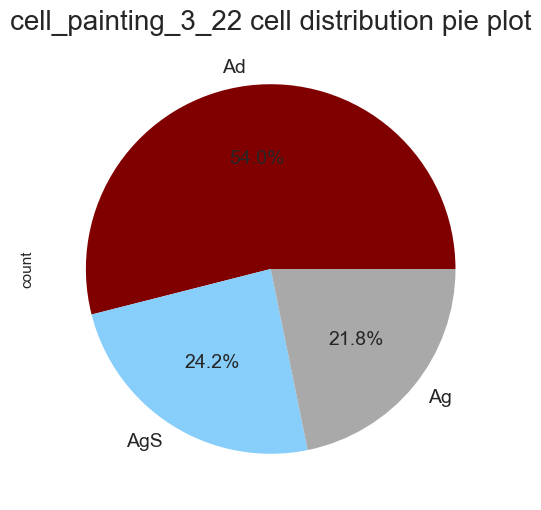

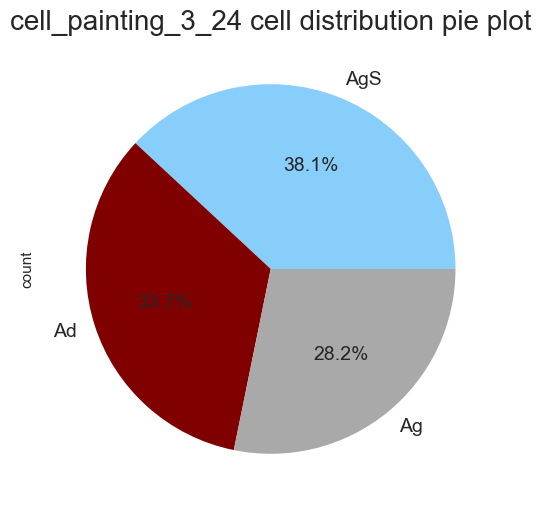

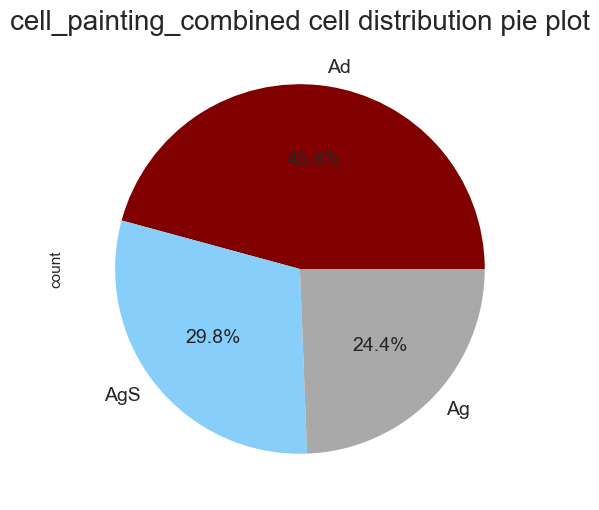

In [16]:
"""
Plots the fraction of number of cells for each Age group
"""
#TODO: change the pie into a histogram, make for loop for each experiment or add dictionary color mapping

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plot_title = f"cell_painting_3_22 cell distribution pie plot"
data_df_3_22.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','lightskyblue','darkgray'])
plt.title(plot_title, fontsize=20)


plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plot_title = f"cell_painting_3_24 cell distribution pie plot"
data_df_3_24.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['lightskyblue', 'maroon', 'darkgray'])
plt.title(plot_title, fontsize=20)

plt.rcParams["figure.figsize"] = (8,6)
plt.figure()
plot_title = f"cell_painting_combined cell distribution pie plot"
data_df_combined.Age.value_counts().plot.pie(fontsize=14,autopct='%.1f%%', colors=['maroon','lightskyblue','darkgray'])
plt.title(plot_title, fontsize=20)

### PCA visualization

In [17]:
def viz_pca2(data_df_all, curr_exp):

    for age_exp in age_experiment_map:

        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
        relevant_data_df = data_df.groupby(['Exp', 'Well ID','Age', 'Sample']).mean().reset_index()
        if curr_exp == "cell painting combination":
            
            style_type = None
        else:
            # relevant_data_df = data_df.groupby(['Well ID','Age']).mean().reset_index()
            style_type = None
        age_label = relevant_data_df['Age']
        relevant_np = np.array(relevant_data_df.loc[:, relevant_features])

        pca = PCA(n_components=2)
        pca_np = pca.fit_transform(relevant_np)

        relevant_data_df["pca_dim1"] = pca_np[:, 0]
        relevant_data_df["pca_dim2"] = pca_np[:, 1]
        relevant_data_df["Age"] = age_label

        plt.figure(figsize=(10,10))
        plt.title(f"{age_exp} PCA of {curr_exp} features", fontsize=30)
        sns.scatterplot(
            x="pca_dim1", y="pca_dim2",
            hue="Age",
            style=style_type,
            data=relevant_data_df,
            legend="full",
            palette=age_color_map,
            s = 50,
            # marker='o',
        )
        plt.legend(fontsize=15)
        plt.xlabel("PCA dim1",fontsize=20)
        plt.ylabel("PCA dim2", fontsize=20)


def viz_TSNE(data_df_all, curr_exp):

    for age_exp in age_experiment_map:
        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
        relevant_data_df = data_df.groupby(['Exp', 'Well ID', 'Field','Age', 'Sample']).mean().reset_index()

        if curr_exp == "cell painting combination":
            style_type = None
        else:
            # relevant_data_df = data_df.groupby(['Well ID', 'Field', 'Age']).mean().reset_index()
            style_type = None
        age_label = relevant_data_df['Age']
        relevant_np = np.array(relevant_data_df.loc[:, relevant_features])

        tsne = TSNE(n_components=2)
        tsne_np = tsne.fit_transform(relevant_np)

        relevant_data_df["tsne_dim1"] = tsne_np[:, 0]
        relevant_data_df["tsne_dim2"] = tsne_np[:, 1]
        relevant_data_df["Age"] = age_label

        plt.figure(figsize=(10,10))
        plt.title(f"{age_exp} TSNE of {curr_exp} features", fontsize=30)
        sns.scatterplot(
            x="tsne_dim1", y="tsne_dim2",
            hue="Age",
            style=style_type,
            data=relevant_data_df,
            legend="full",
            palette=age_color_map,
            s = 50,
            marker='o',
        )
        plt.legend(fontsize=15)
        plt.xlabel("TSNE dim1",fontsize=20)
        plt.ylabel("TSNE dim2", fontsize=20)

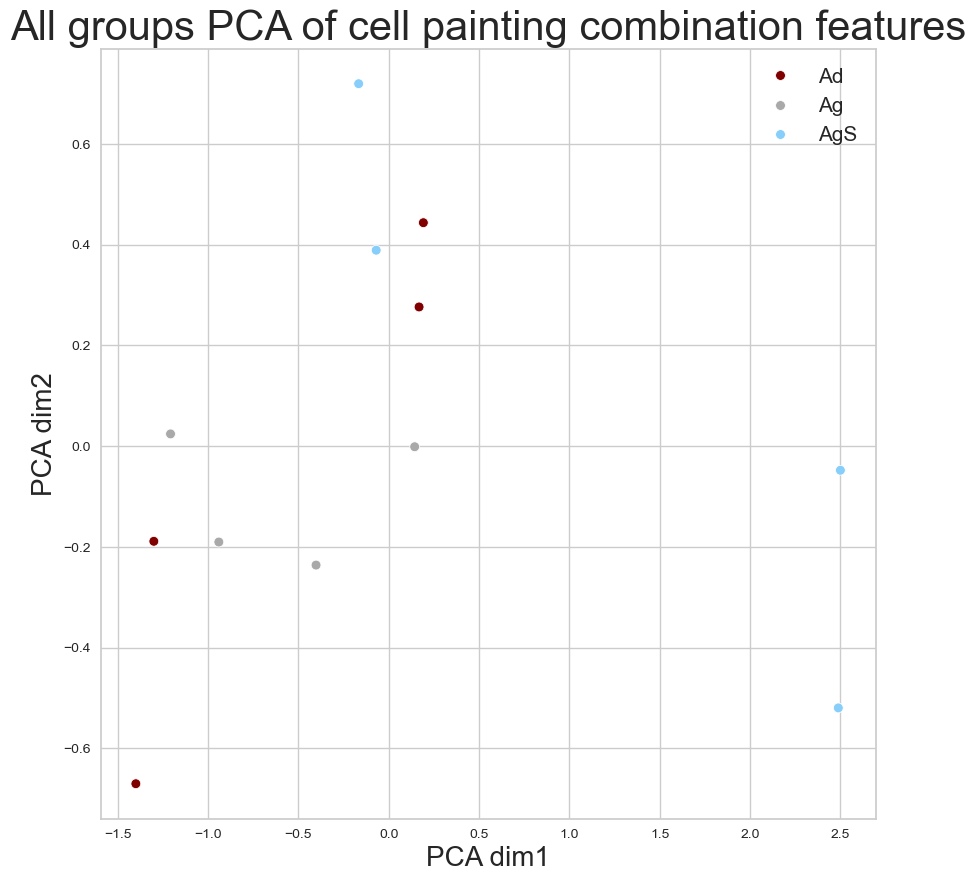

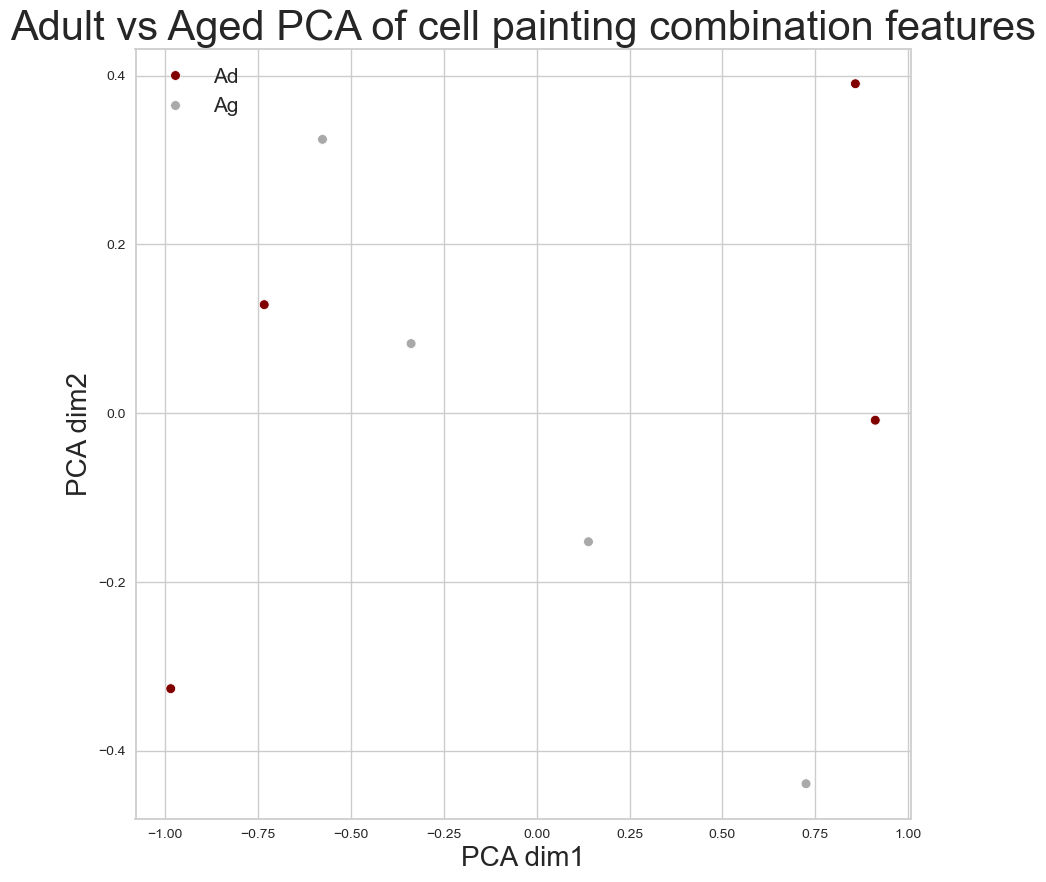

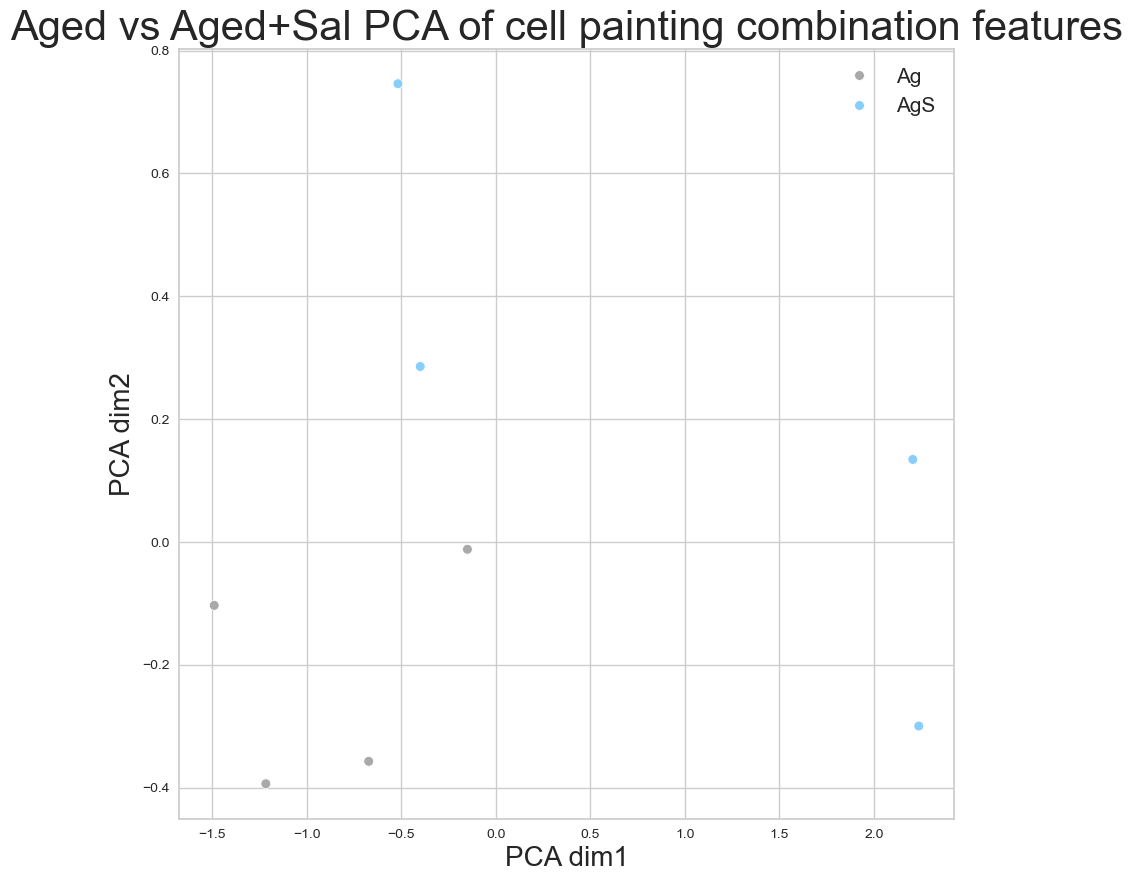

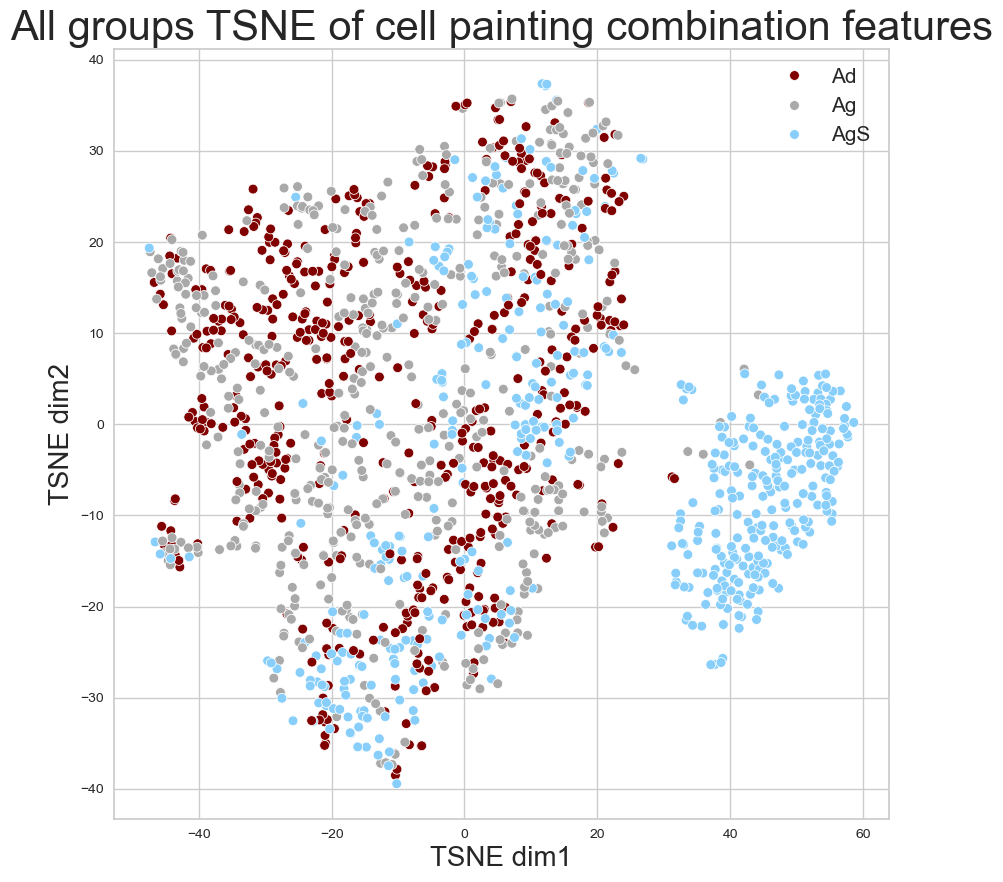

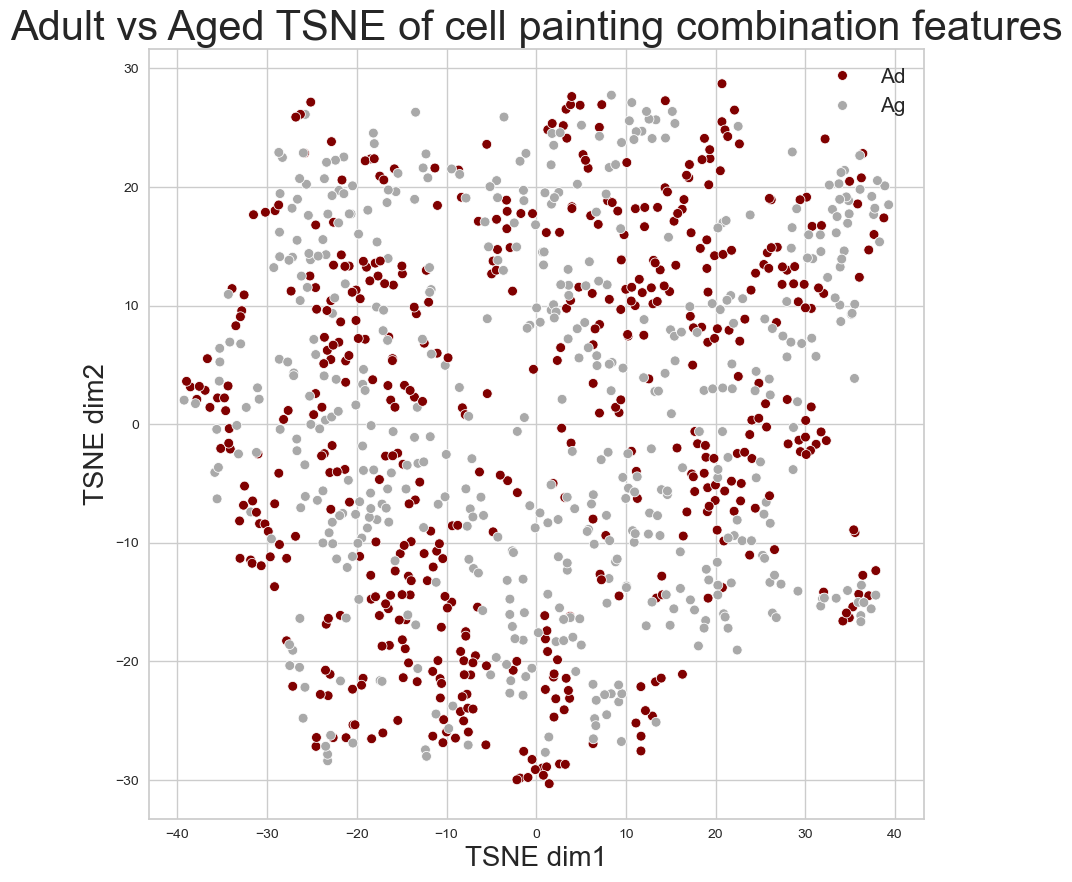

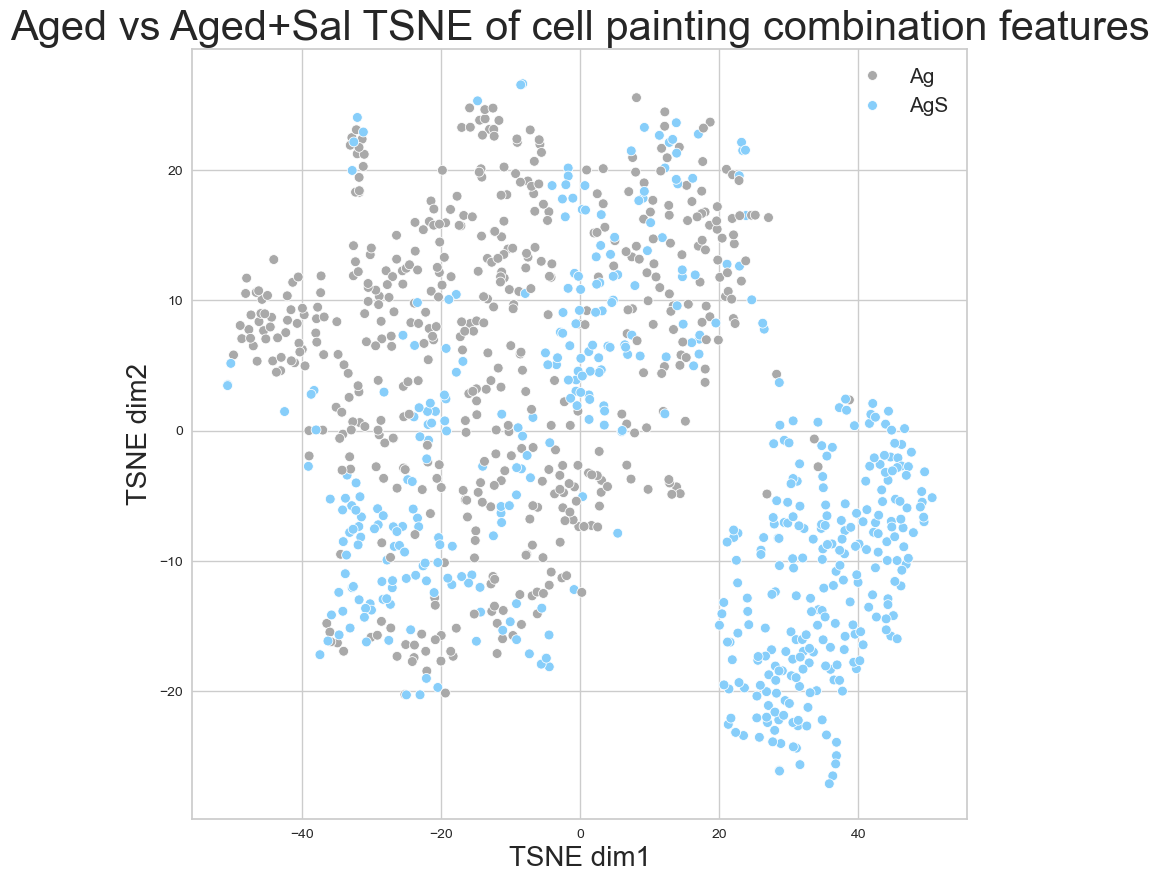

In [18]:
#TODO: add experiment for viz_pca2 if want to see individial exp

#viz_pca2(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#viz_pca2(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
viz_pca2(data_df_all=data_df_combined, curr_exp="cell painting combination")
#viz_TSNE(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#viz_TSNE(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
viz_TSNE(data_df_all=data_df_combined, curr_exp="cell painting combination")


### Anova feature importance

In [20]:
"""
Plots the mean value for each feature grouped by age
Features are ranked by their ANOVA F-value importance
The plot also shows the F-value
"""

def viz_ANOVA_feat_ranking(data_df_all, curr_exp, num_features=20):

    for age_exp in age_experiment_map:

        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
    
        relevant_data_df = deepcopy(data_df.loc[:, relevant_features])
        age_label = list(data_df['Age'])
        y = age_label
        X = deepcopy(relevant_data_df)
        X = RobustScaler().fit_transform(X)
        univariate_selector = SelectKBest().fit(X,y)
        idx = univariate_selector.get_support(True)
        selected_features = pd.DataFrame({k: [v] for k, v in zip(relevant_data_df.columns[idx], univariate_selector.scores_[idx])},
                                        index=['F_values']).T.sort_values('F_values', ascending=False).astype(int)
        selected_features = selected_features[: num_features]
        print(f"Number of features selected: {len(selected_features)}")
        # Modify relevant_columbus_visualization
        relevant_data_df = relevant_data_df.loc[:, selected_features.index.tolist()]
        # scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(relevant_data_df, columns=relevant_data_df.columns)
        vis_df['Age'] = y
        yerr = vis_df.groupby('Age').sem().T

        plt.rcParams["figure.figsize"] = (30,10)
        plt.figure()
        plot_title = f"{age_exp} {curr_exp} feature ranking and F-value"
        # ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, width=0.7, color=age_color_map)
        ax = vis_df.groupby('Age').mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7, color=age_color_map)
        plt.legend(fontsize=30)
        ax.set_ylabel('Feature Value Means')
        plt.xticks(fontsize=30, rotation=90)
        plt.title(plot_title, fontsize=50)
        ax = ax.twinx()
        selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
        ax.set_ylabel('Scores')
        plt.legend(fontsize=10,loc=(1,.99))
        plt.show()

        if curr_exp == "cell painting combination":
            vis_df['Exp'] = list(data_df['Exp'])
            plt.rcParams["figure.figsize"] = (50,20)
            plt.figure()
            plot_title = f"{age_exp} {curr_exp} feature ranking grouped by experiment and F-value"
            # ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, width=0.7)
            ax = vis_df.groupby(['Exp','Age']).mean().T.plot.bar(title=plot_title, yerr=yerr, width=0.7)
            plt.legend(fontsize=30)
            ax.set_ylabel('Feature Value Means')
            plt.xticks(fontsize=30, rotation=90)
            plt.title(plot_title, fontsize=50)
            ax = ax.twinx()
            selected_features.plot(ax=ax, style='k*',  markersize=20,alpha=1)
            ax.set_ylabel('Scores')
            plt.legend(fontsize=10,loc=(1,.99))
            plt.show()


    

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

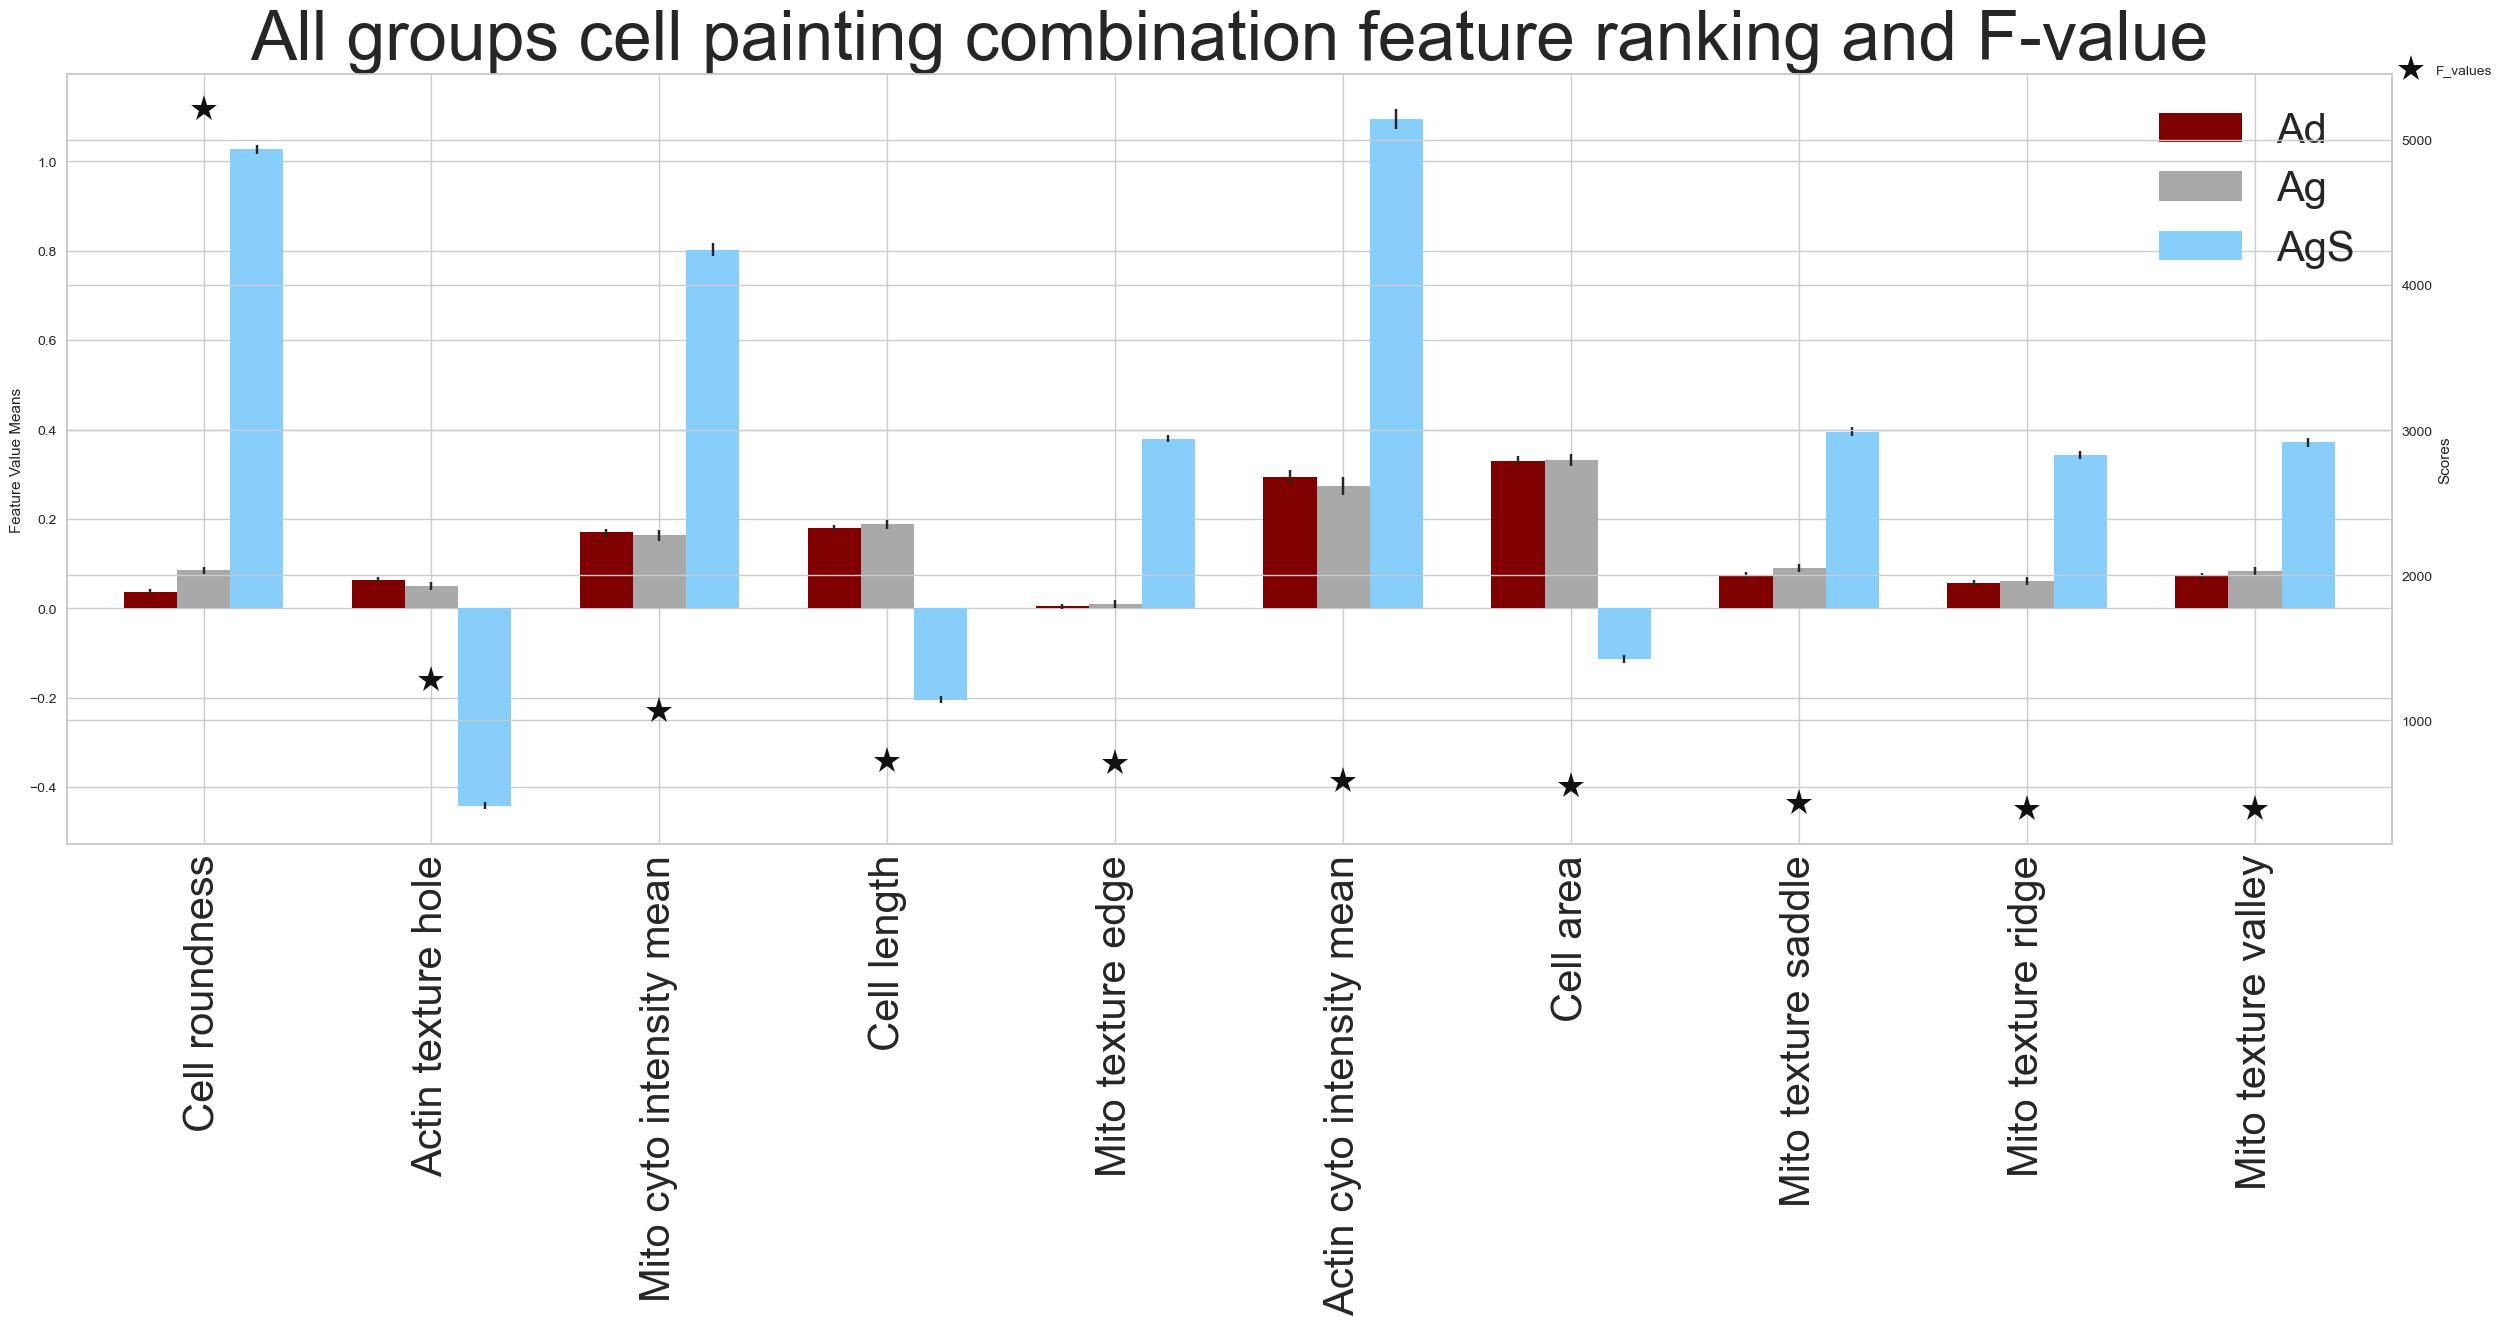

<Figure size 5000x2000 with 0 Axes>

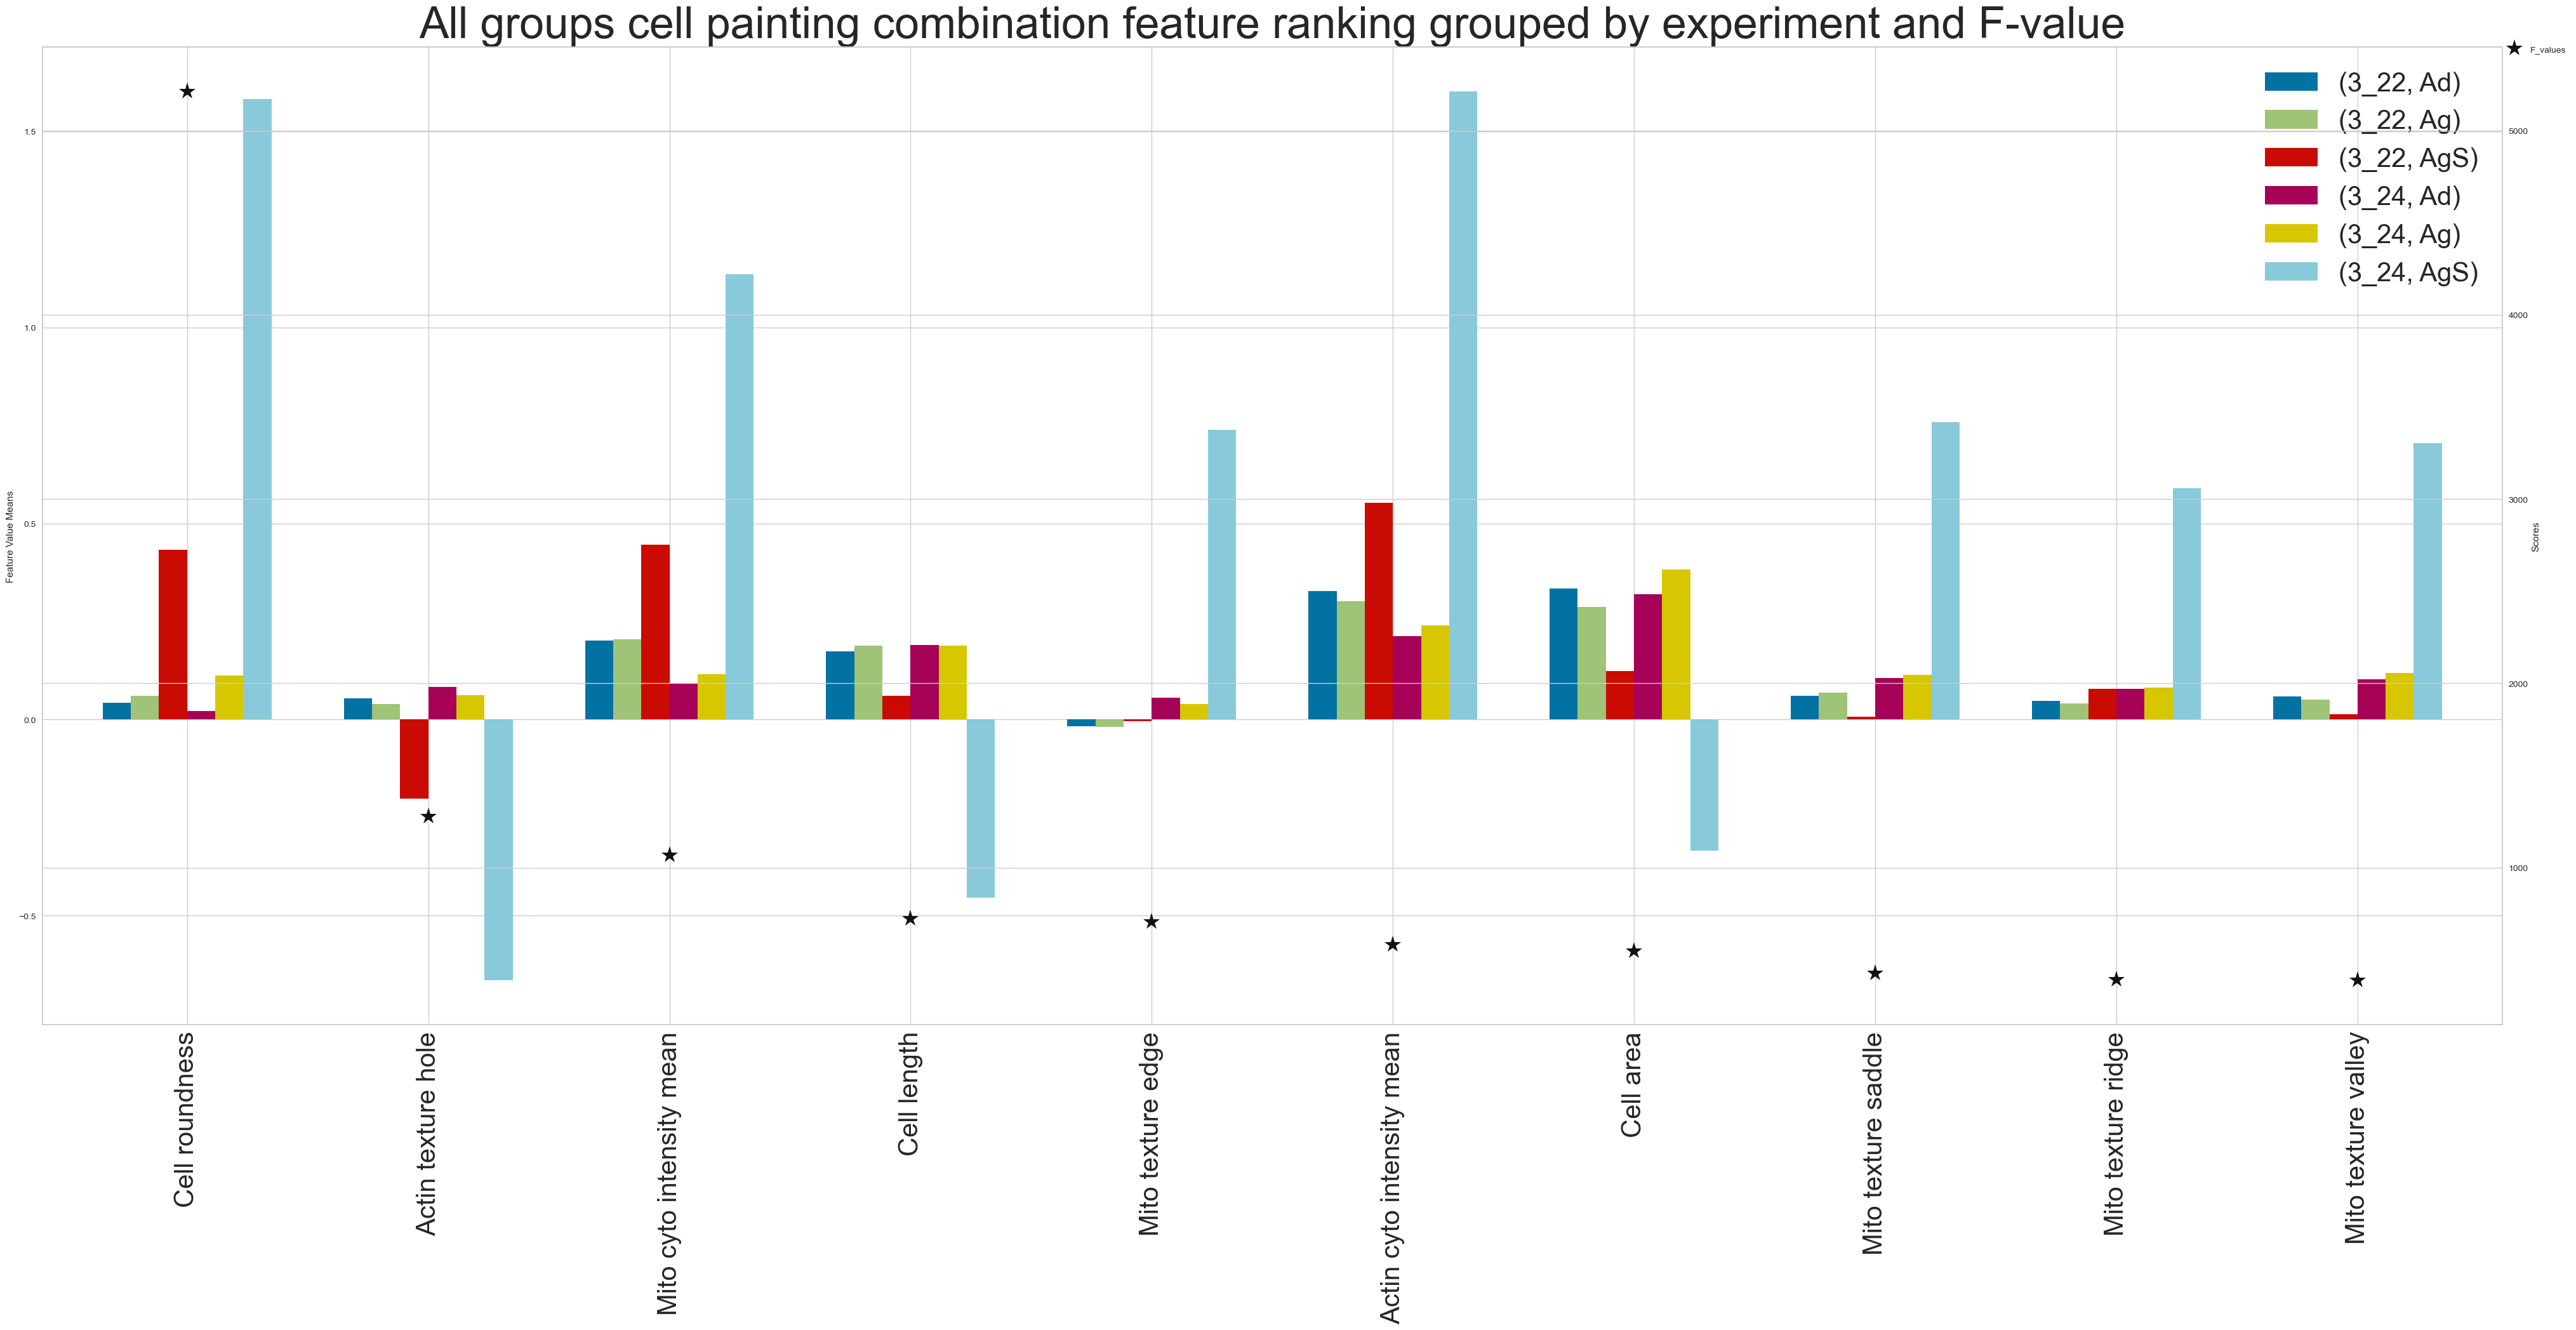

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

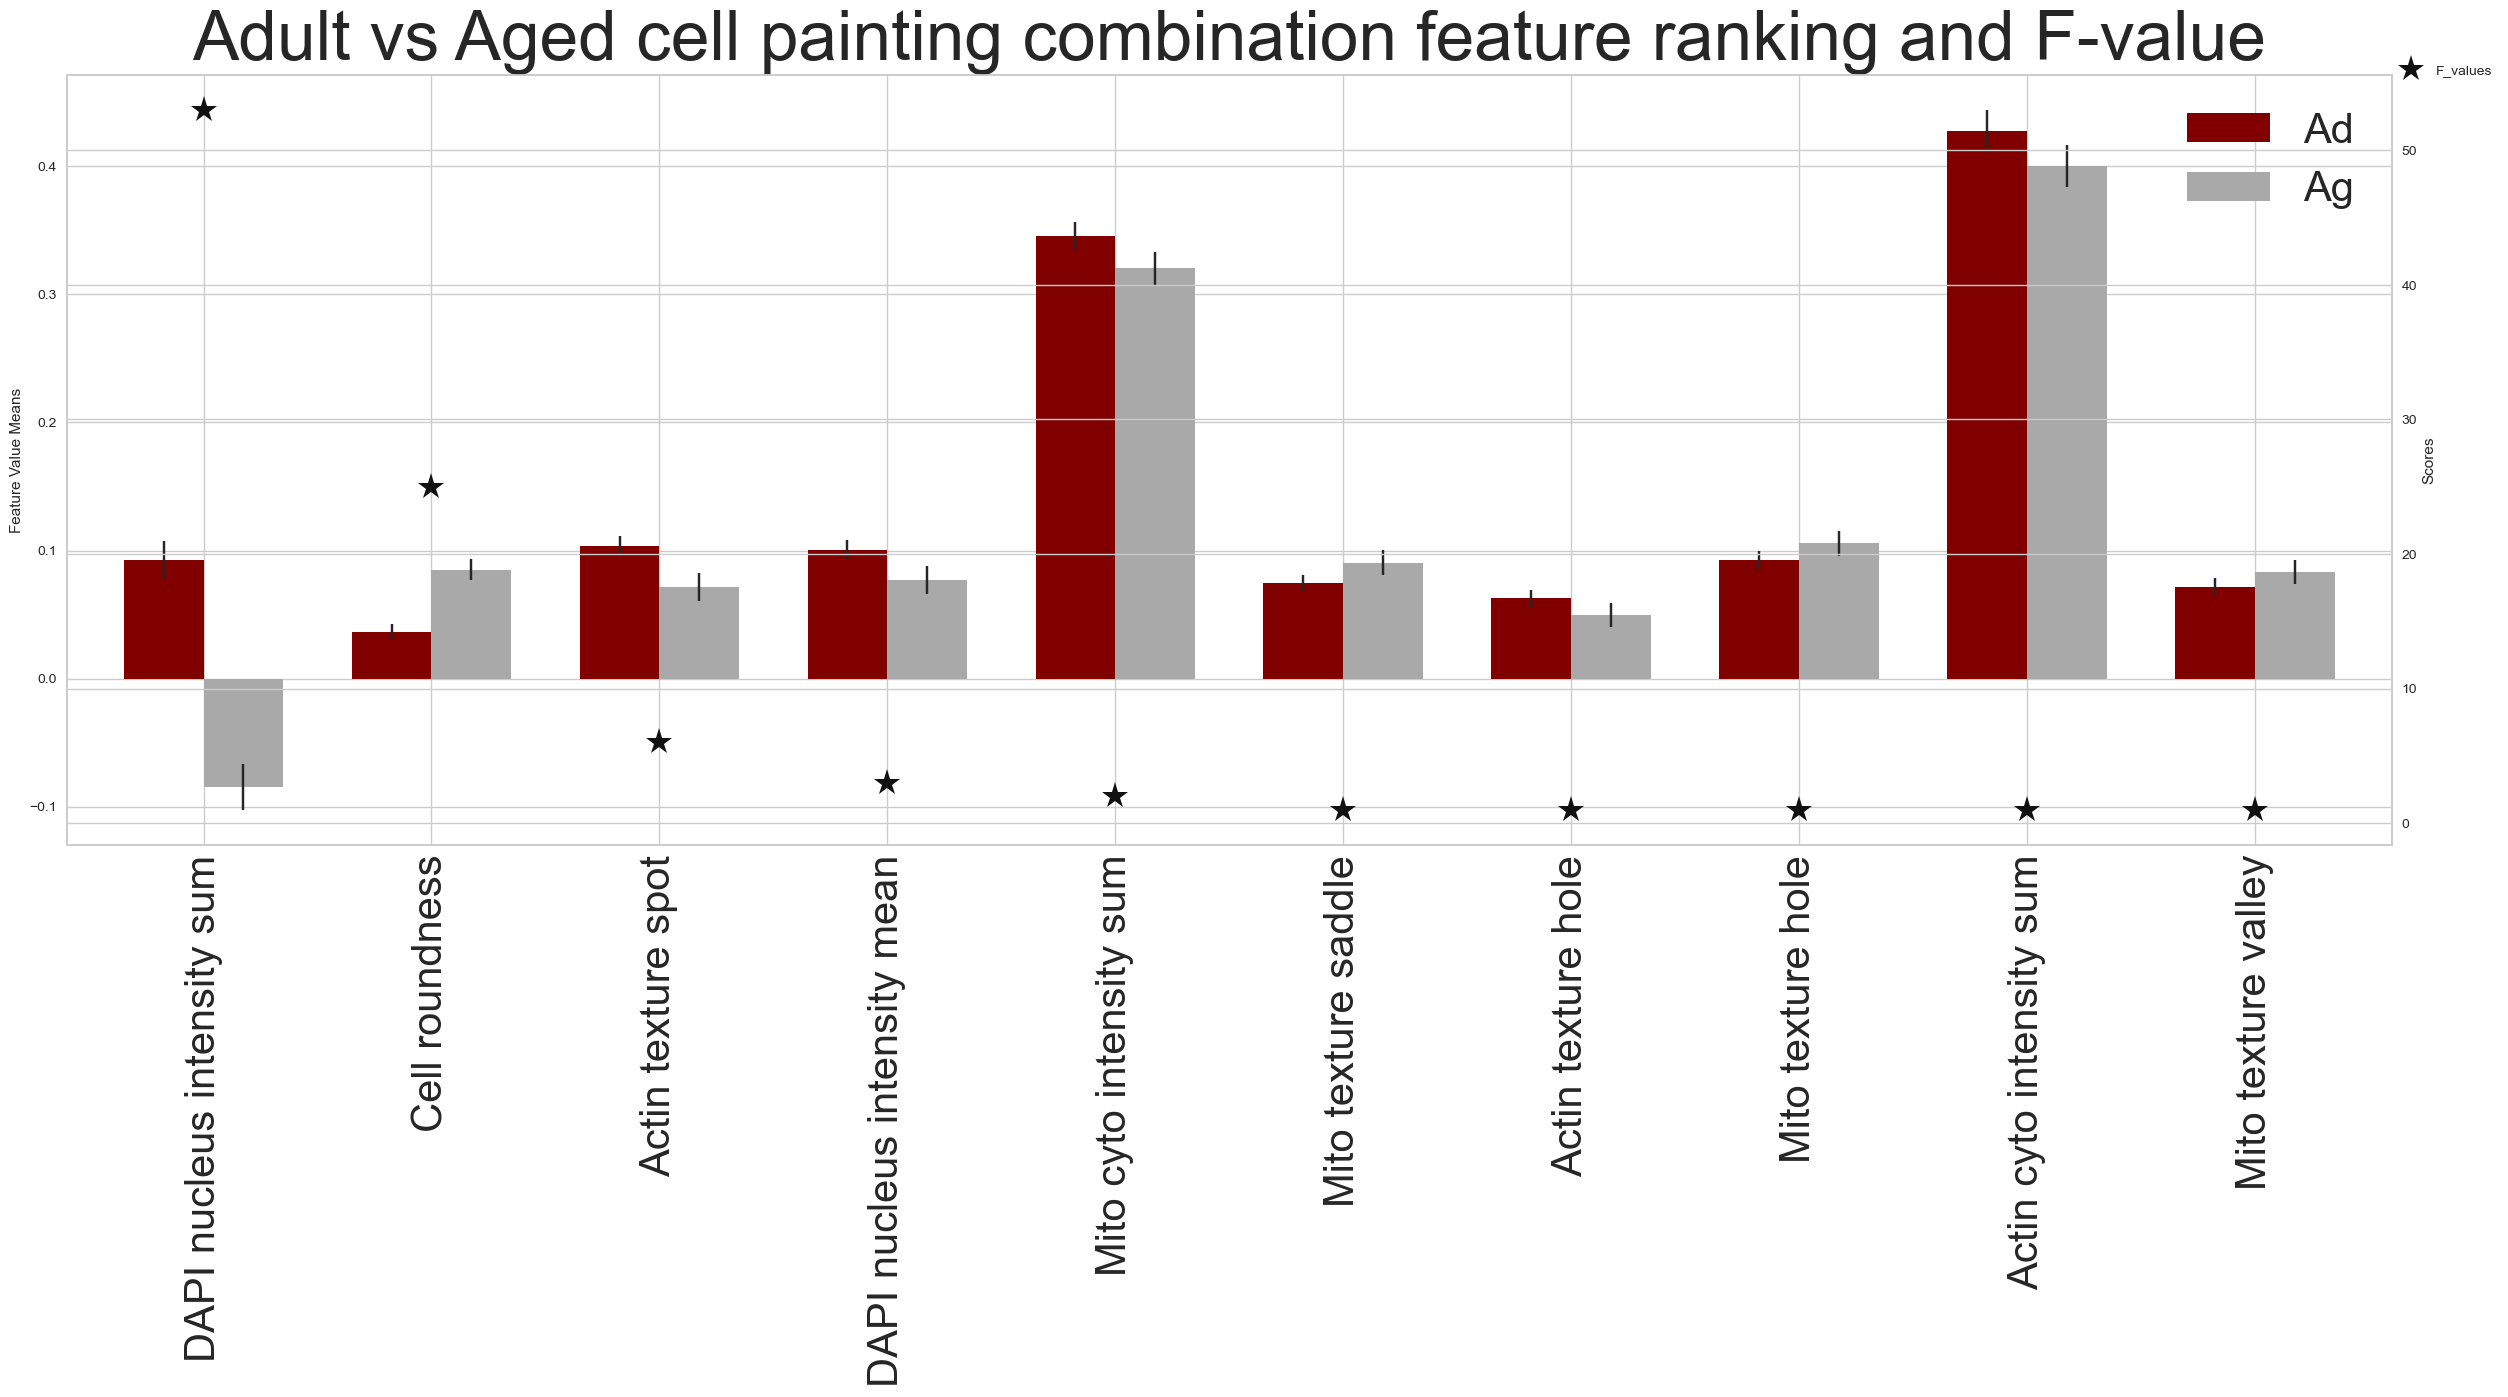

<Figure size 5000x2000 with 0 Axes>

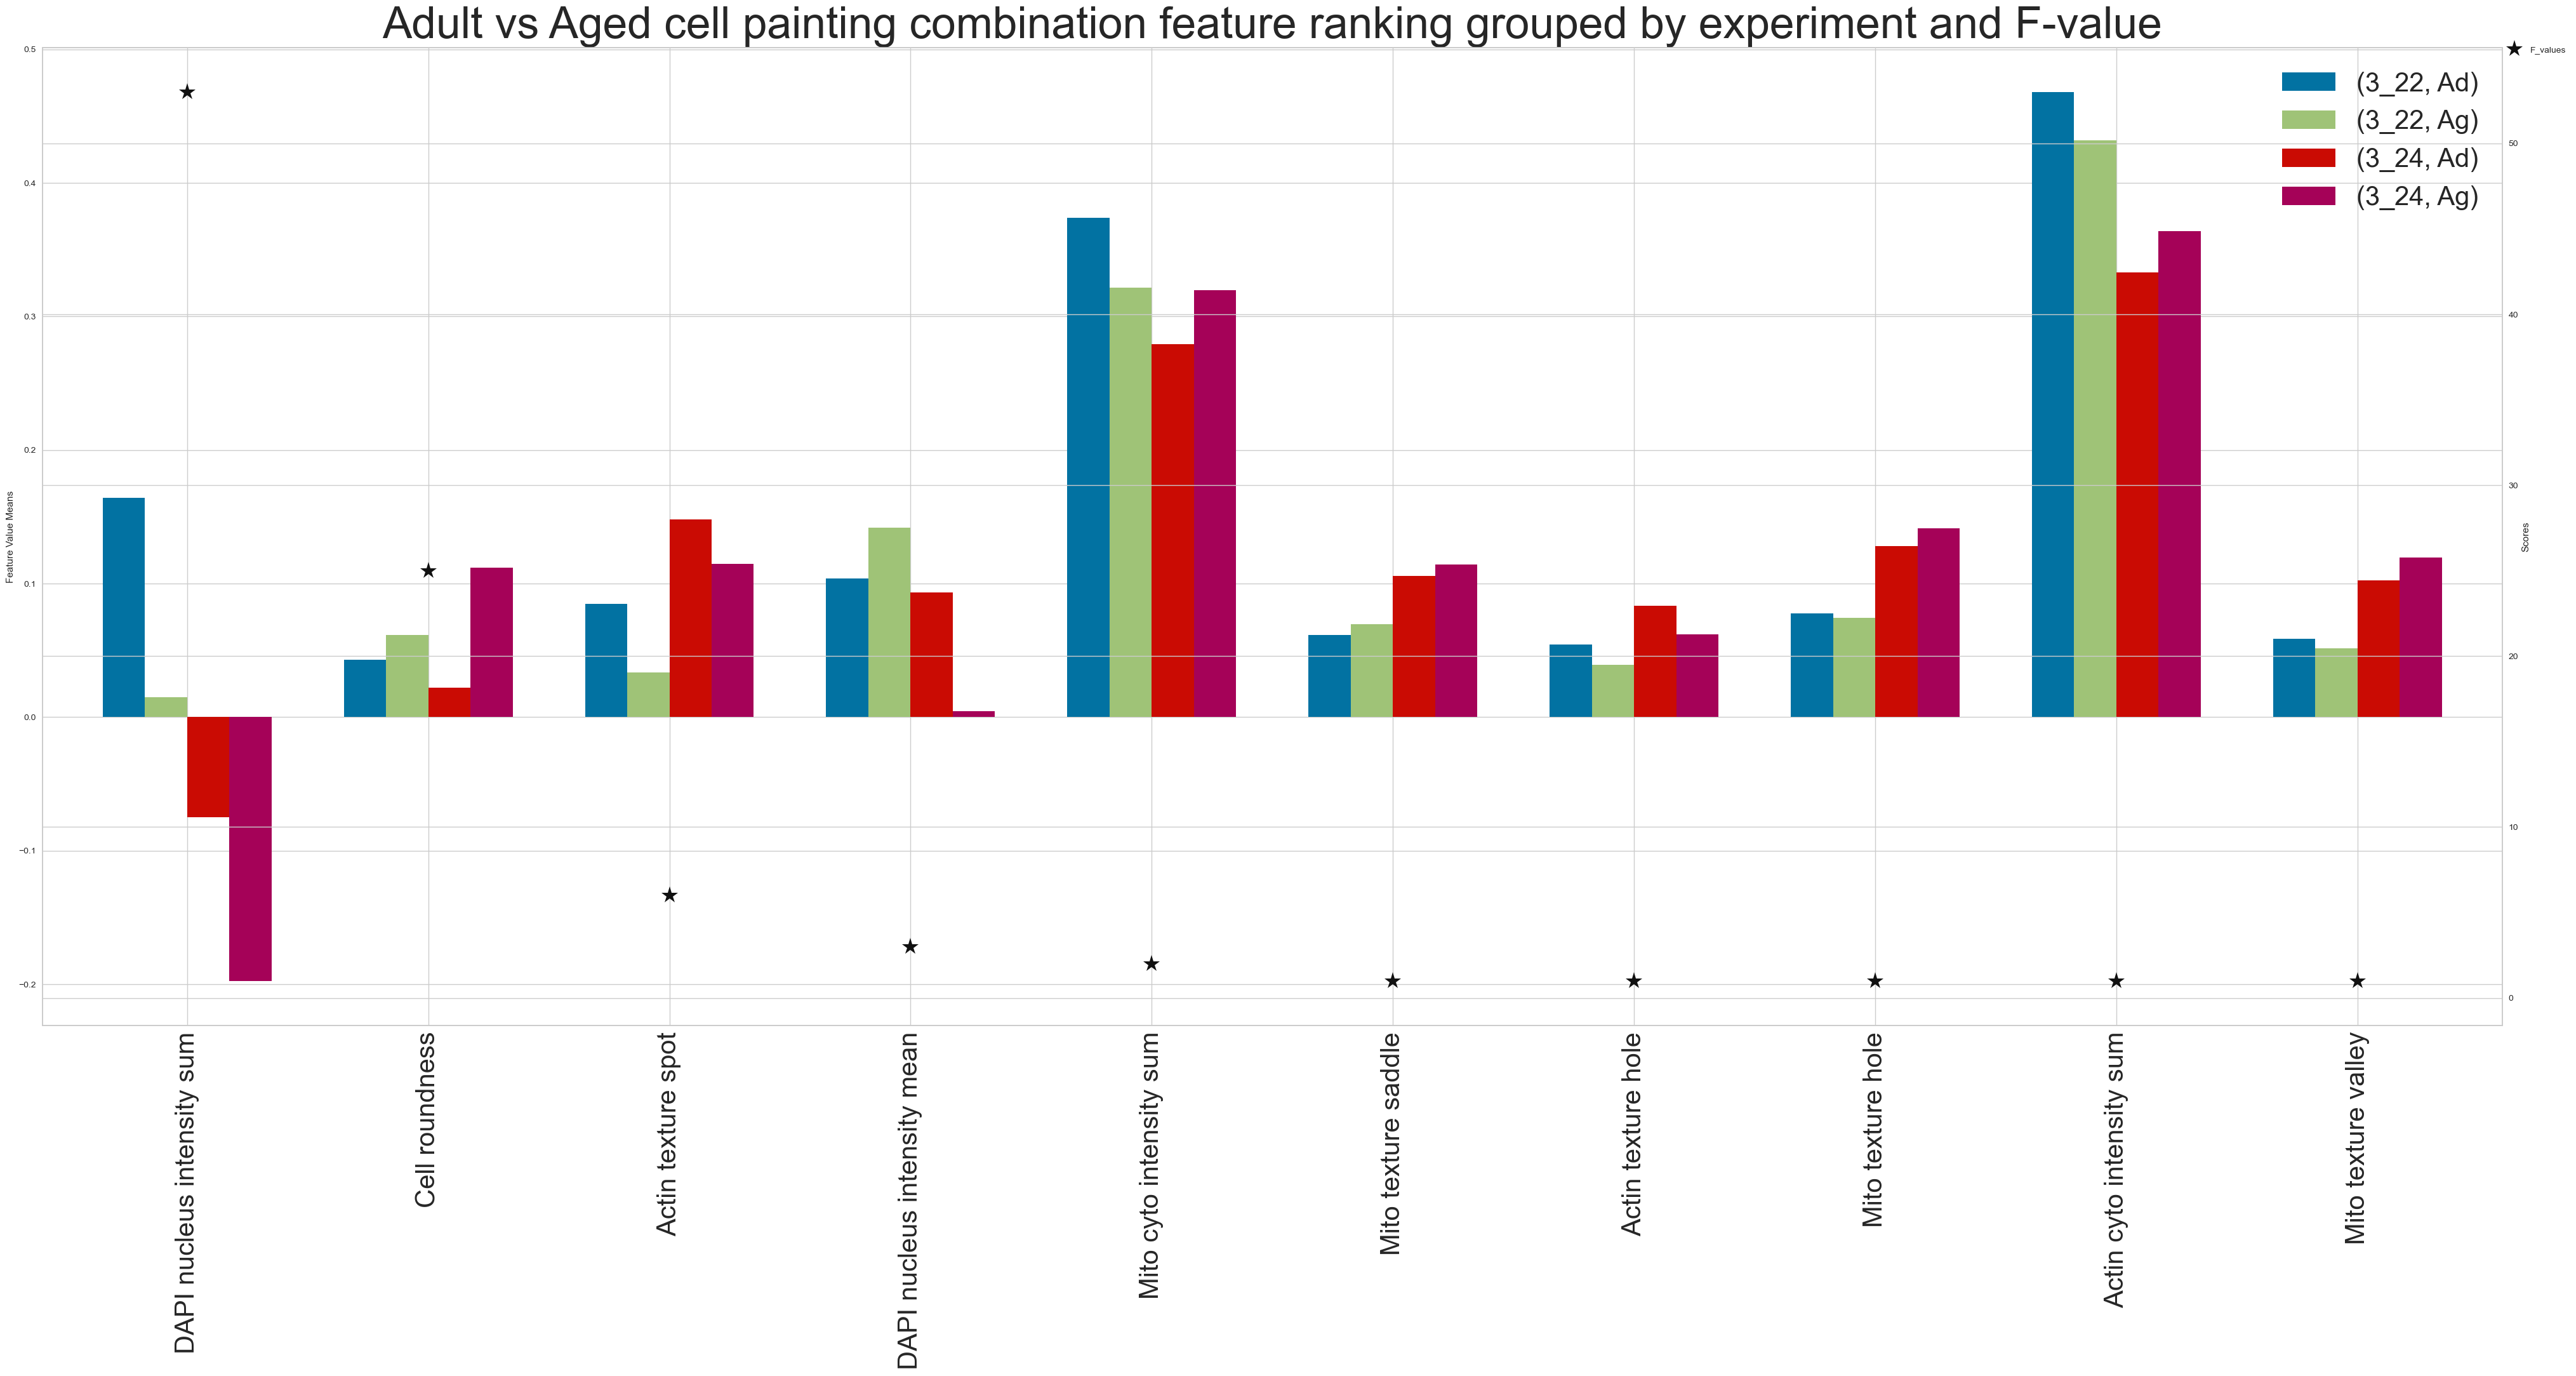

Number of features selected: 10


<Figure size 3000x1000 with 0 Axes>

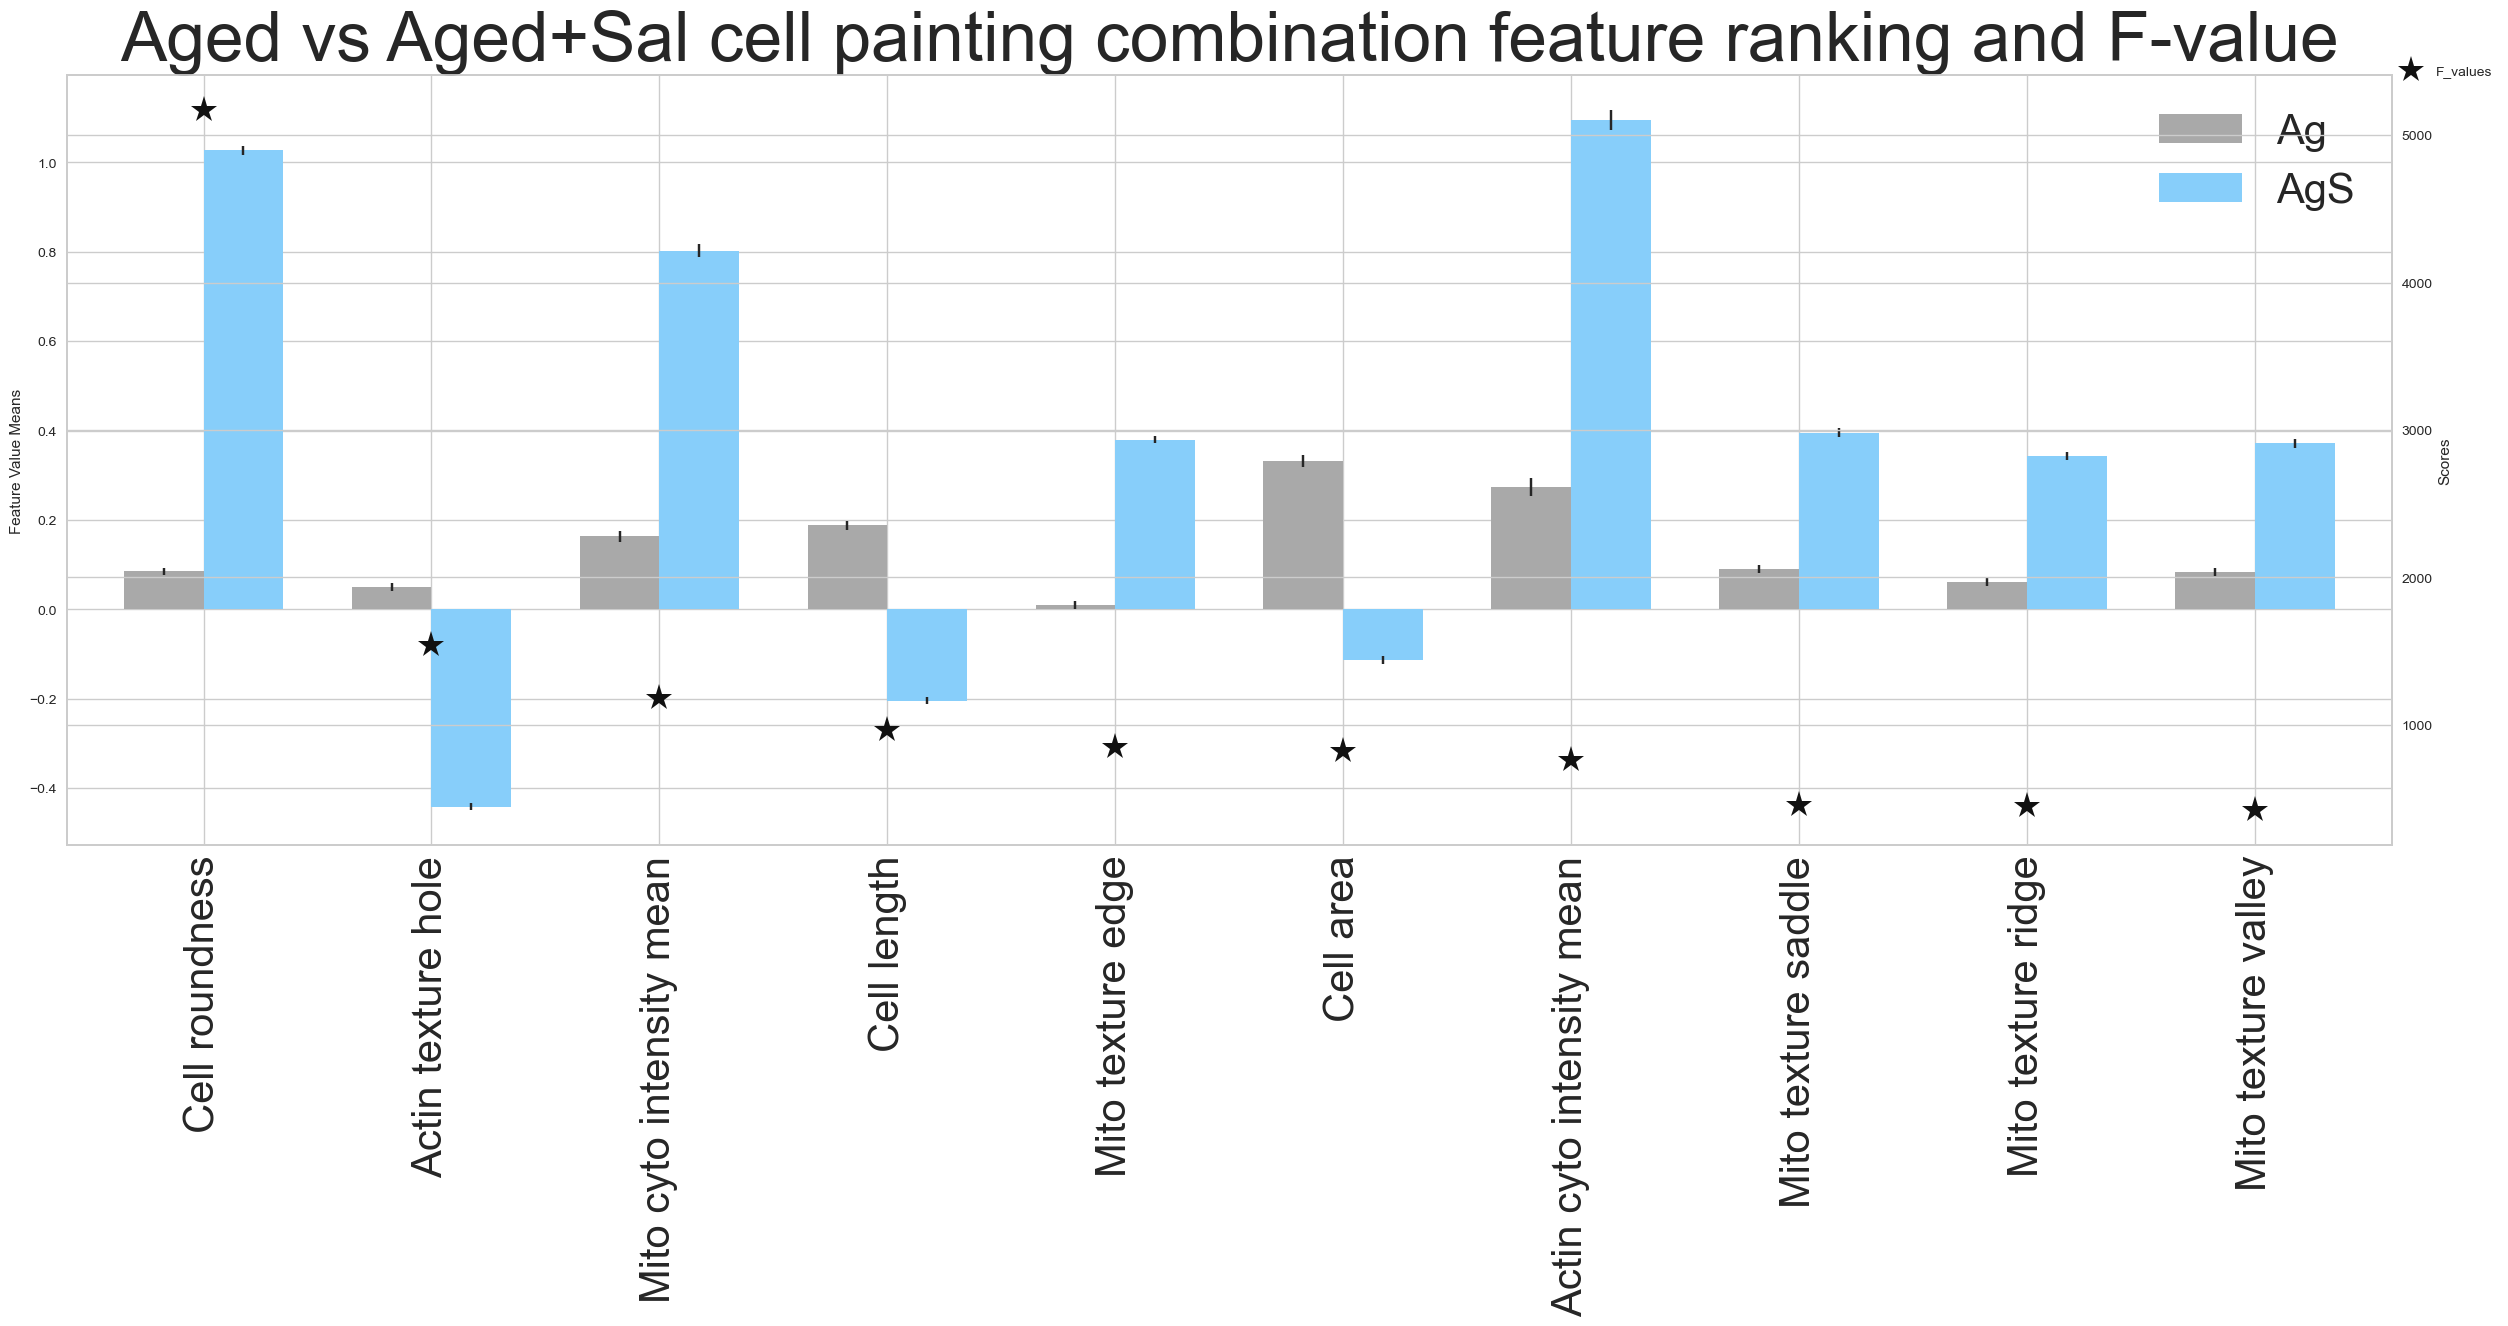

<Figure size 5000x2000 with 0 Axes>

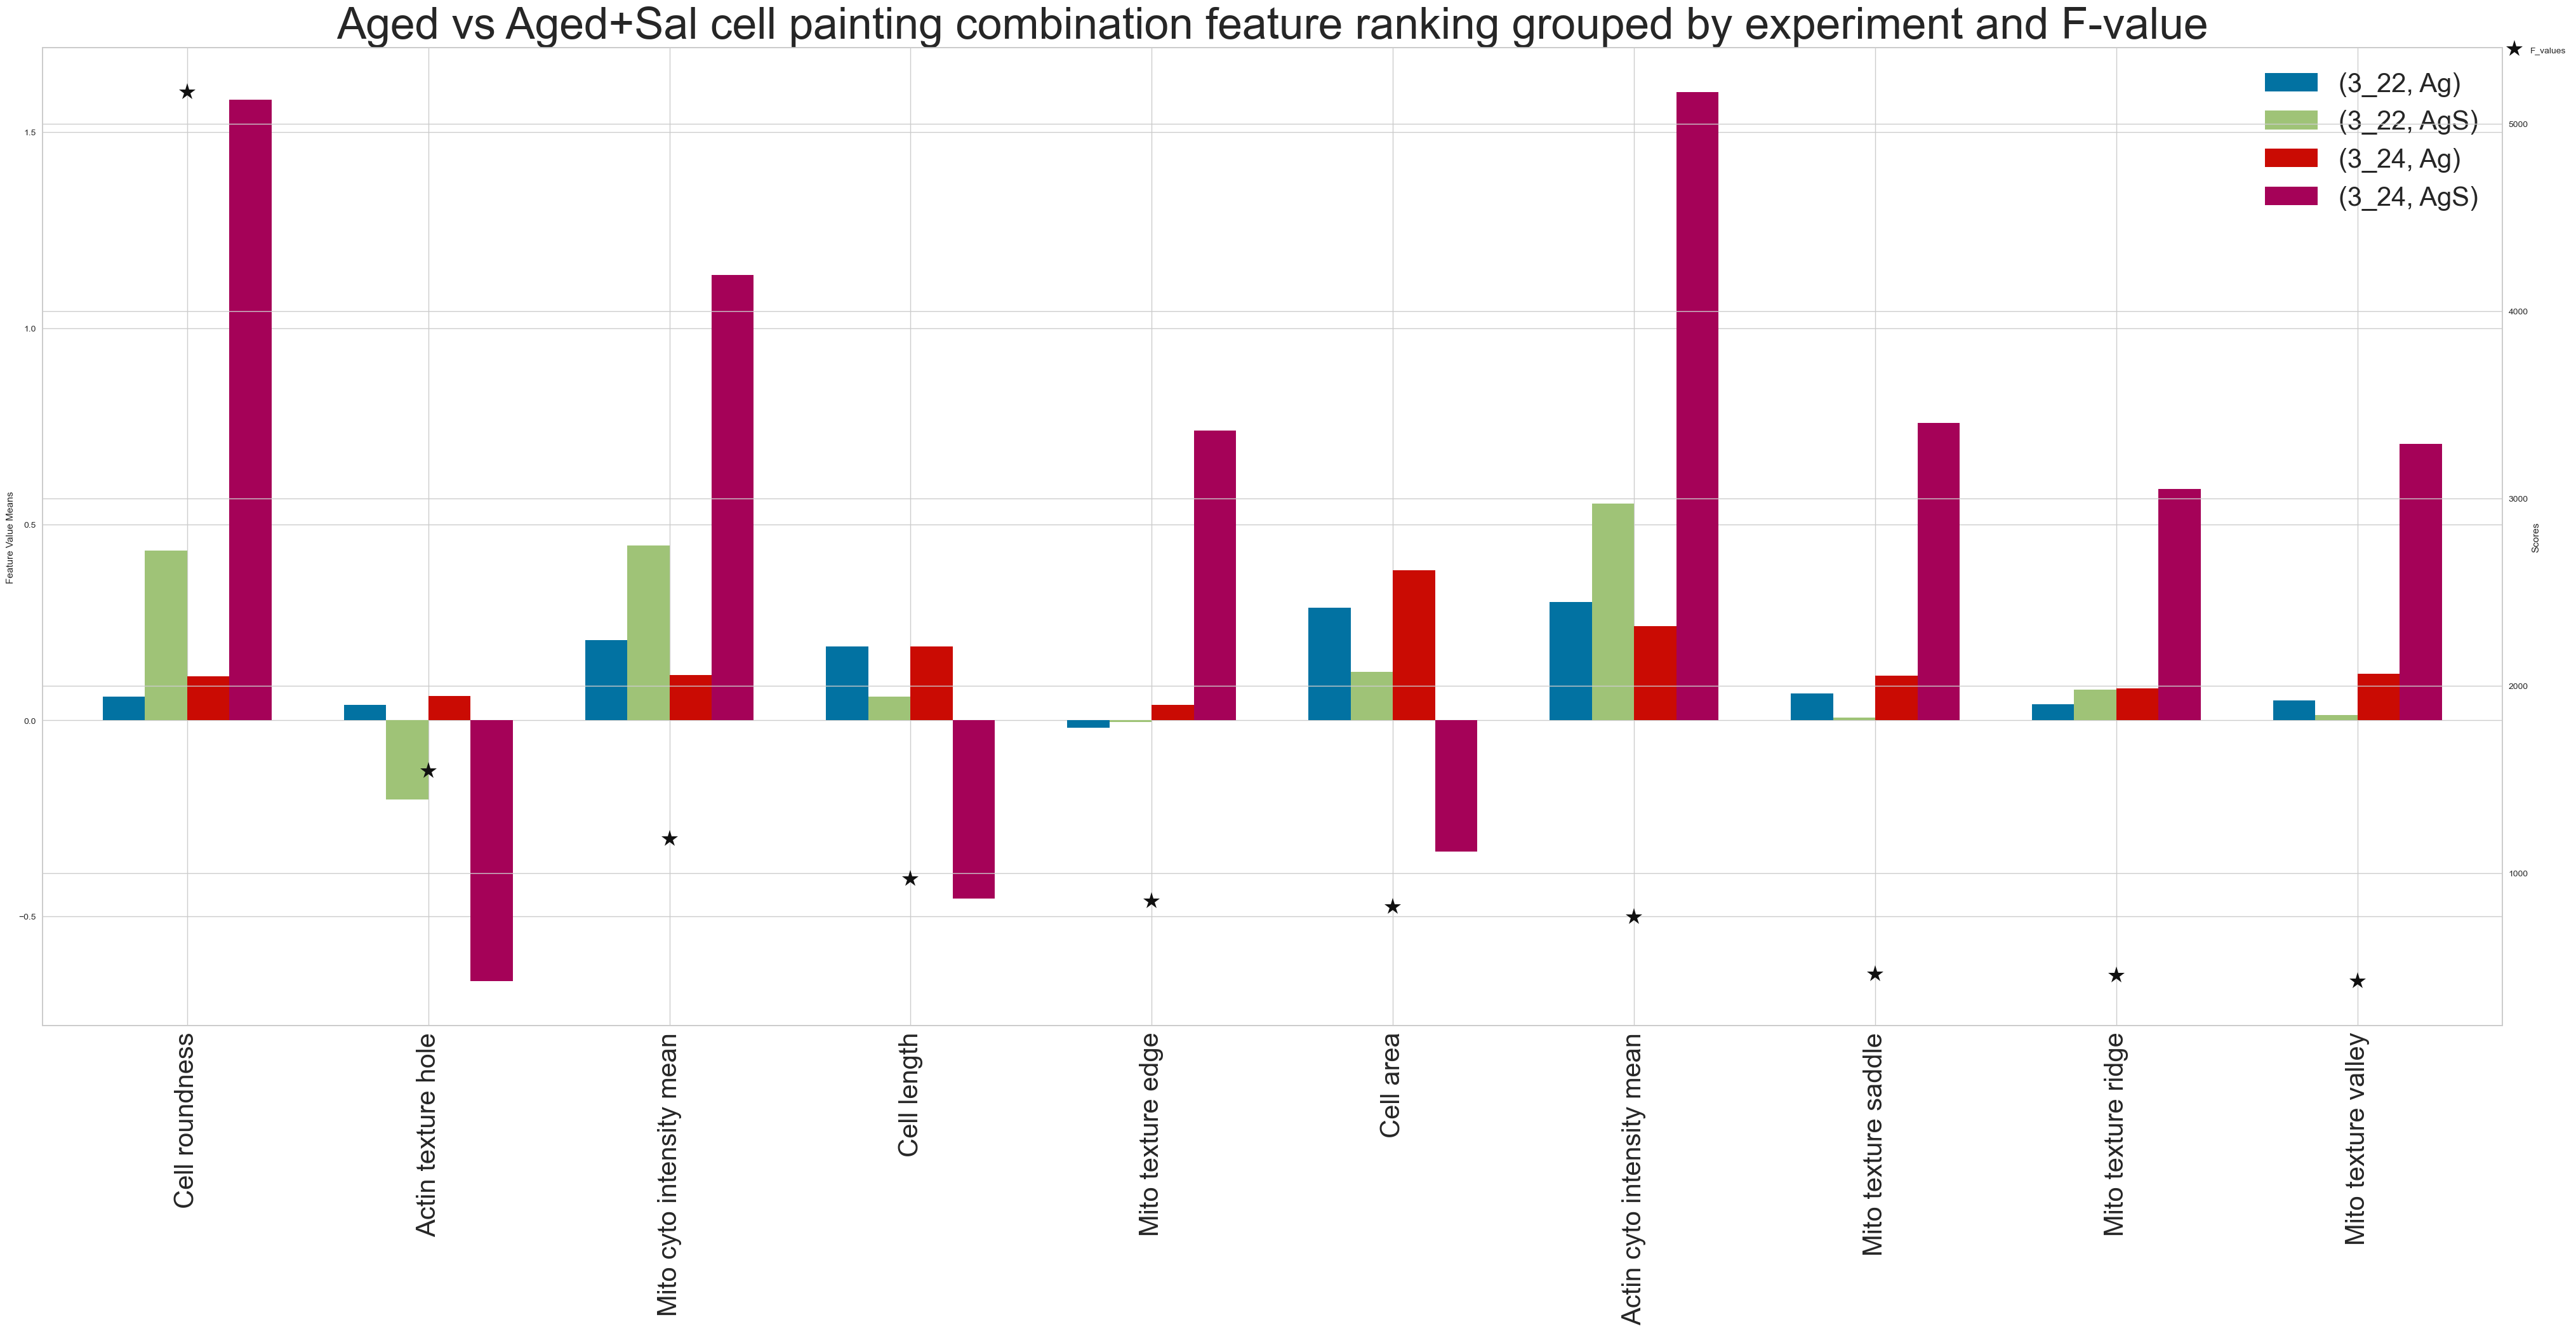

In [21]:
#viz_ANOVA_feat_ranking(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#viz_ANOVA_feat_ranking(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
viz_ANOVA_feat_ranking(data_df_all=data_df_combined, curr_exp="cell painting combination")

## Clustering Analysis

### Kmeans clustering and percentage

In [22]:
def viz_clustering_analysis(data_df_all, curr_exp):


    return_df = None

    for age_exp in age_experiment_map:
        data_df = data_df_all.loc[data_df_all['Age'].isin(age_experiment_map[age_exp])]
        clustering_data_df = deepcopy(data_df)
        relevant_data_df = deepcopy(data_df.loc[:, relevant_features])

        plot_title = f"{age_exp} KMeans clustering elbow for {curr_exp}"
        plt.rcParams["figure.figsize"] = (6,4)
        plt.figure()
        X = deepcopy(relevant_data_df)
        X = StandardScaler().fit_transform(X)

        """
        Viz 1: Elbow plot
        """
        elbow_vis = KElbowVisualizer(KMeans(), title=plot_title).fit(X)
        plt.title(plot_title)
        elbow_vis.show()

        


        """
        Viz 2: KMeans count pie plot
        """
        num_clusters = elbow_vis.elbow_value_  #min(elbow_vis.elbow_value_, 3)
        kmeans = KMeans(num_clusters, random_state=23).fit(X)
            
        plt.rcParams["figure.figsize"] = (5,5)
        plot_title = f'{age_exp} Distribution of Cluster categories for {curr_exp}'
        clustering_data_df['kmeans_clustering'] = kmeans.labels_
        clustering_data_df['kmeans_clustering'] = ["Cluster "+str(int(item)+1) for item in clustering_data_df['kmeans_clustering']]
        clustering_data_df.kmeans_clustering.value_counts().plot.pie(fontsize=14, autopct='%.1f%%')
        plt.title(plot_title, fontsize=20)


        """
        Viz 3: Cluster distribution plot
        """
        plt.rcParams["figure.figsize"] = (40,30)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by age per cluster'
        ax = clustering_data_df.groupby('Age').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50, color=age_color_map)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=60, rotation=0)
        plt.yticks(fontsize=60, rotation=0)
        ax.legend(fontsize=60,bbox_to_anchor=(1, 0.6))



        """
        Viz 4: Cluster distribution per Well ID plot
        """
        plt.rcParams["figure.figsize"] = (40,30)
        plot_title = f'{age_exp} {curr_exp} Percentage of cell by Well per cluster'
        if curr_exp == 'cell painting combination':
            ax = clustering_data_df.groupby(['Exp', 'Age']).kmeans_clustering.value_counts().unstack(2).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        else:
            ax = clustering_data_df.groupby('Well ID').kmeans_clustering.value_counts().unstack(1).apply(lambda x: x*100/float(x.sum())).transpose().plot.bar(stacked=False, fontsize=50)
        index=0
        for rect in ax.patches:
            # Find where everything is located
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()

            # The height of the bar is the data value and can be used as the label
            label_text = f'{100*height:.1f}%' 

            # ax.text(x, y, text)

            label_x = x + width / 2
            label_y = y + height / 2
            if index ==0:
                label_y = label_y + 0.01

            # # plot only when height is greater than specified value
            # if height > 0:
            #     ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=60, rotation=90)

            index += 1
        plt.title(plot_title, fontsize=70)
        plt.xticks(fontsize=60, rotation=0)
        plt.yticks(fontsize=60, rotation=0)
        ax.legend(fontsize=60,bbox_to_anchor=(1, 0.6))

        if age_exp == "All groups":
            return_df = clustering_data_df

    return return_df 

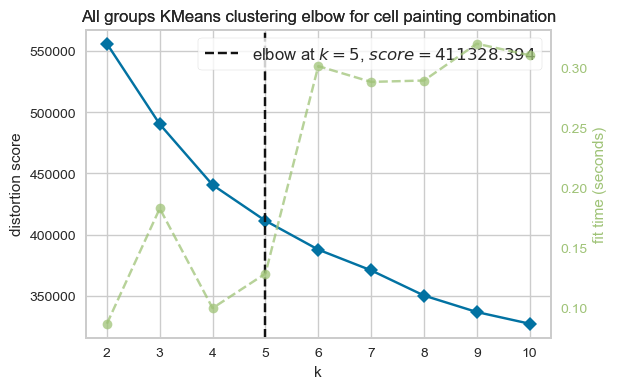

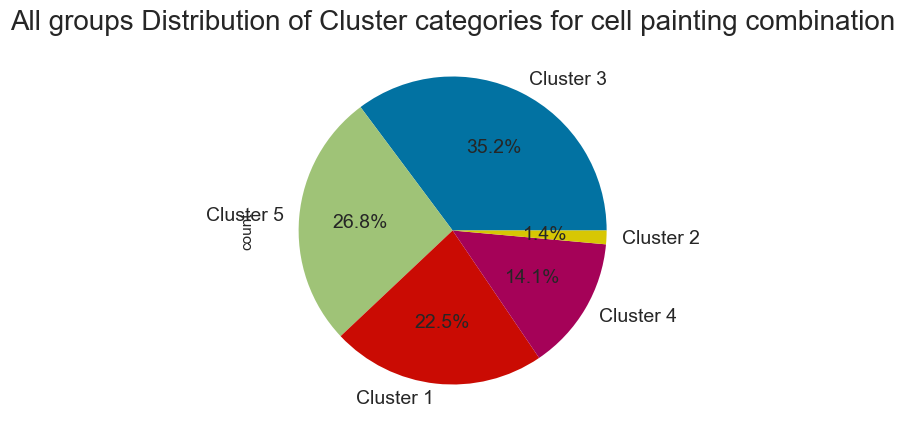

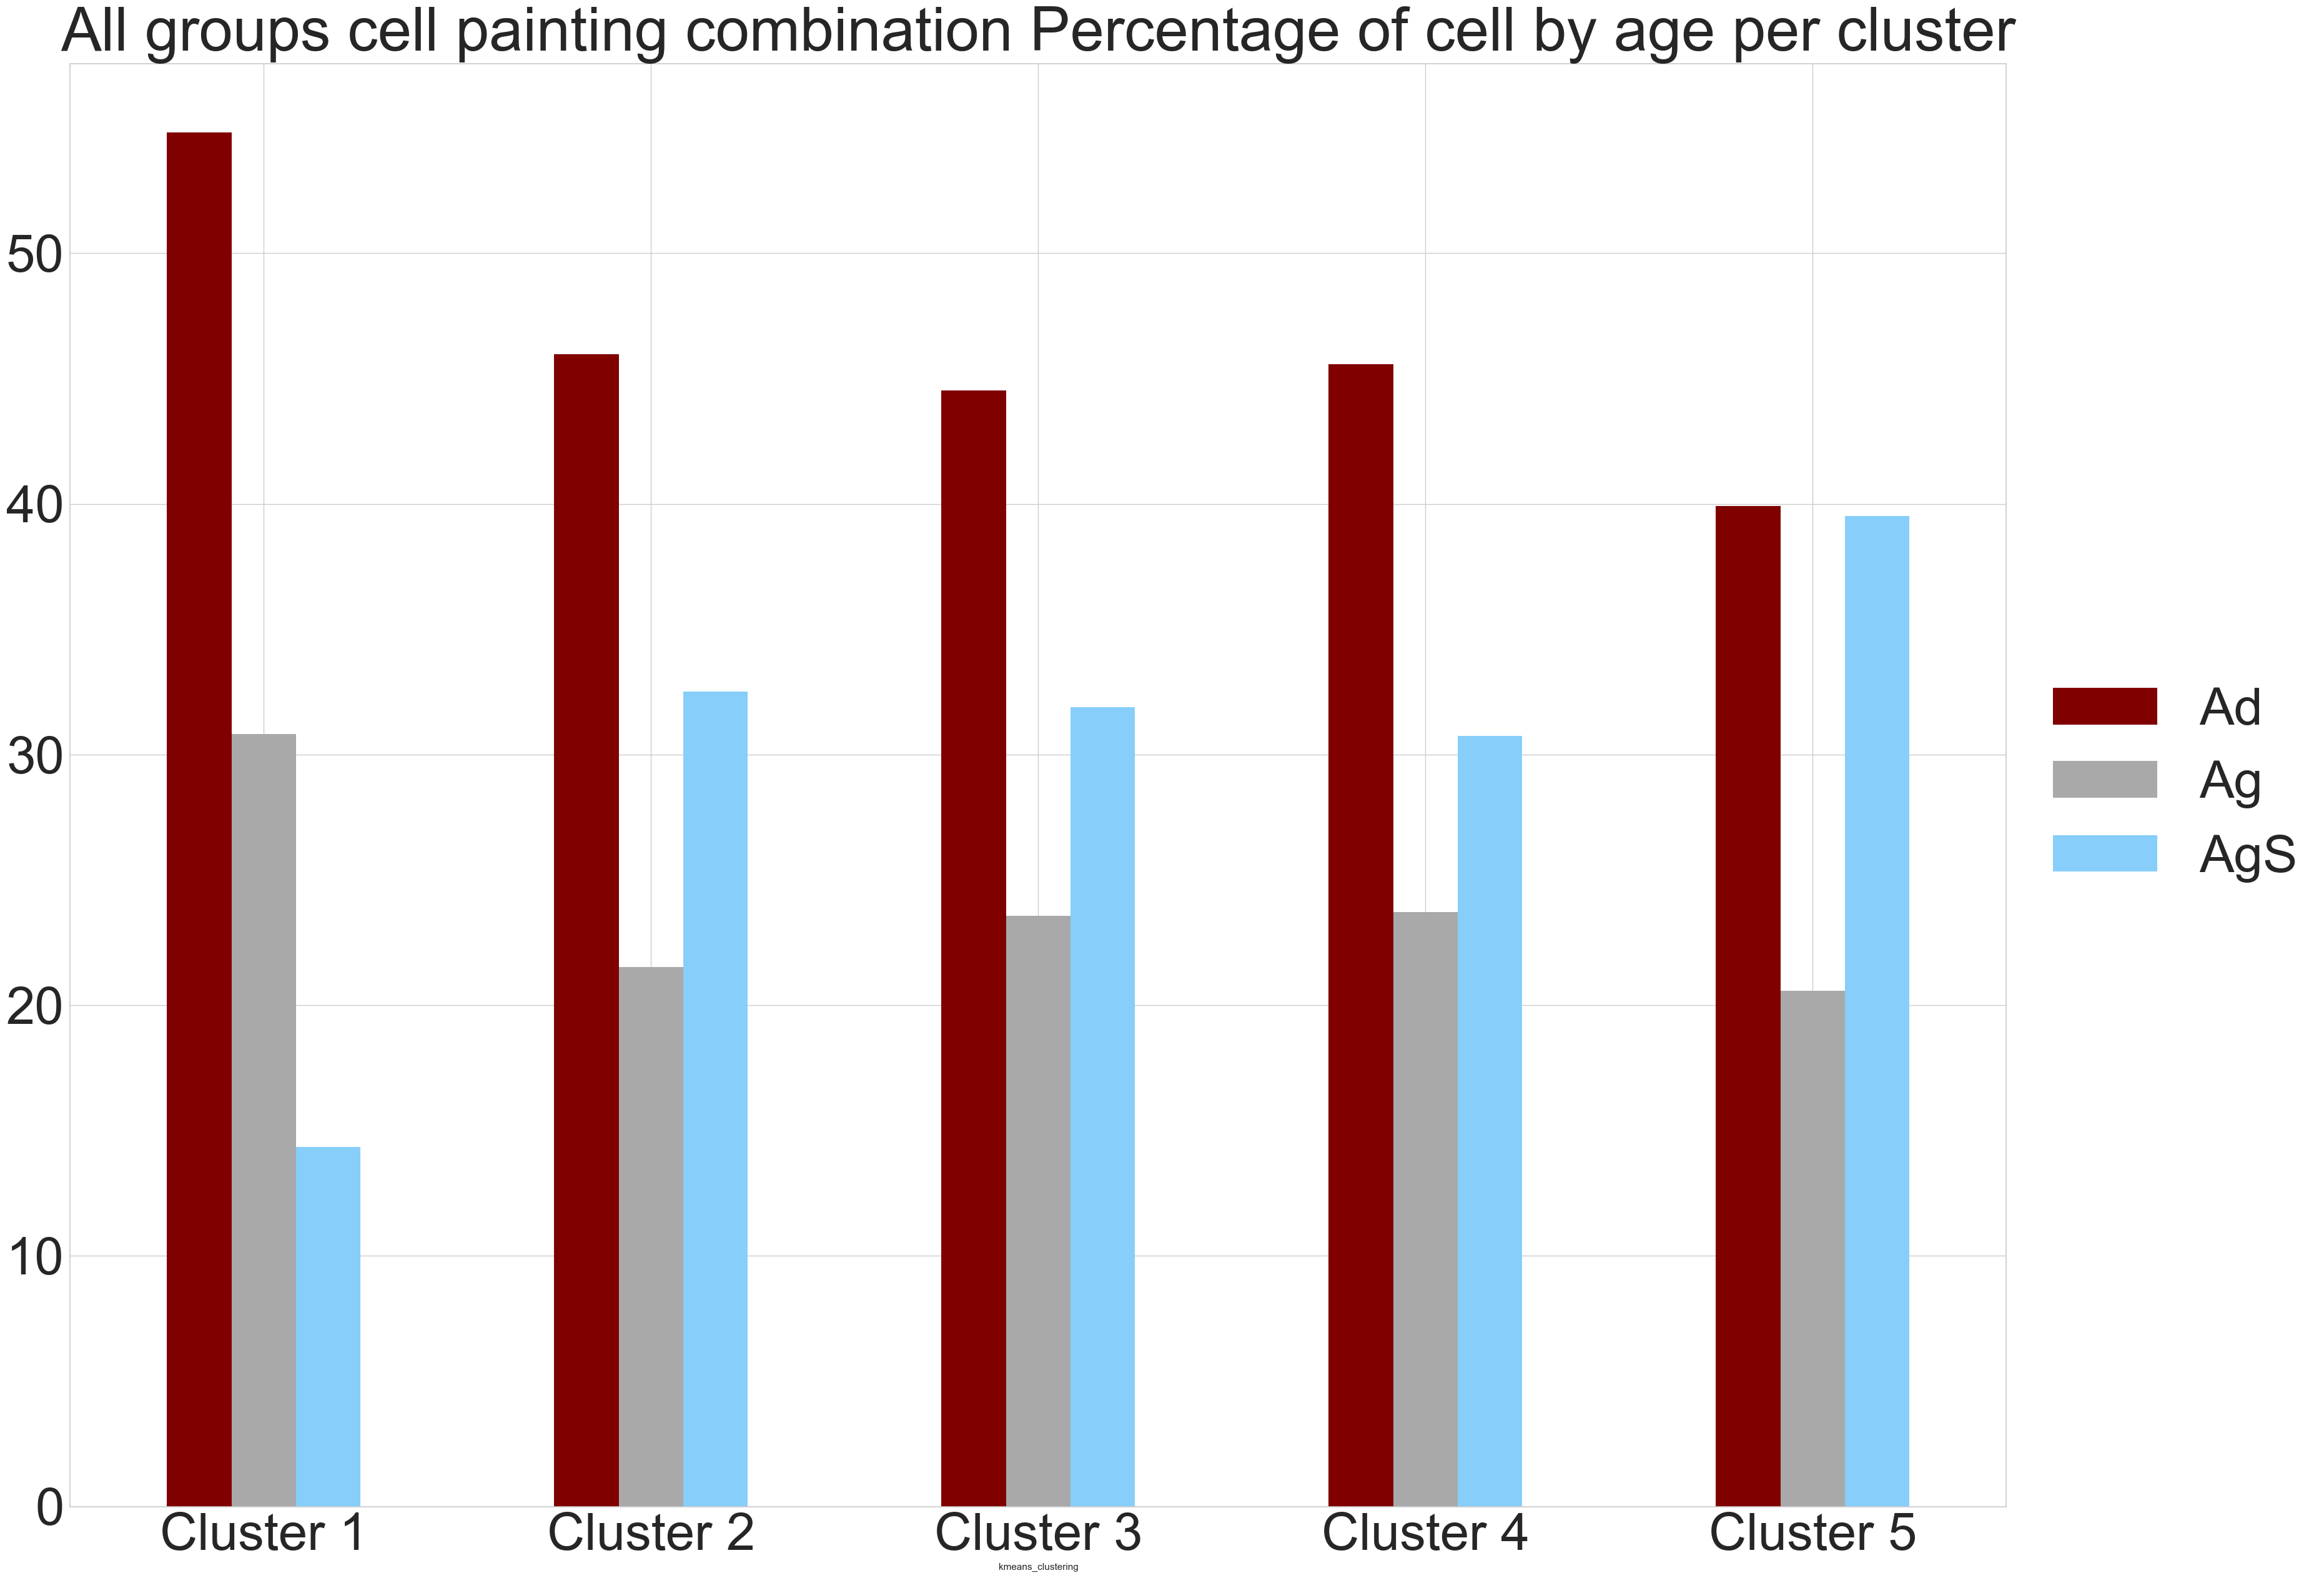

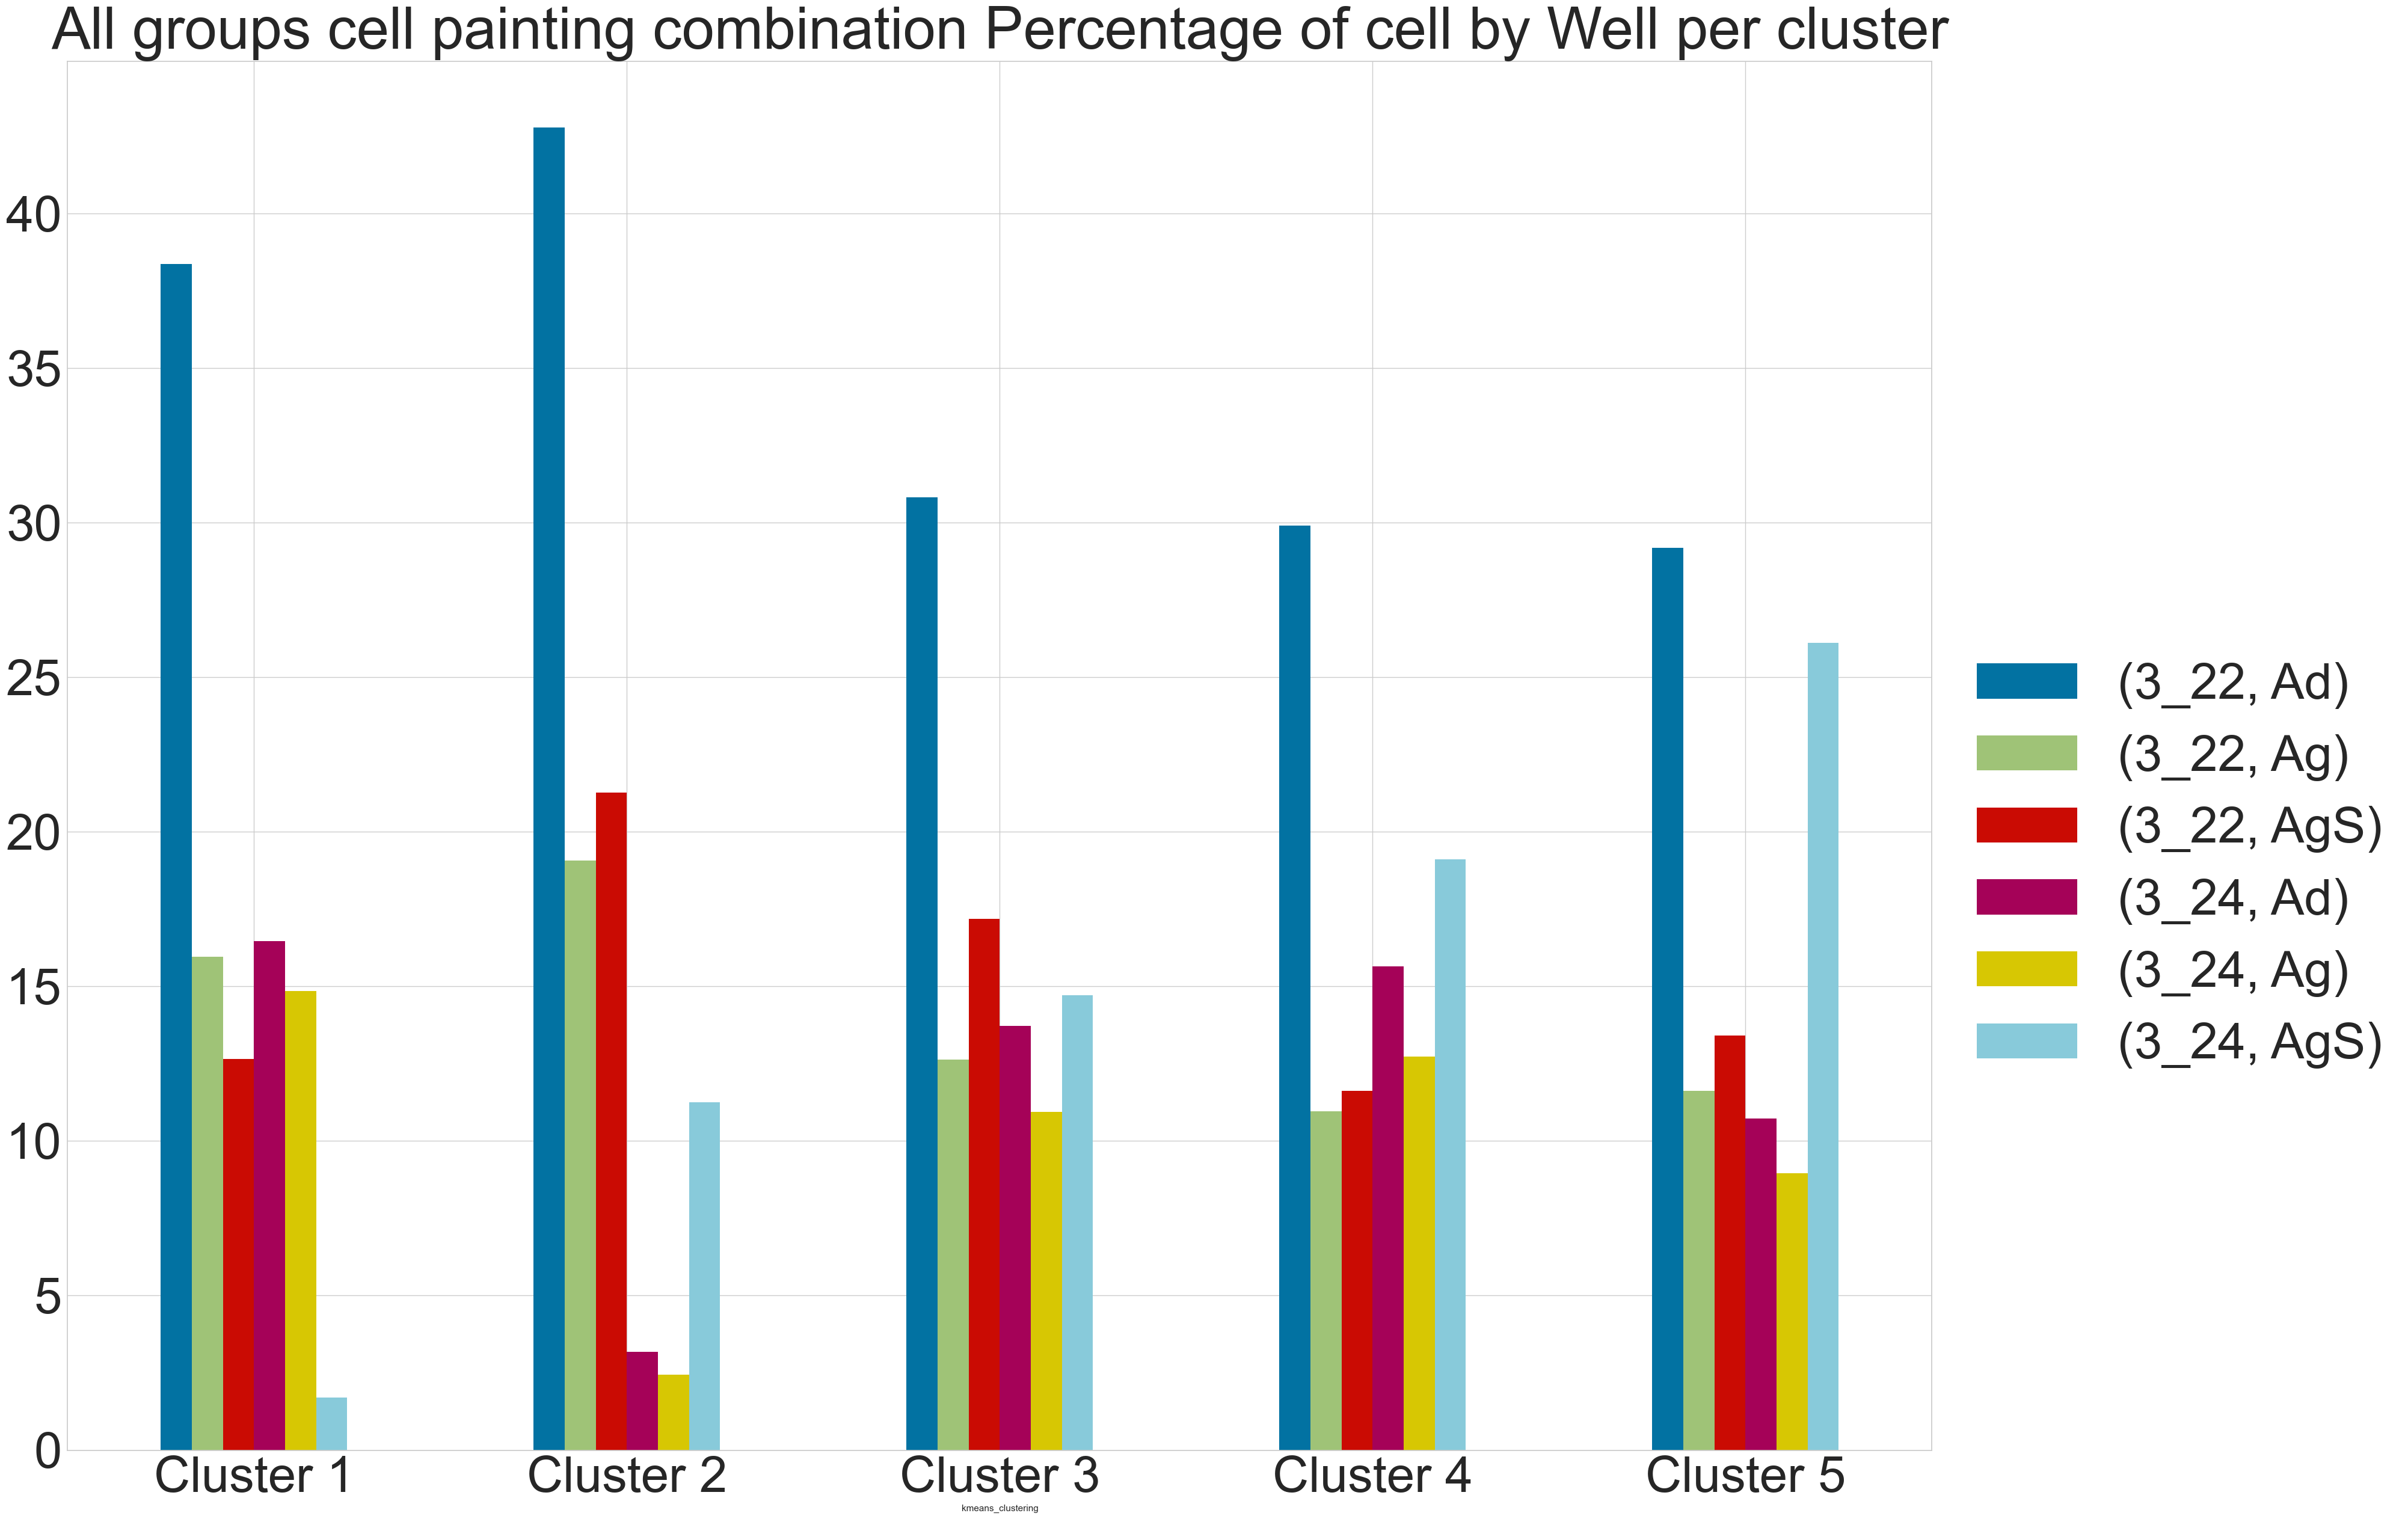

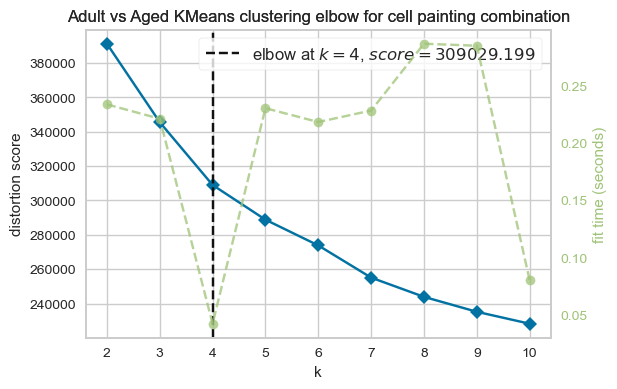

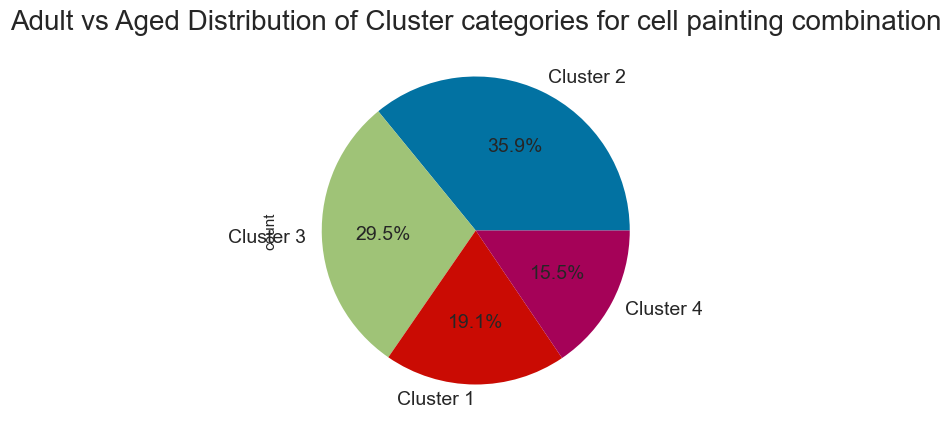

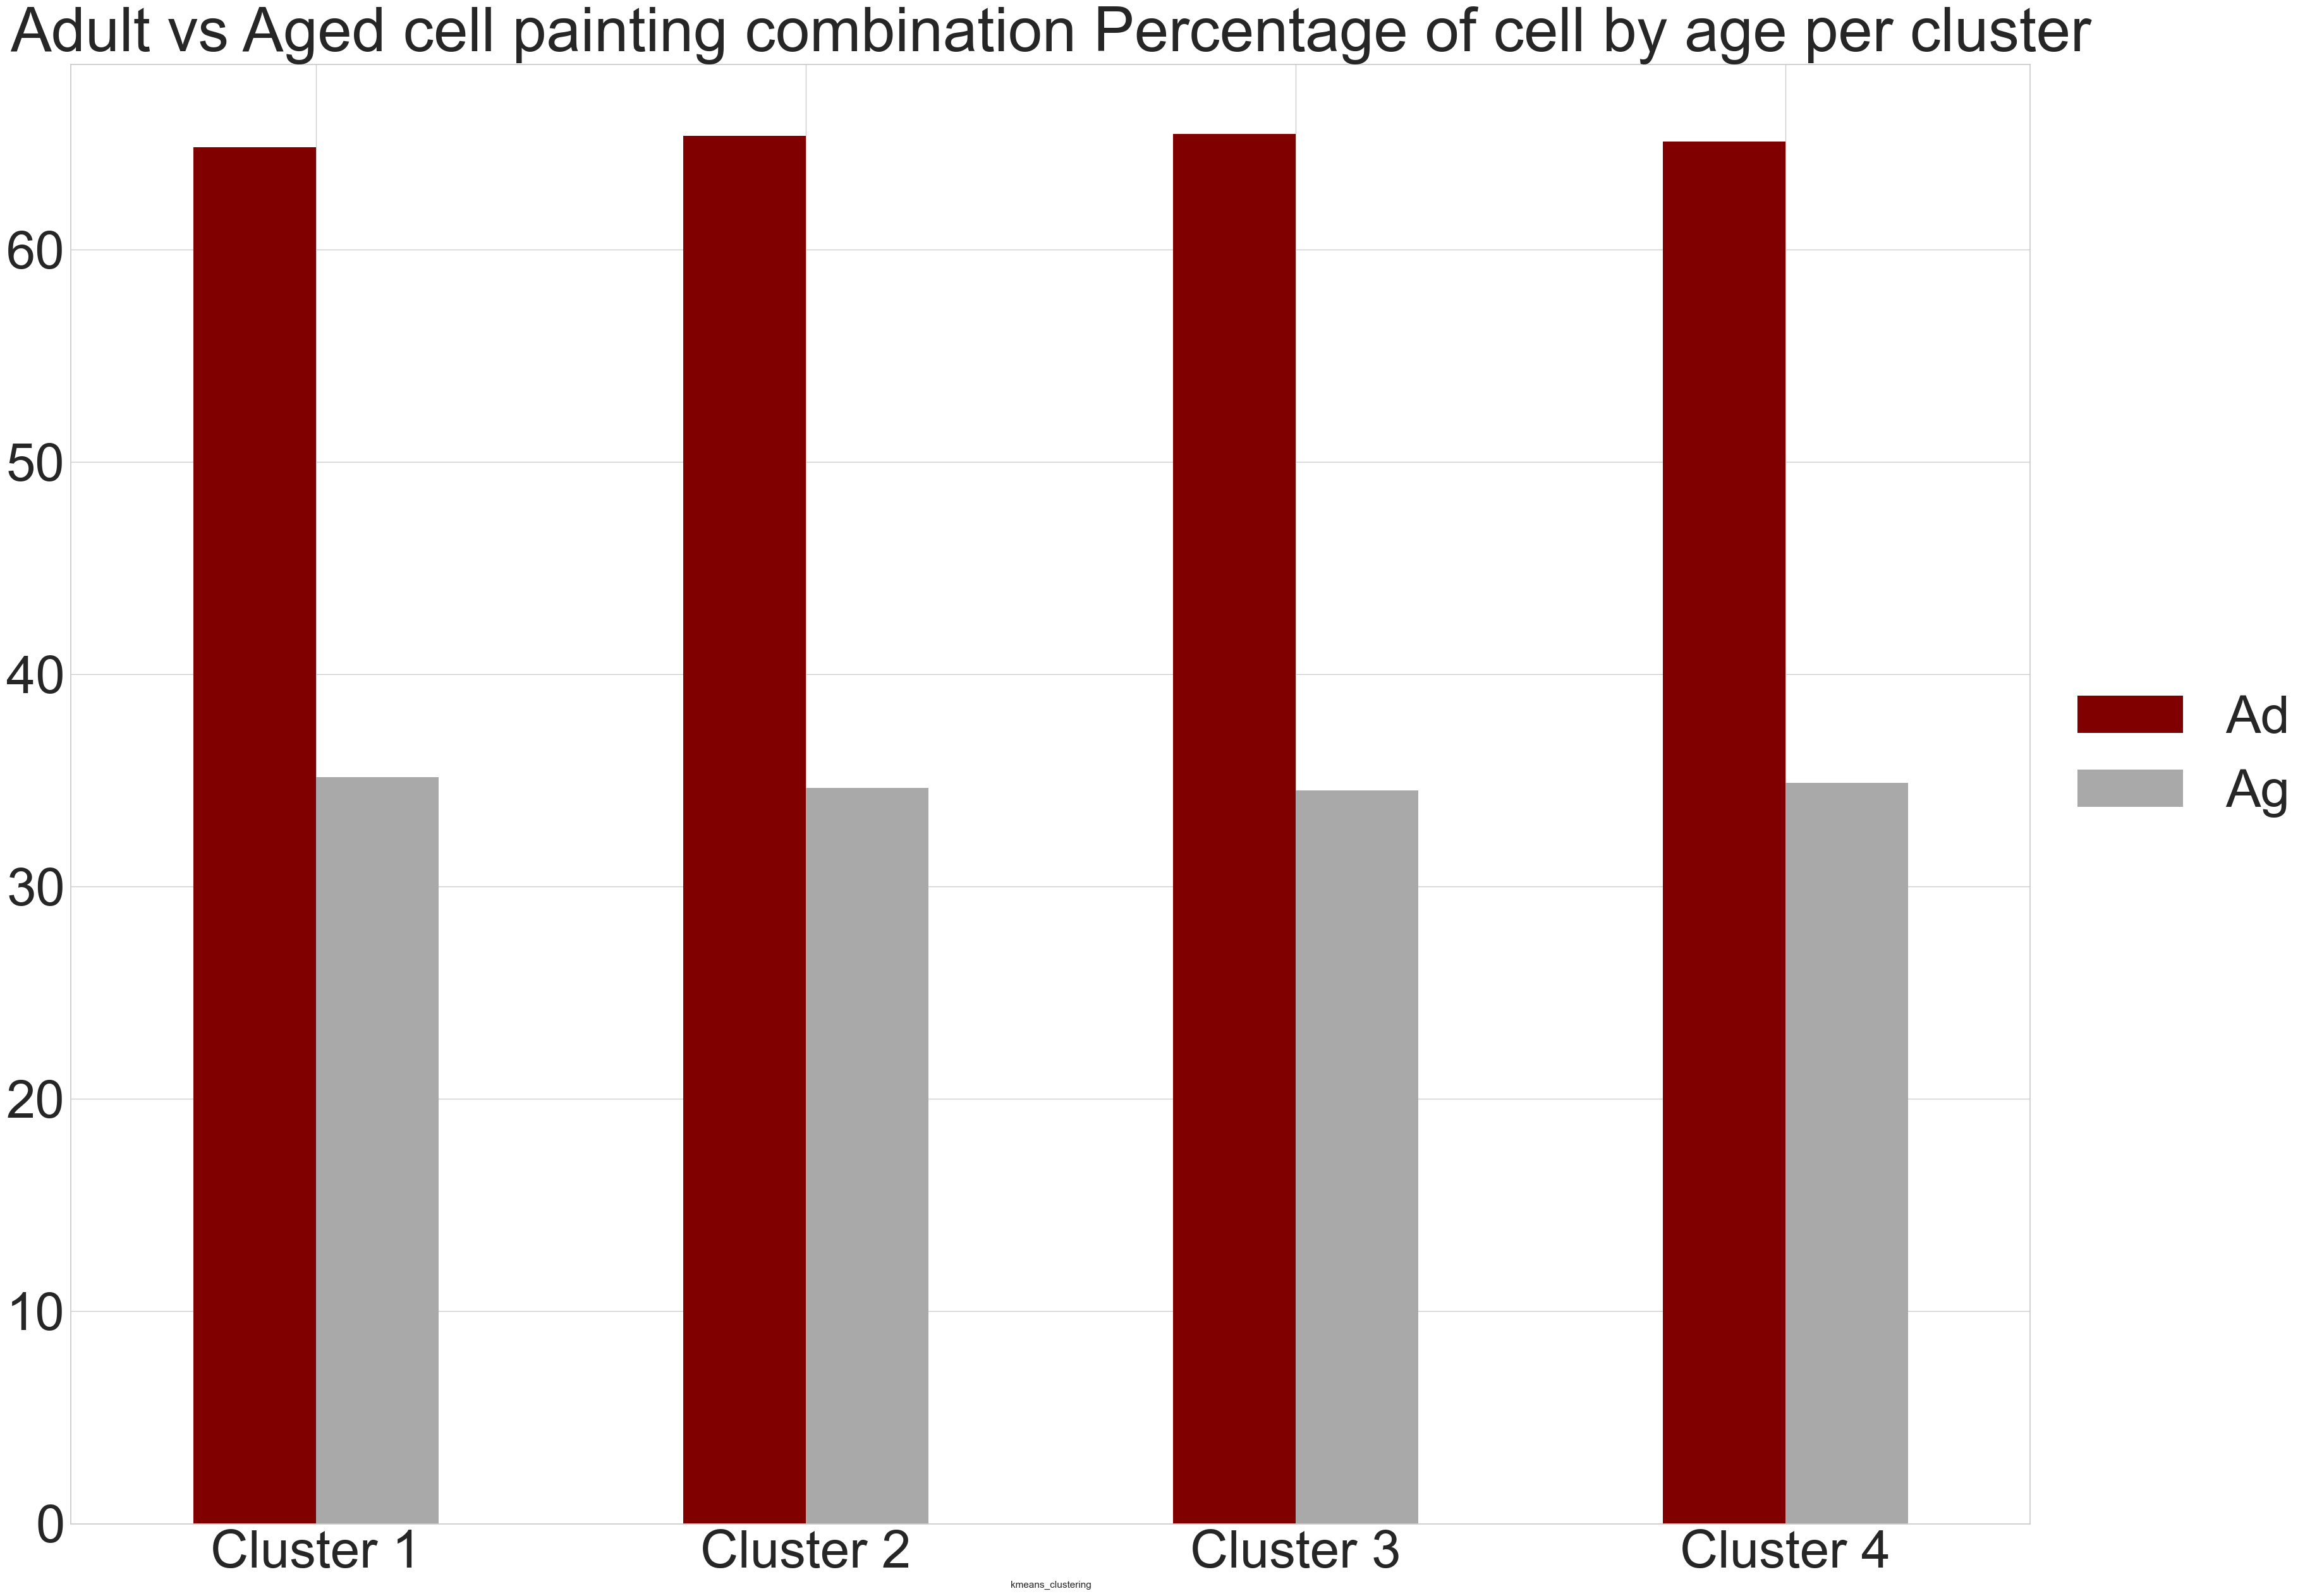

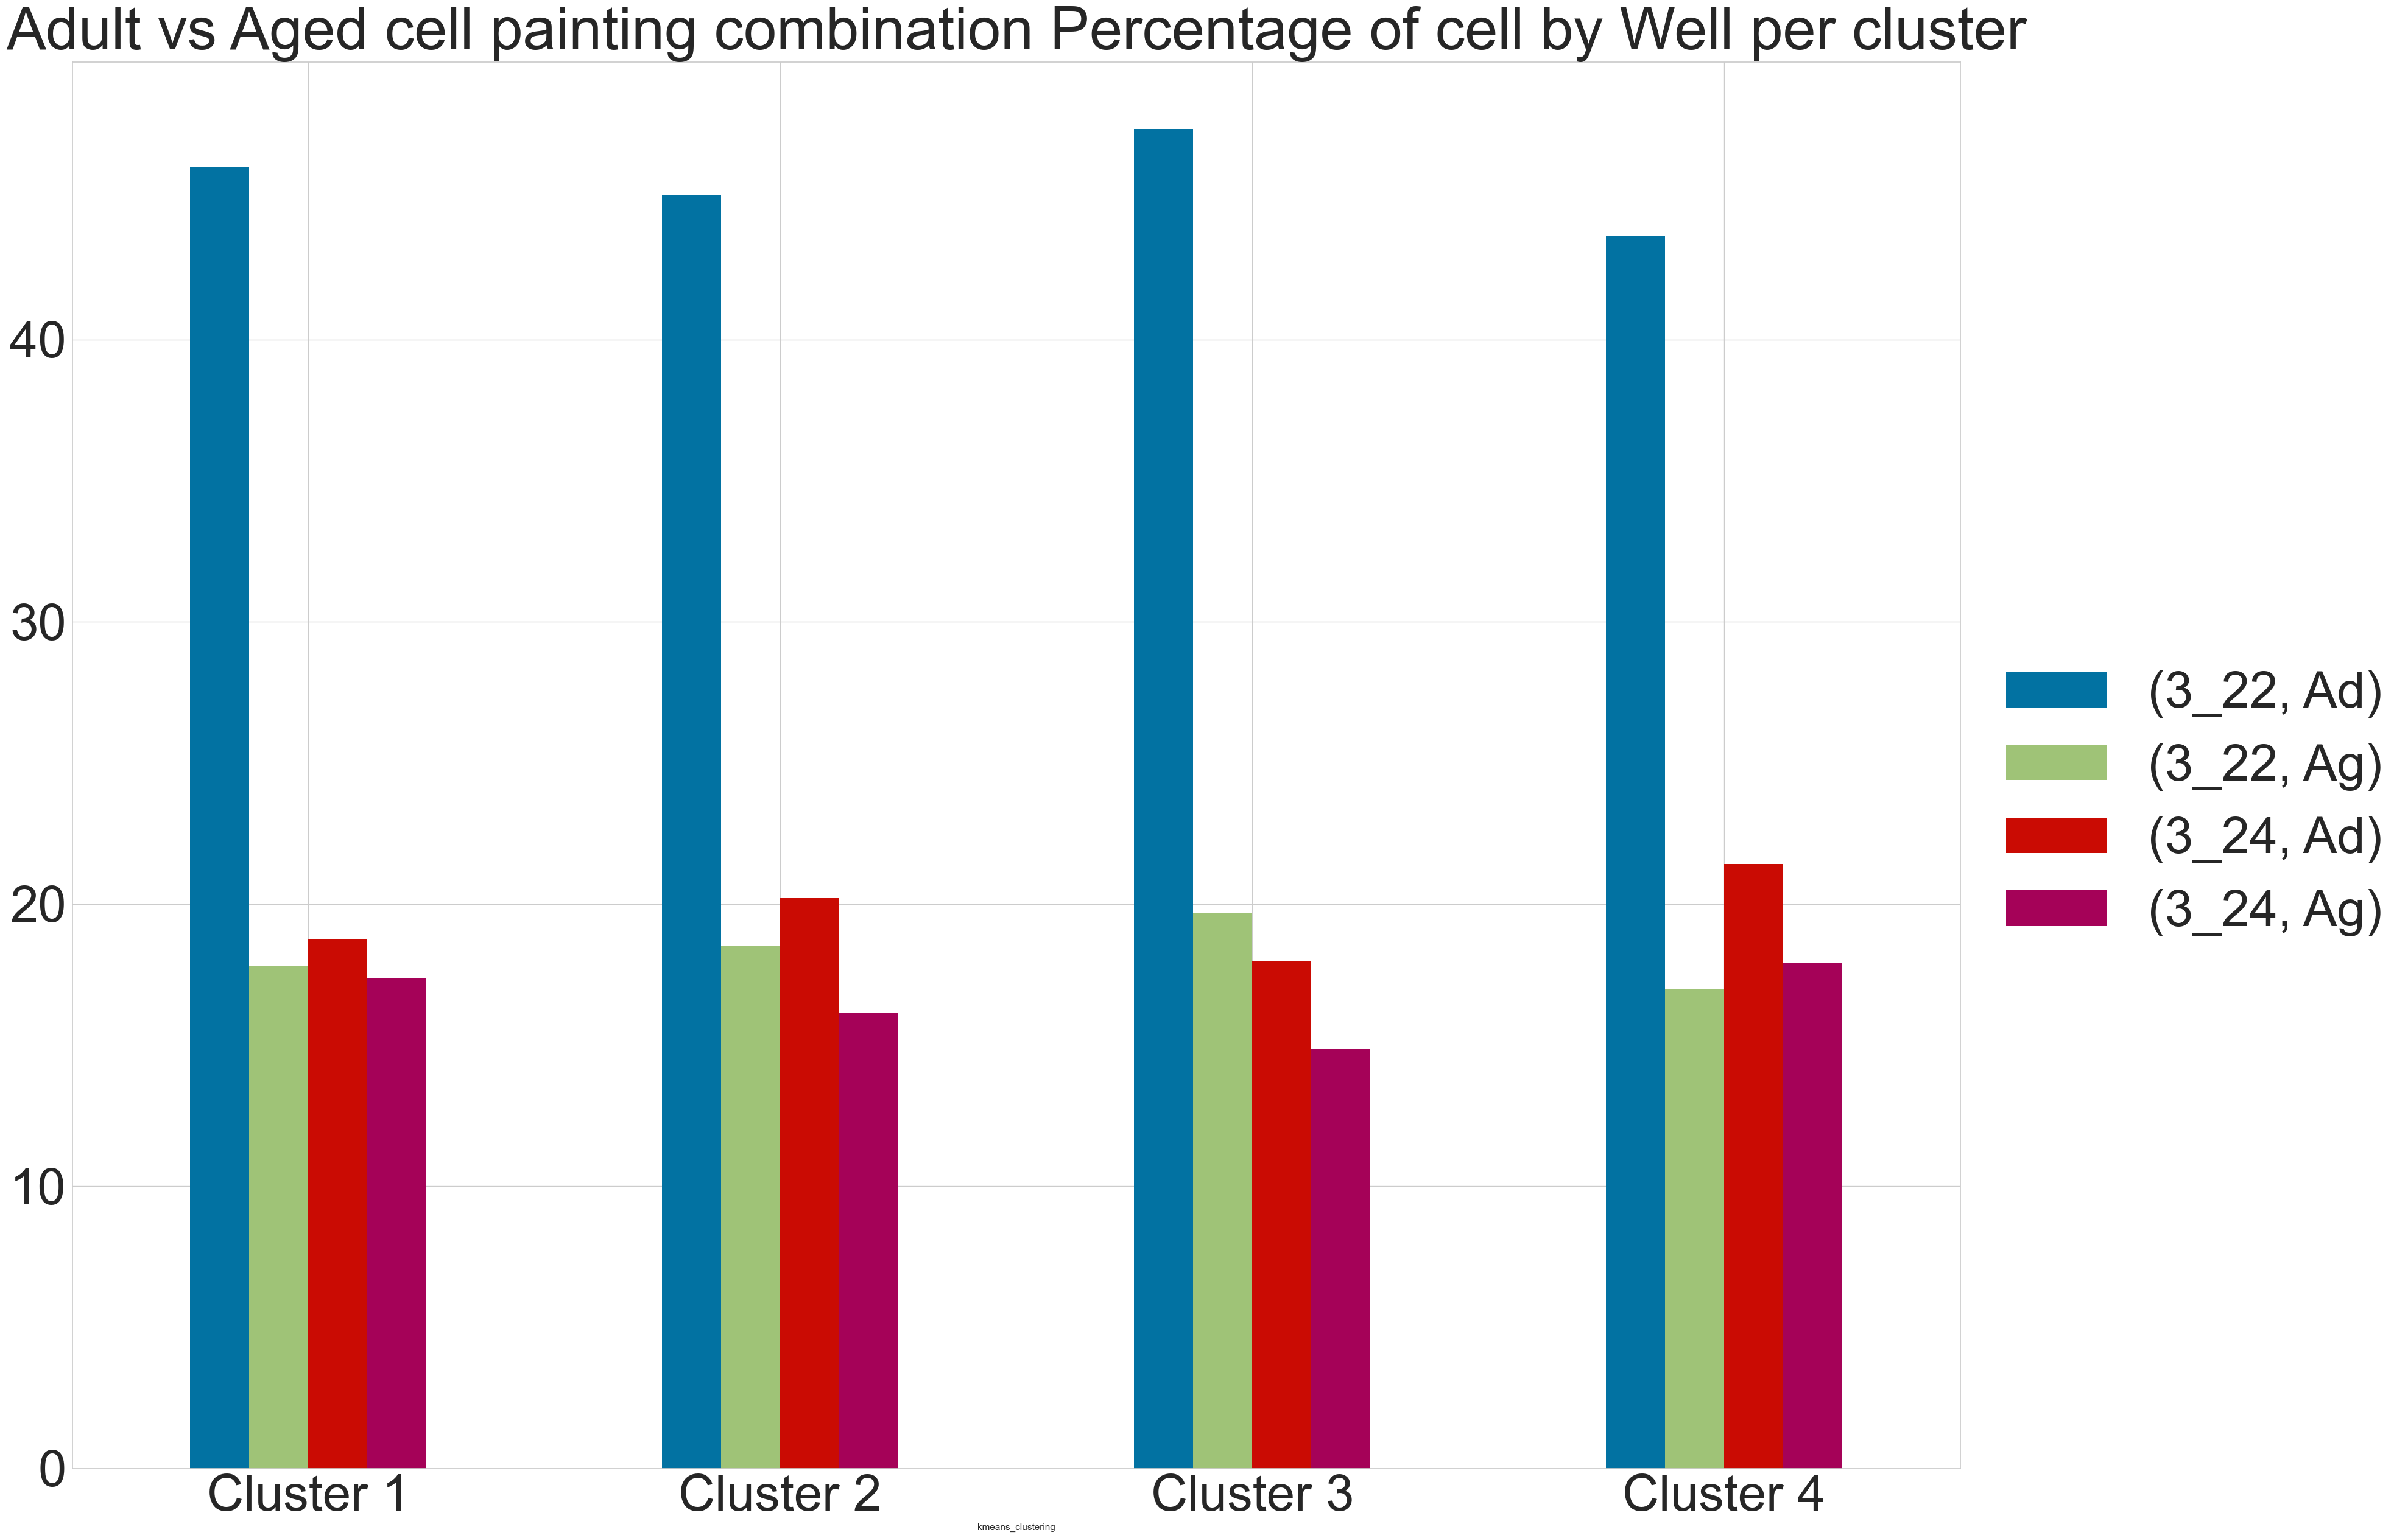

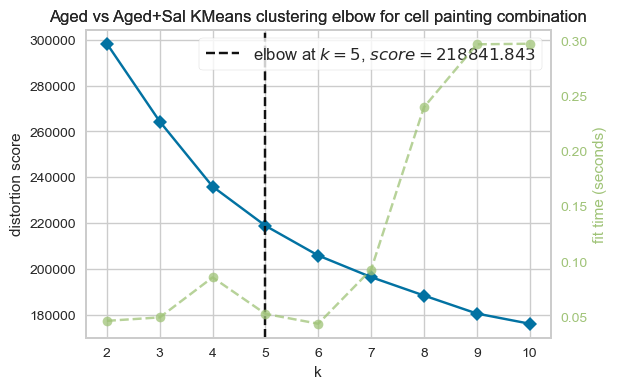

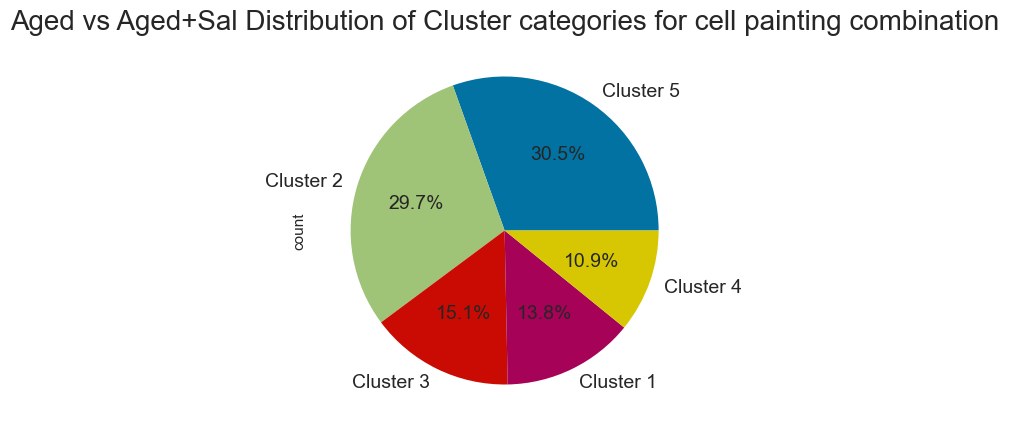

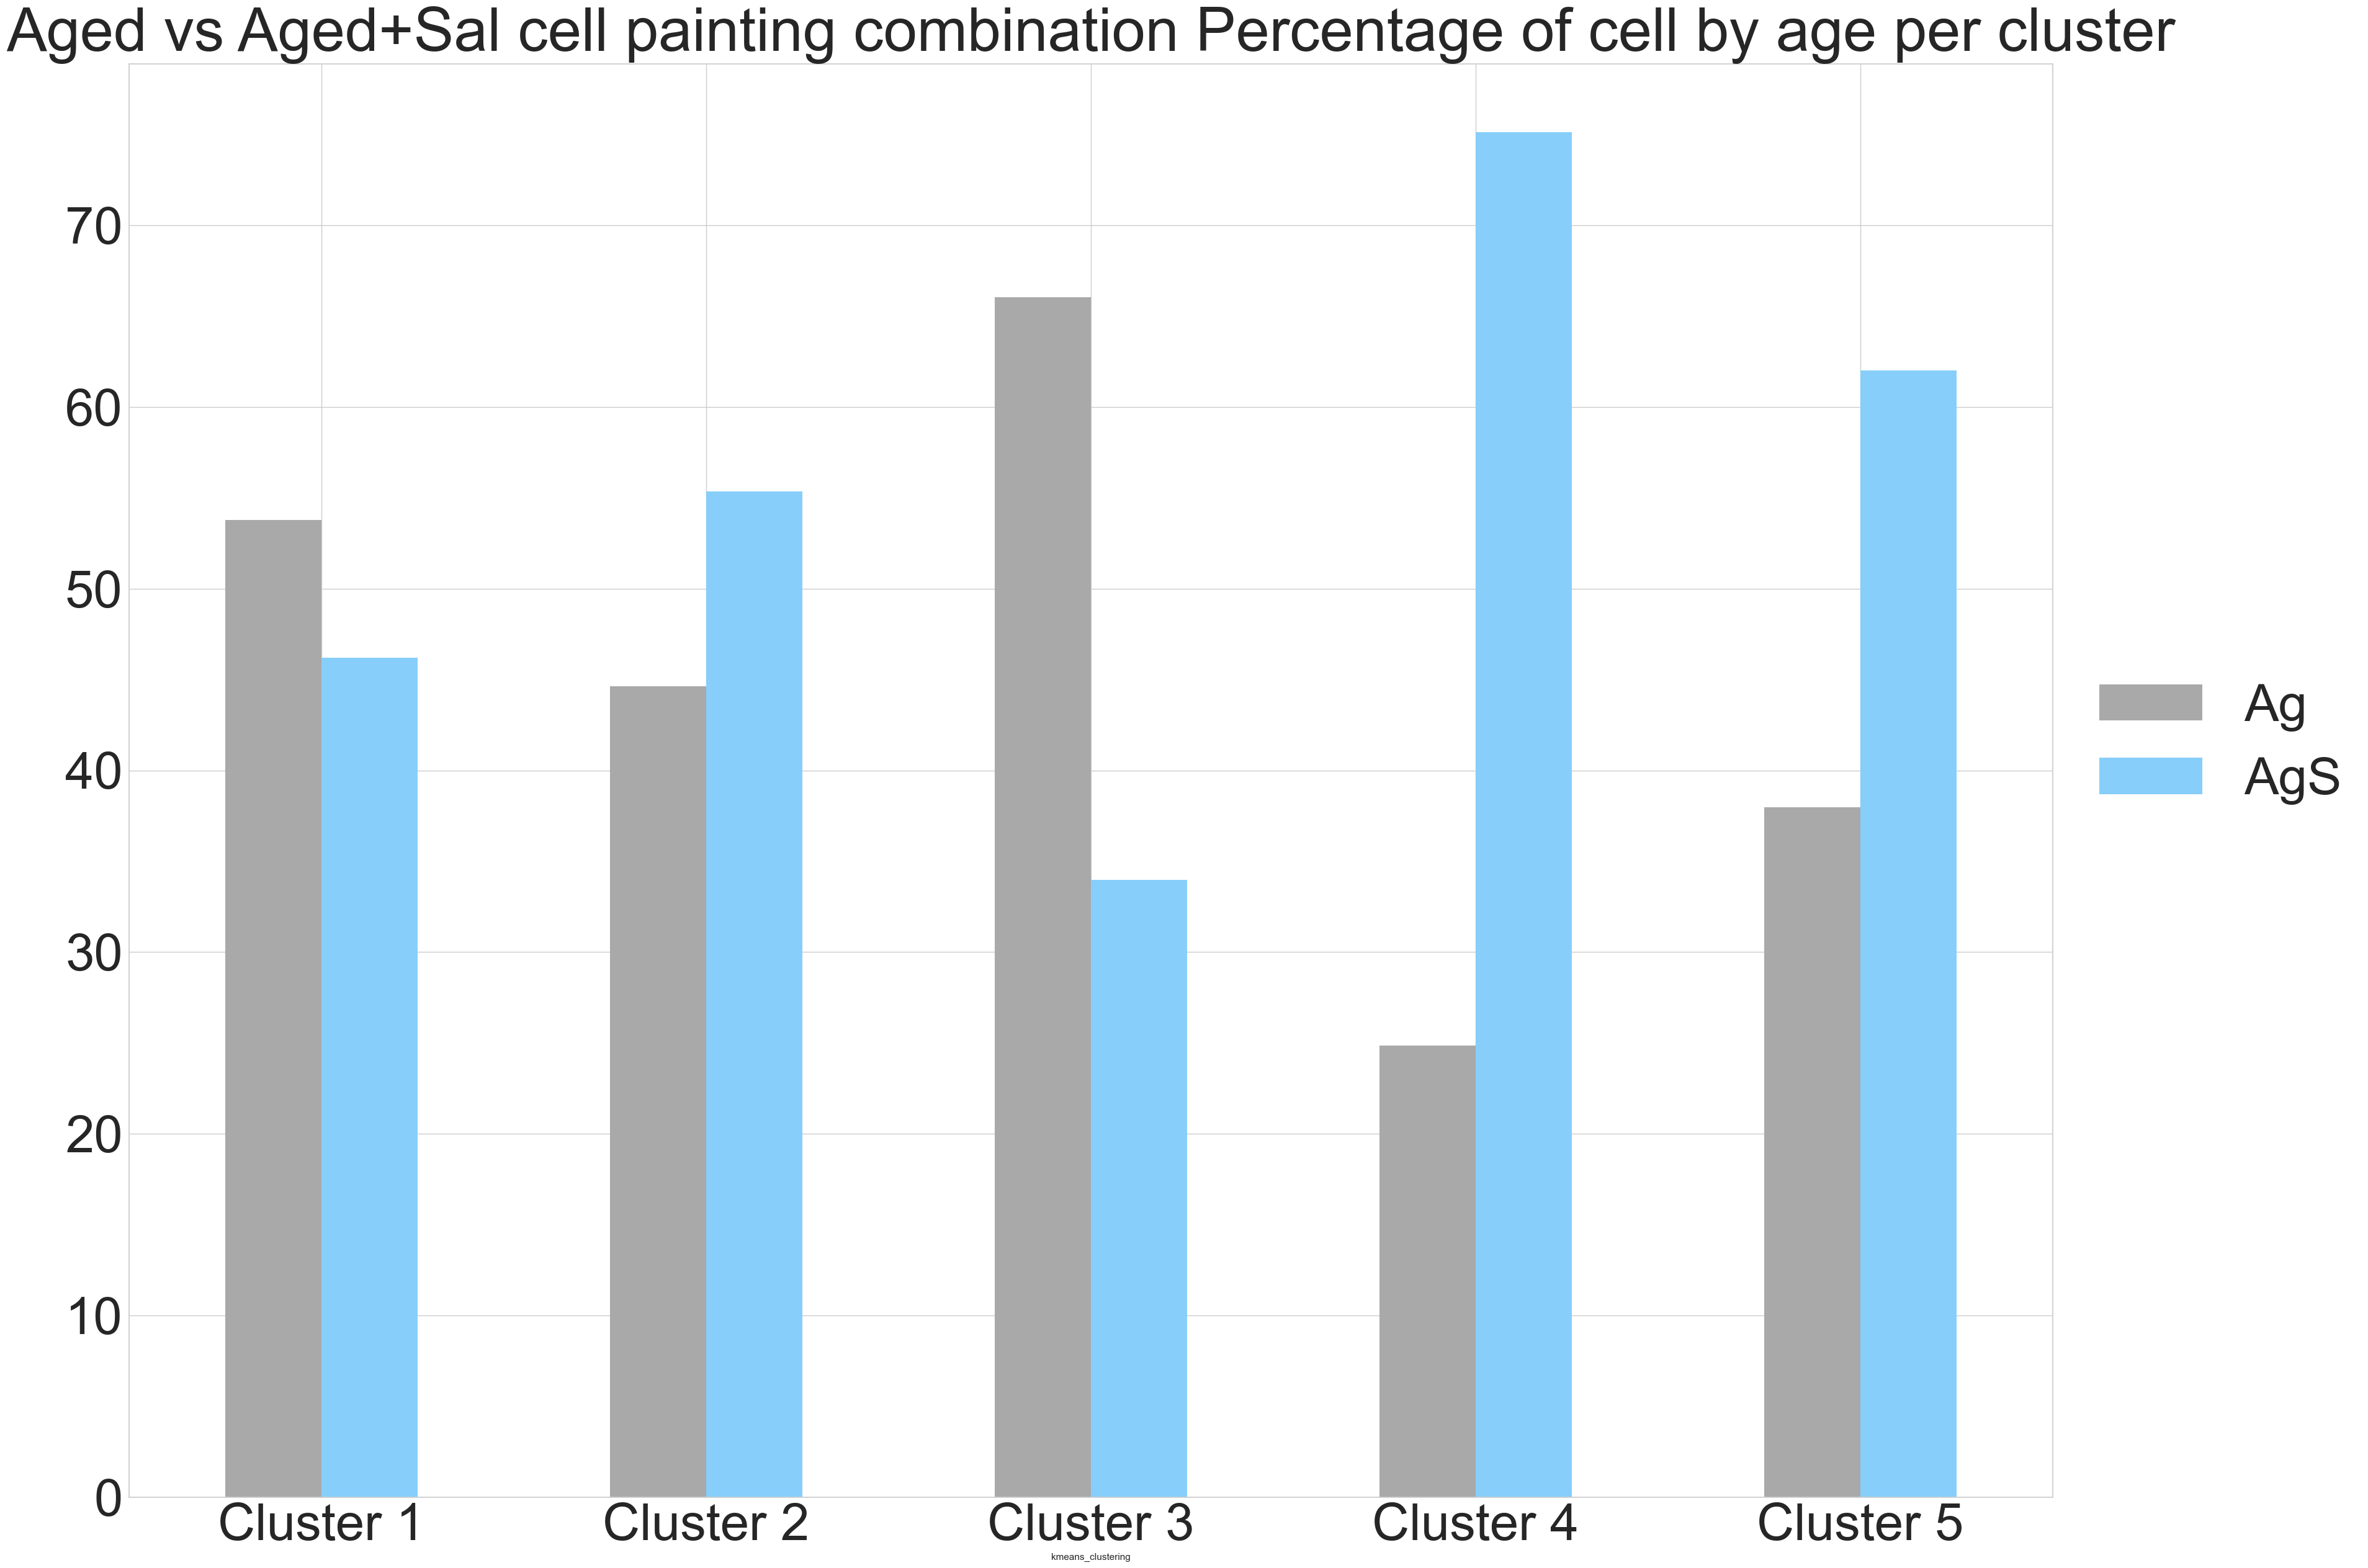

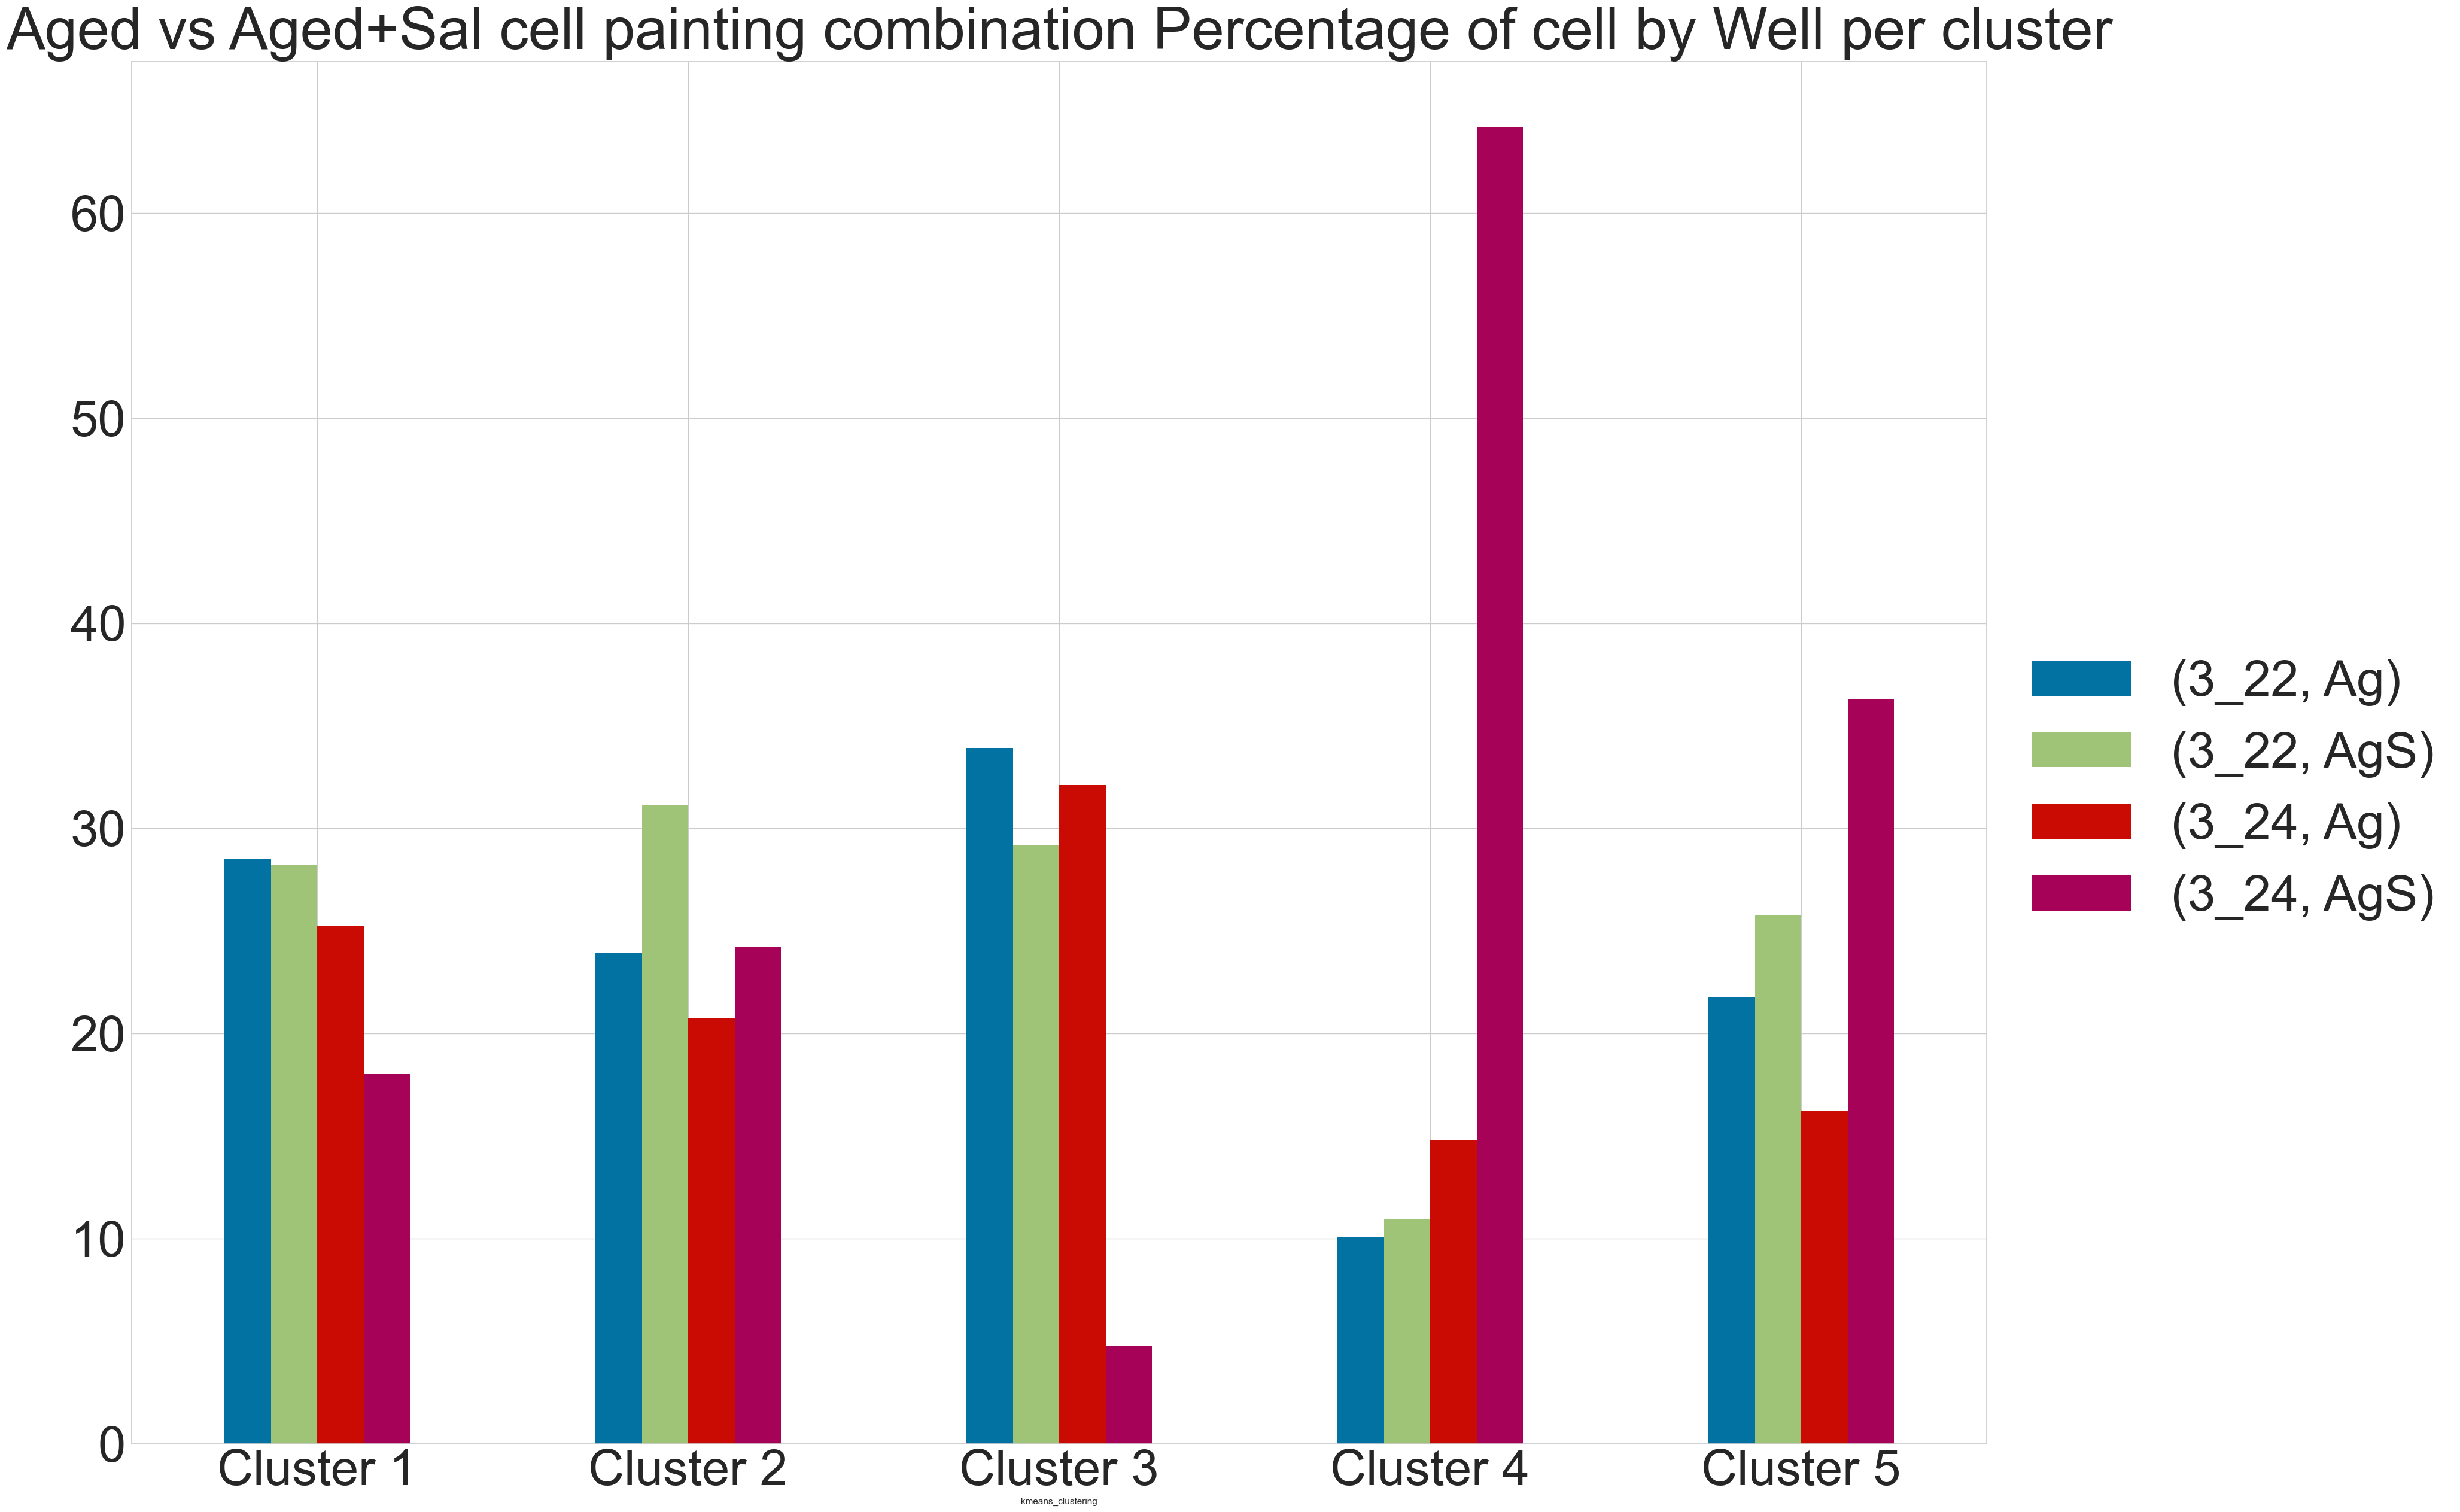

In [23]:
#clustering_data_df_3_22 = viz_clustering_analysis(data_df_all=data_df_3_22, curr_exp="cell painting 3_22")
#clustering_data_df_3_24 = viz_clustering_analysis(data_df_all=data_df_3_24, curr_exp="cell painting 3_24")
clustering_data_df_combined = viz_clustering_analysis(data_df_all=data_df_combined, curr_exp="cell painting combination")

In [24]:
data_df_combined

Exp Well ID  Field  Age   Sample  DAPI nucleus intensity mean  \
0      3_22  (2, 2)      1   Ad  3_22 S1                    -0.551728   
1      3_22  (2, 2)      1   Ad  3_22 S1                    -0.653592   
2      3_22  (2, 2)      1   Ad  3_22 S1                    -0.800411   
3      3_22  (2, 2)      1   Ad  3_22 S1                    -0.065392   
4      3_22  (2, 2)      1   Ad  3_22 S1                     0.414287   
...     ...     ...    ...  ...      ...                          ...   
11562  3_24  (4, 3)    132  AgS  3_24 S2                     0.201400   
11563  3_24  (4, 3)    132  AgS  3_24 S2                     0.592979   
11564  3_24  (4, 3)    132  AgS  3_24 S2                     0.946870   
11565  3_24  (4, 3)    132  AgS  3_24 S2                     0.218982   
11566  3_24  (4, 3)    132  AgS  3_24 S2                     0.217319   

       DAPI nucleus intensity sum  Actin texture spot  Actin texture hole  \
0                        4.603804           -0.659380           -0.410470   
1                       -0.654524            1.644321            0.815784   
2                        0.102936            0.597449            0.429114   
3                        0.356169           -0.104486           -0.021137   
4                        0.322815           -0.673020           -0.564213   
...                           ...                 ...                 ...   
11562                    0.972444           -0.929886           -1.294359   
11563                    3.137749           -1.307453           -1.554087   
11564                   -2.650668           -1.045349           -1.452891   
11565                    0.174080           -0.735010           -1.438620   
11566                   -0.304111            0.016742           -0.323462   

       Actin texture edge  ...  Mito texture bright  Mito texture dark  \
0               -0.088995  ...            -0.253857          -0.253574   
1               -0.232516  ...             1.078635           0.986686   
2                1.018482  ...             0.145450           0.127086   
3               -0.235089  ...             1.194069           0.558204   
4                0.307566  ...             0.077728           0.143658   
...                   ...  ...                  ...                ...   
11562            0.236806  ...             0.215684           0.265128   
11563            0.433290  ...            -0.410545          -0.382619   
11564            0.614176  ...            -0.114341          -0.147363   
11565            0.149485  ...             0.593133           0.626386   
11566            0.292902  ...             1.859908           2.004557   

       Actin cyto intensity mean  Actin cyto intensity sum  \
0                       1.761702                  3.085083   
1                      -0.409930                 -0.479359   
2                       1.168038                  0.795241   
3                       0.450016                 -0.309129   
4                       1.044714                 -0.038483   
...                          ...                       ...   
11562                   0.703983                 -0.285473   
11563                   1.458213                 -0.322031   
11564                   1.074757                 -0.623346   
11565                   0.552946                 -0.561858   
11566                   0.226965                 -0.591767   

       Mito cyto intensity mean  Mito cyto intensity sum  Cell area  \
0                      1.718117                 3.183574   1.476258   
1                     -0.674686                -0.560473  -0.245810   
2                      0.633632                 0.519892   0.243556   
3                      0.297146                -0.289947  -0.351467   
4                      0.128350                -0.287763  -0.366523   
...                         ...                      ...        ...   
11562                  0.429373                -0.334535  -0.341108   
1156

### Cluster feature importance

In [45]:
def cluster_feat_importance_data(clustering_data_df):

    dict_data = {}
    
    num_features=5

    for cluster in sorted(list(np.unique(clustering_data_df['kmeans_clustering']))):
        y = np.where(clustering_data_df.kmeans_clustering==cluster, 1, 0)

        clf = RandomForestClassifier(random_state=1)
        clf.fit(clustering_data_df.loc[:, relevant_features], y)

        base_imp = pd.DataFrame(clf.feature_importances_,index=relevant_features)#relevant_data_df.columns)
        base_imp = base_imp.reset_index()
        base_imp.columns=["Features", "MDI"]
        base_imp = base_imp.sort_values("MDI", ascending=False)
        list_of_cluster_features = list(base_imp['Features'][:num_features])

        relevant_data_df = clustering_data_df[clustering_data_df['kmeans_clustering']==cluster]
        age_labels = list(relevant_data_df['Age'])
        sample_labels = list(relevant_data_df['Sample'])
        relevant_data_df = relevant_data_df.loc[:, list_of_cluster_features]
        scaled_features = StandardScaler().fit_transform(relevant_data_df)
        vis_df = pd.DataFrame(scaled_features, columns=relevant_data_df.columns)
        vis_df['Age'] = age_labels
        vis_df['Sample'] = sample_labels

        dict_data[cluster] = vis_df
        
    return dict_data


In [46]:
dict_data_cluster_feat = cluster_feat_importance_data(clustering_data_df_combined)

In [175]:
dict_data_cluster_feat.keys()

dict_keys(['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'])

In [176]:
clust1_data = dict_data_cluster_feat['Cluster 1']
clust2_data = dict_data_cluster_feat['Cluster 2']
clust3_data = dict_data_cluster_feat['Cluster 3']
clust4_data = dict_data_cluster_feat['Cluster 4']
clust5_data = dict_data_cluster_feat['Cluster 5']

In [177]:
def viz_cluster_feat(df,title, save_name):
    age_mapping = {
    'Ad': 'Adult',
    'Ag': 'Aged',
    'AgS': 'Aged Sal'}

    age_color_map = {
    "Adult": 'maroon',
    "Aged": 'darkgray',
    "Aged Sal": 'lightskyblue',}
    
    df['Age'] = df['Age'].replace(age_mapping)

    indiv_data = df.groupby(by=['Age', 'Sample']).mean()

    yerr = df.drop('Sample', axis=1).groupby('Age').sem().T

    bar_val = df.drop('Sample', axis=1).groupby('Age').mean().T

    x = np.arange(len(indiv_data.columns))  

    width = 0.25  
    multiplier = 0

    fig, ax = plt.subplots(figsize=(40, 20), layout='constrained')

    error_bar_settings = dict(
            ecolor='black',         # Edge color of the error bars
            elinewidth=2,         # Line width of the error bars
            capsize=5,           # Width of the caps on the error bars
            capthick=2            # Thickness of the cap lines
        )

    for attribute in bar_val.columns:
        measurement = bar_val[attribute]
        offset = width * multiplier
        # Get the color for the current attribute
        color = age_color_map.get(attribute, 'black')
        rects = ax.bar(
            x + offset, measurement, width, label=attribute,
            yerr=yerr[attribute], capsize=20, color=color, error_kw=error_bar_settings, alpha=0.6
        )
        multiplier += 1

    # Now plot the scatter points (individual data)
    multiplier = 0
    jitter_factor = 0.4
    for attribute in bar_val.columns:
        offset = width * multiplier
        color = age_color_map.get(attribute, 'black')

        
        for i, variable in enumerate(bar_val.index):
            # Check if the attribute exists in the data
            if attribute in indiv_data.index.get_level_values('Age').unique():
                # Get individual data points
                data_points = indiv_data.loc[attribute][variable].values
                x_positions = x[i] + offset + (np.random.rand(len(data_points)) - 0.5) * width * jitter_factor
                ax.scatter(x_positions, data_points, color='black', zorder=10)
        multiplier += 1

    ax.set_xticks(x + width, bar_val.index)
    ax.tick_params(axis='x', labelsize=35)
    ax.legend(fontsize=40, bbox_to_anchor=(1, 0.6))
    plt.yticks(fontsize=30)
    ax.set_ylabel('Mean (+/- SE)', fontsize=40, fontweight="bold")
    plt.title(title, fontsize=50, fontweight="bold")
    plt.show()
    
    file_name = os.getcwd() + '/figures/' + save_name

    fig.savefig(file_name, dpi=600, bbox_inches='tight')


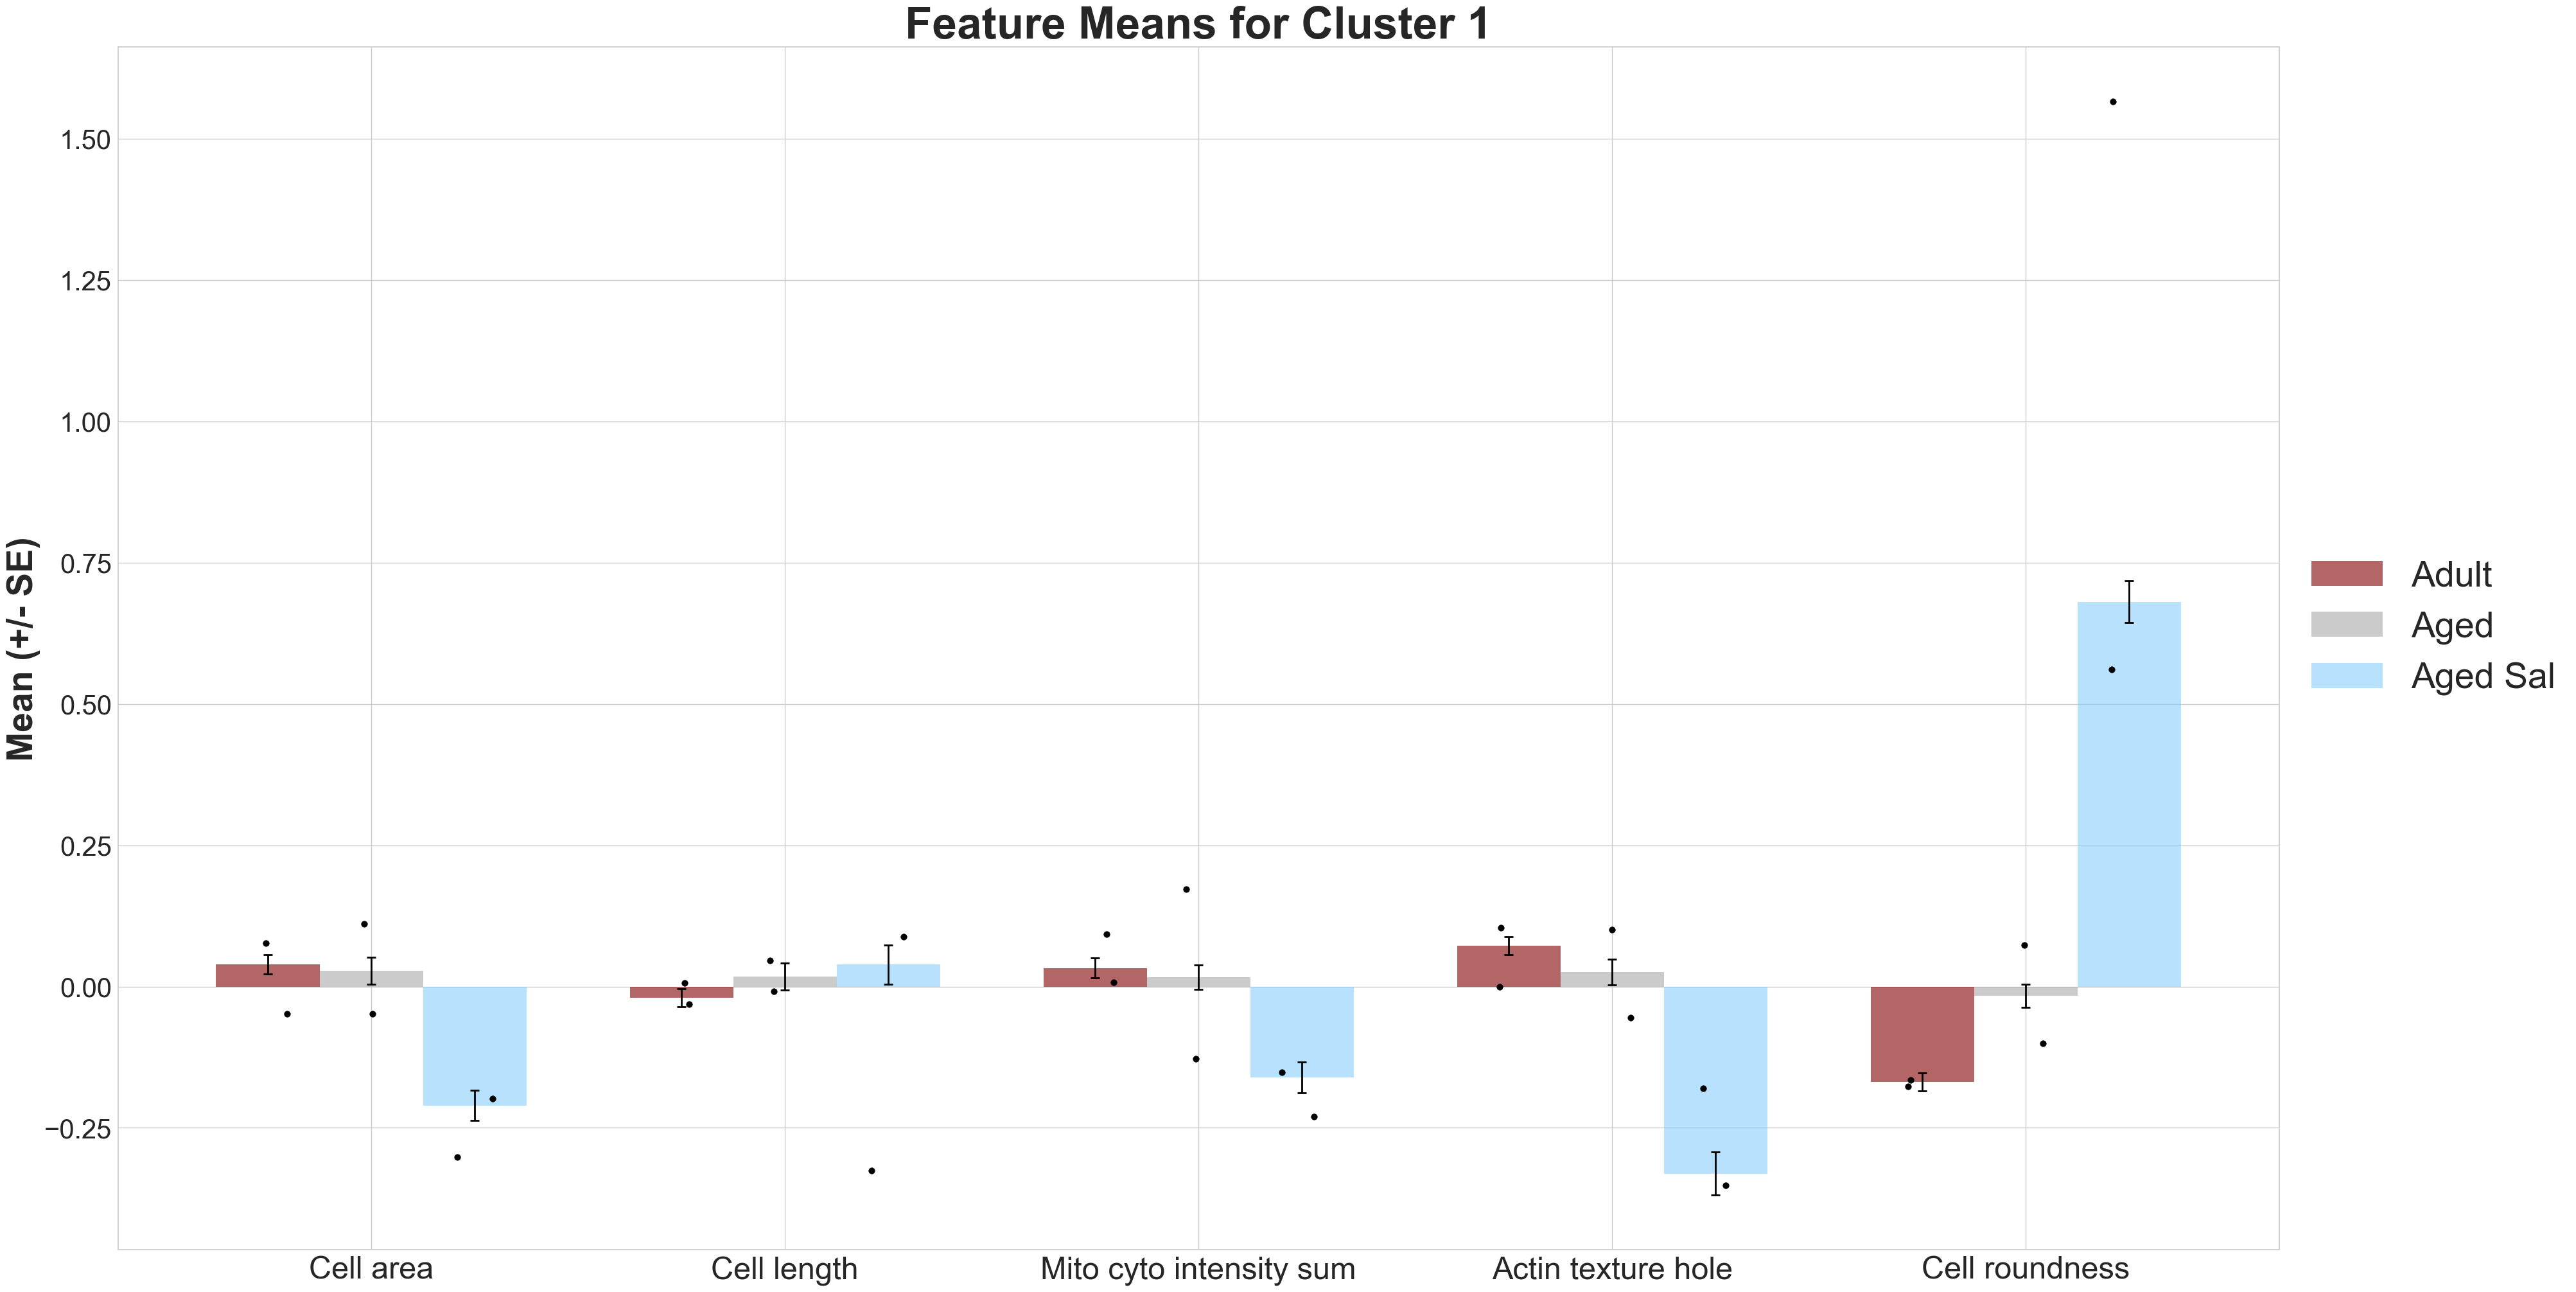

In [173]:
viz_cluster_feat(clust1_data,"Feature Means for Cluster 1","clust1.png")

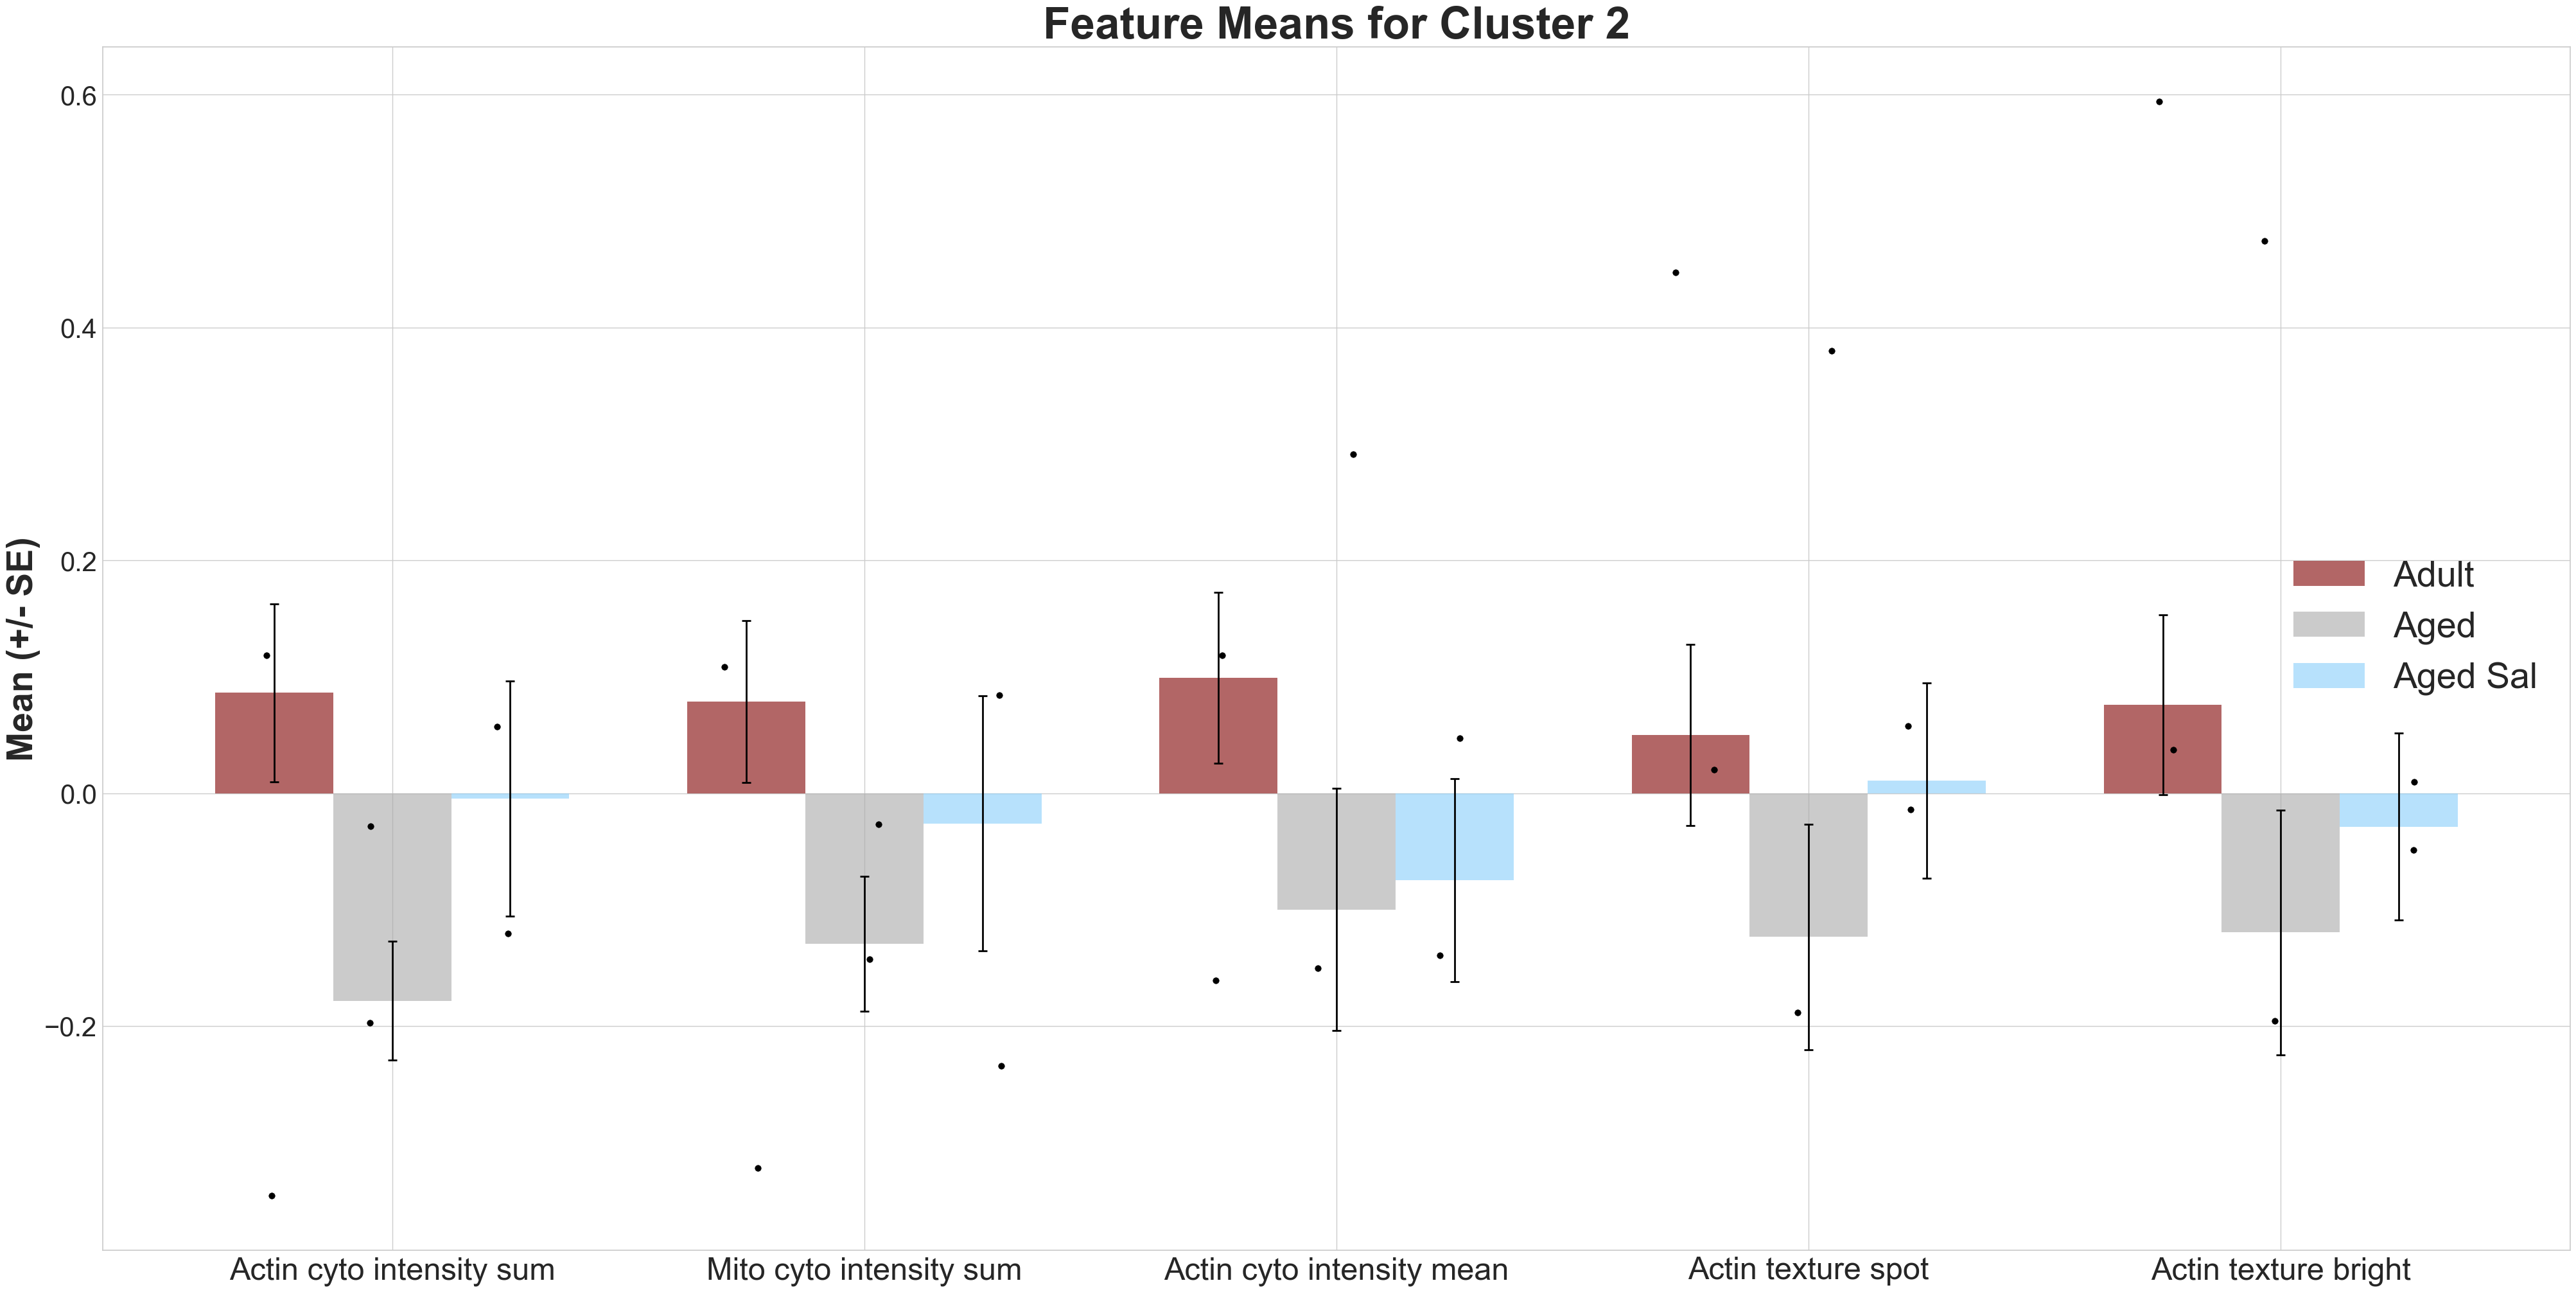

In [178]:
viz_cluster_feat(clust2_data,"Feature Means for Cluster 2","clust2.png")

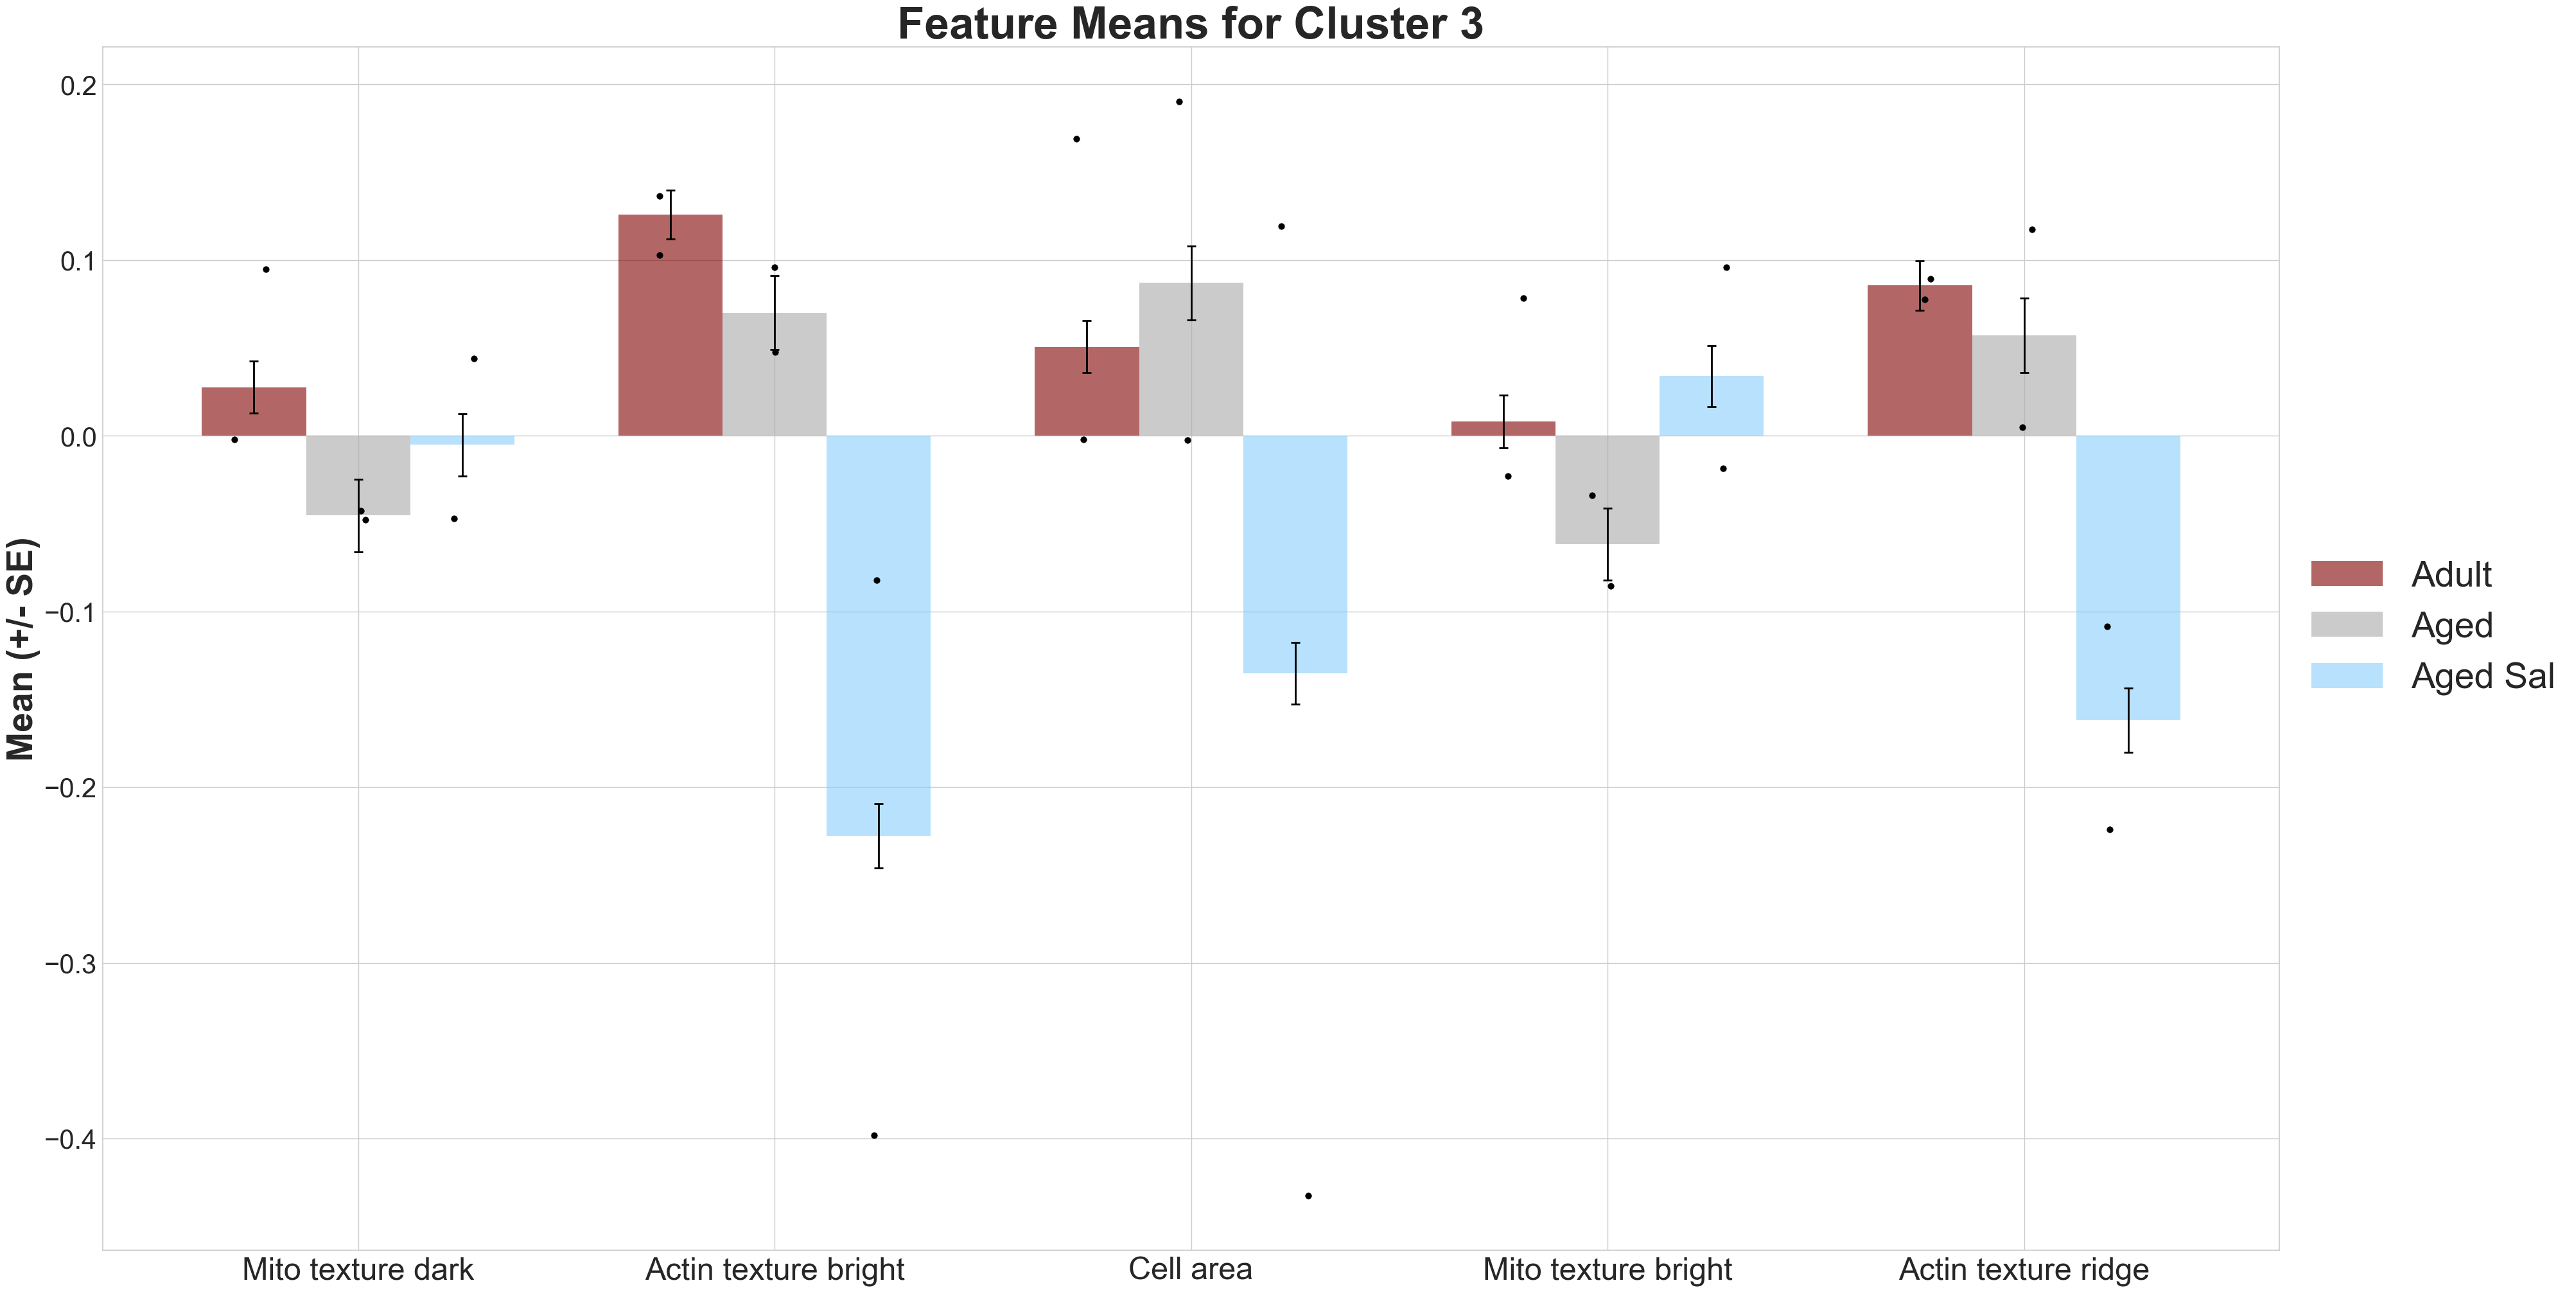

In [179]:
viz_cluster_feat(clust3_data,"Feature Means for Cluster 3","clust3.png")

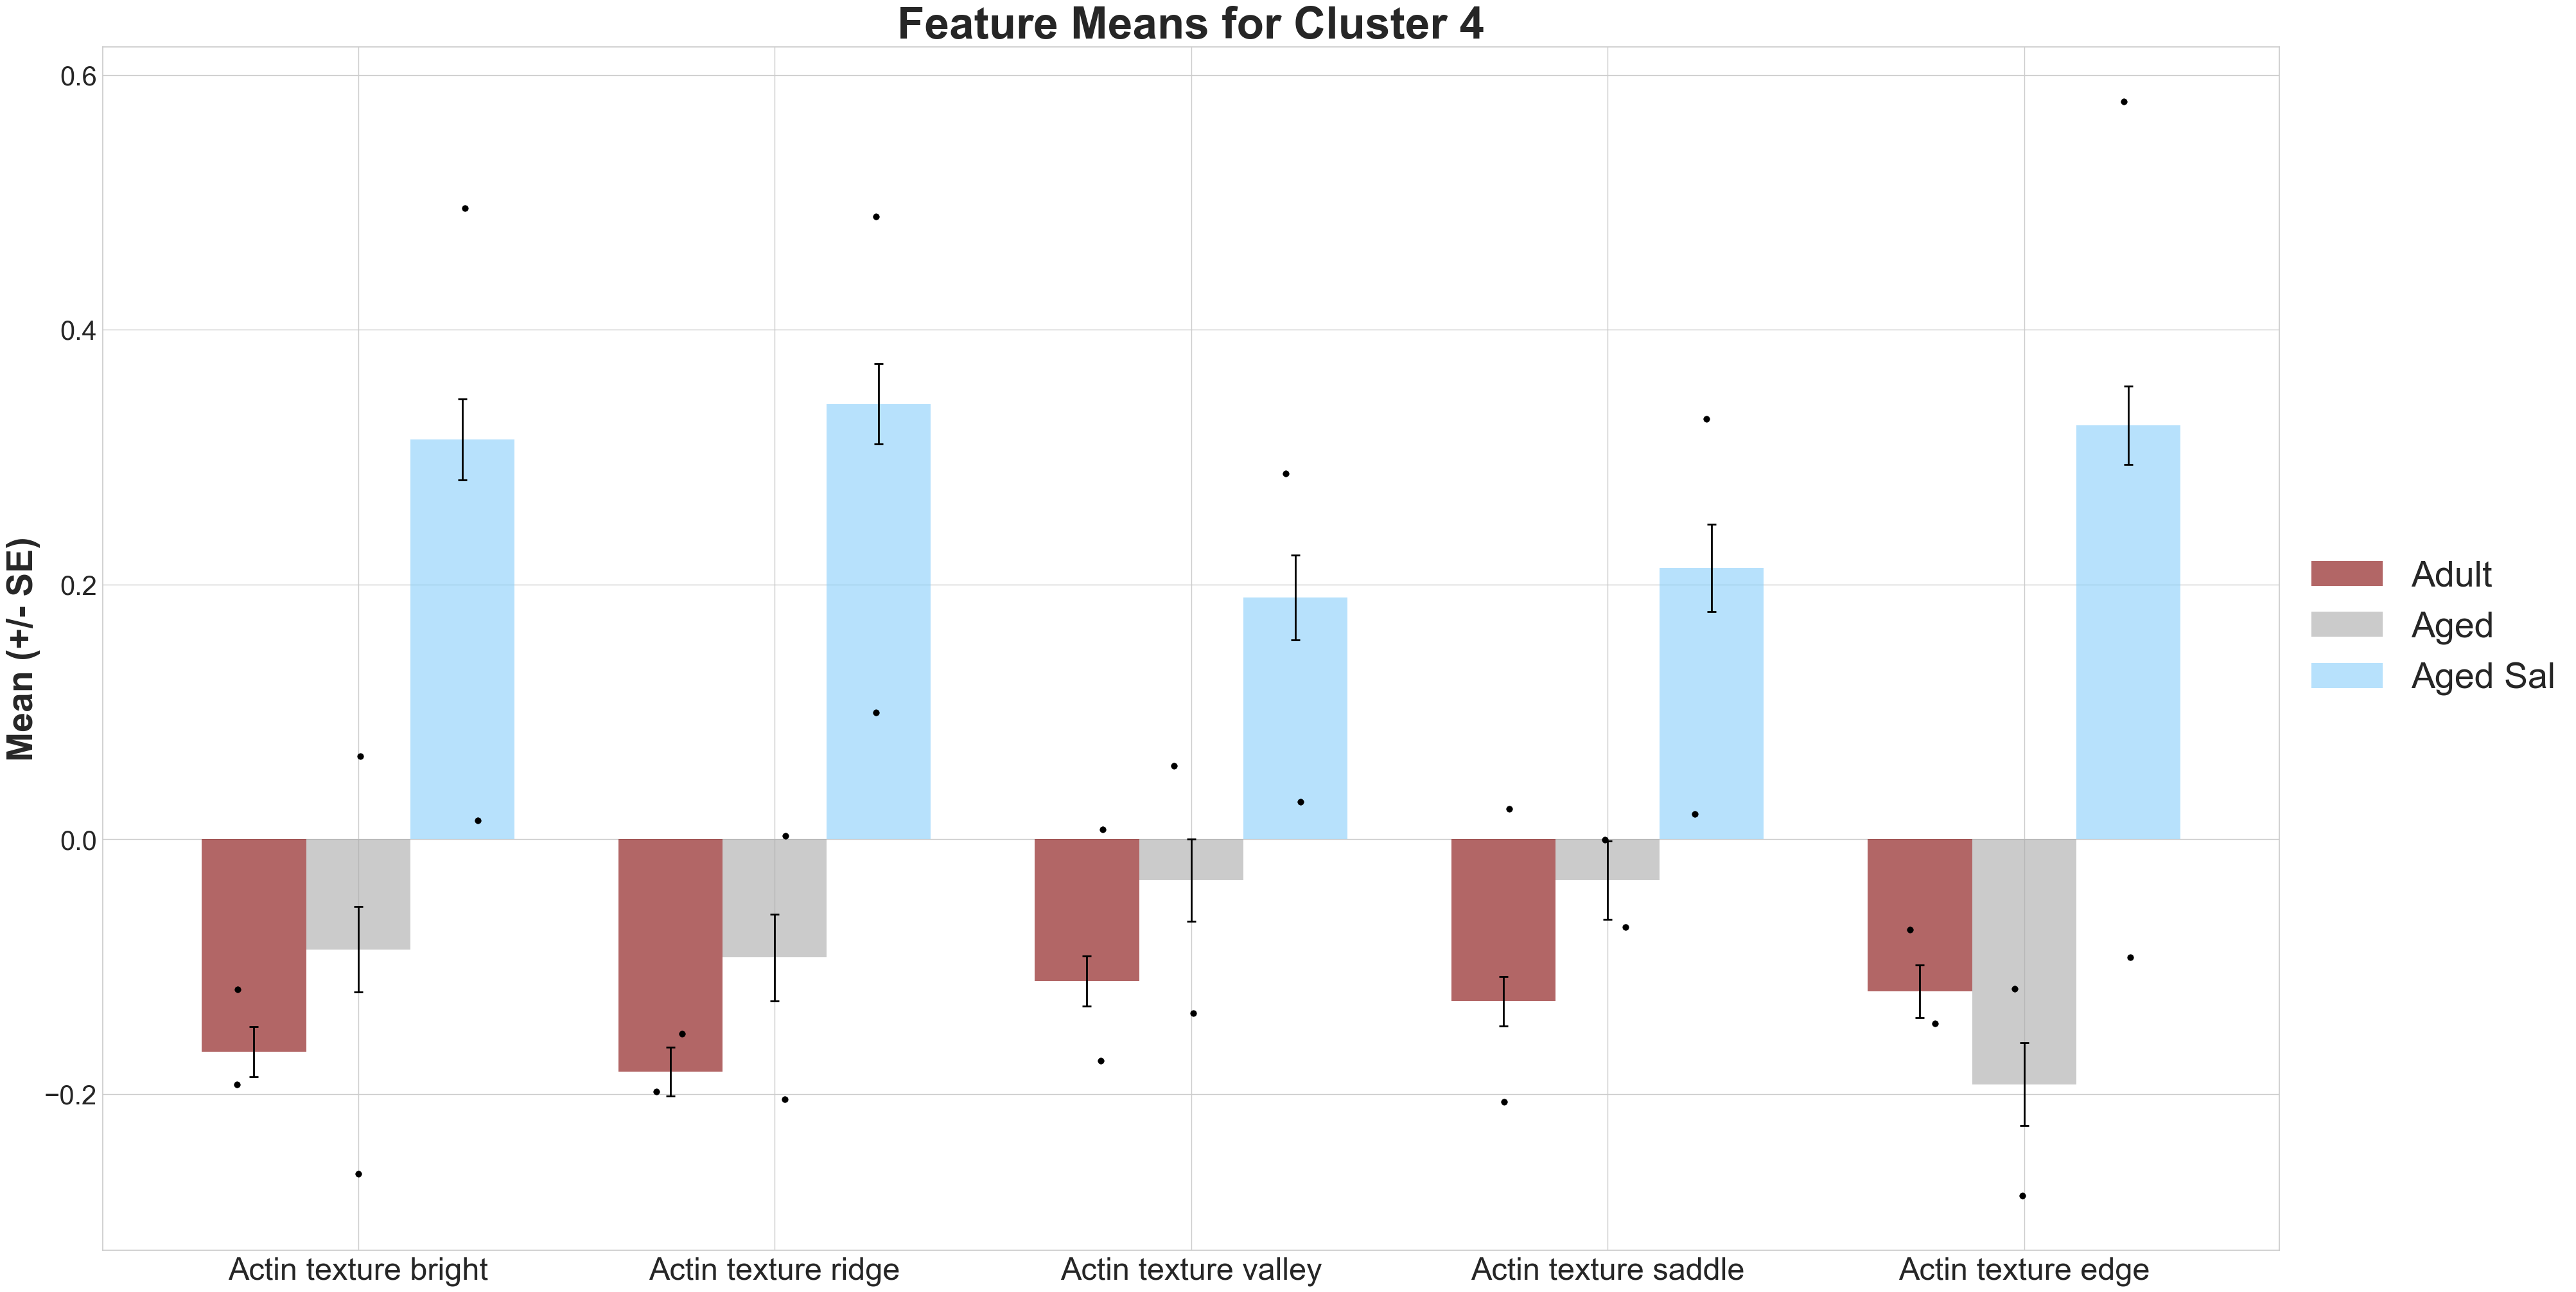

In [180]:
viz_cluster_feat(clust4_data,"Feature Means for Cluster 4","clust4.png")

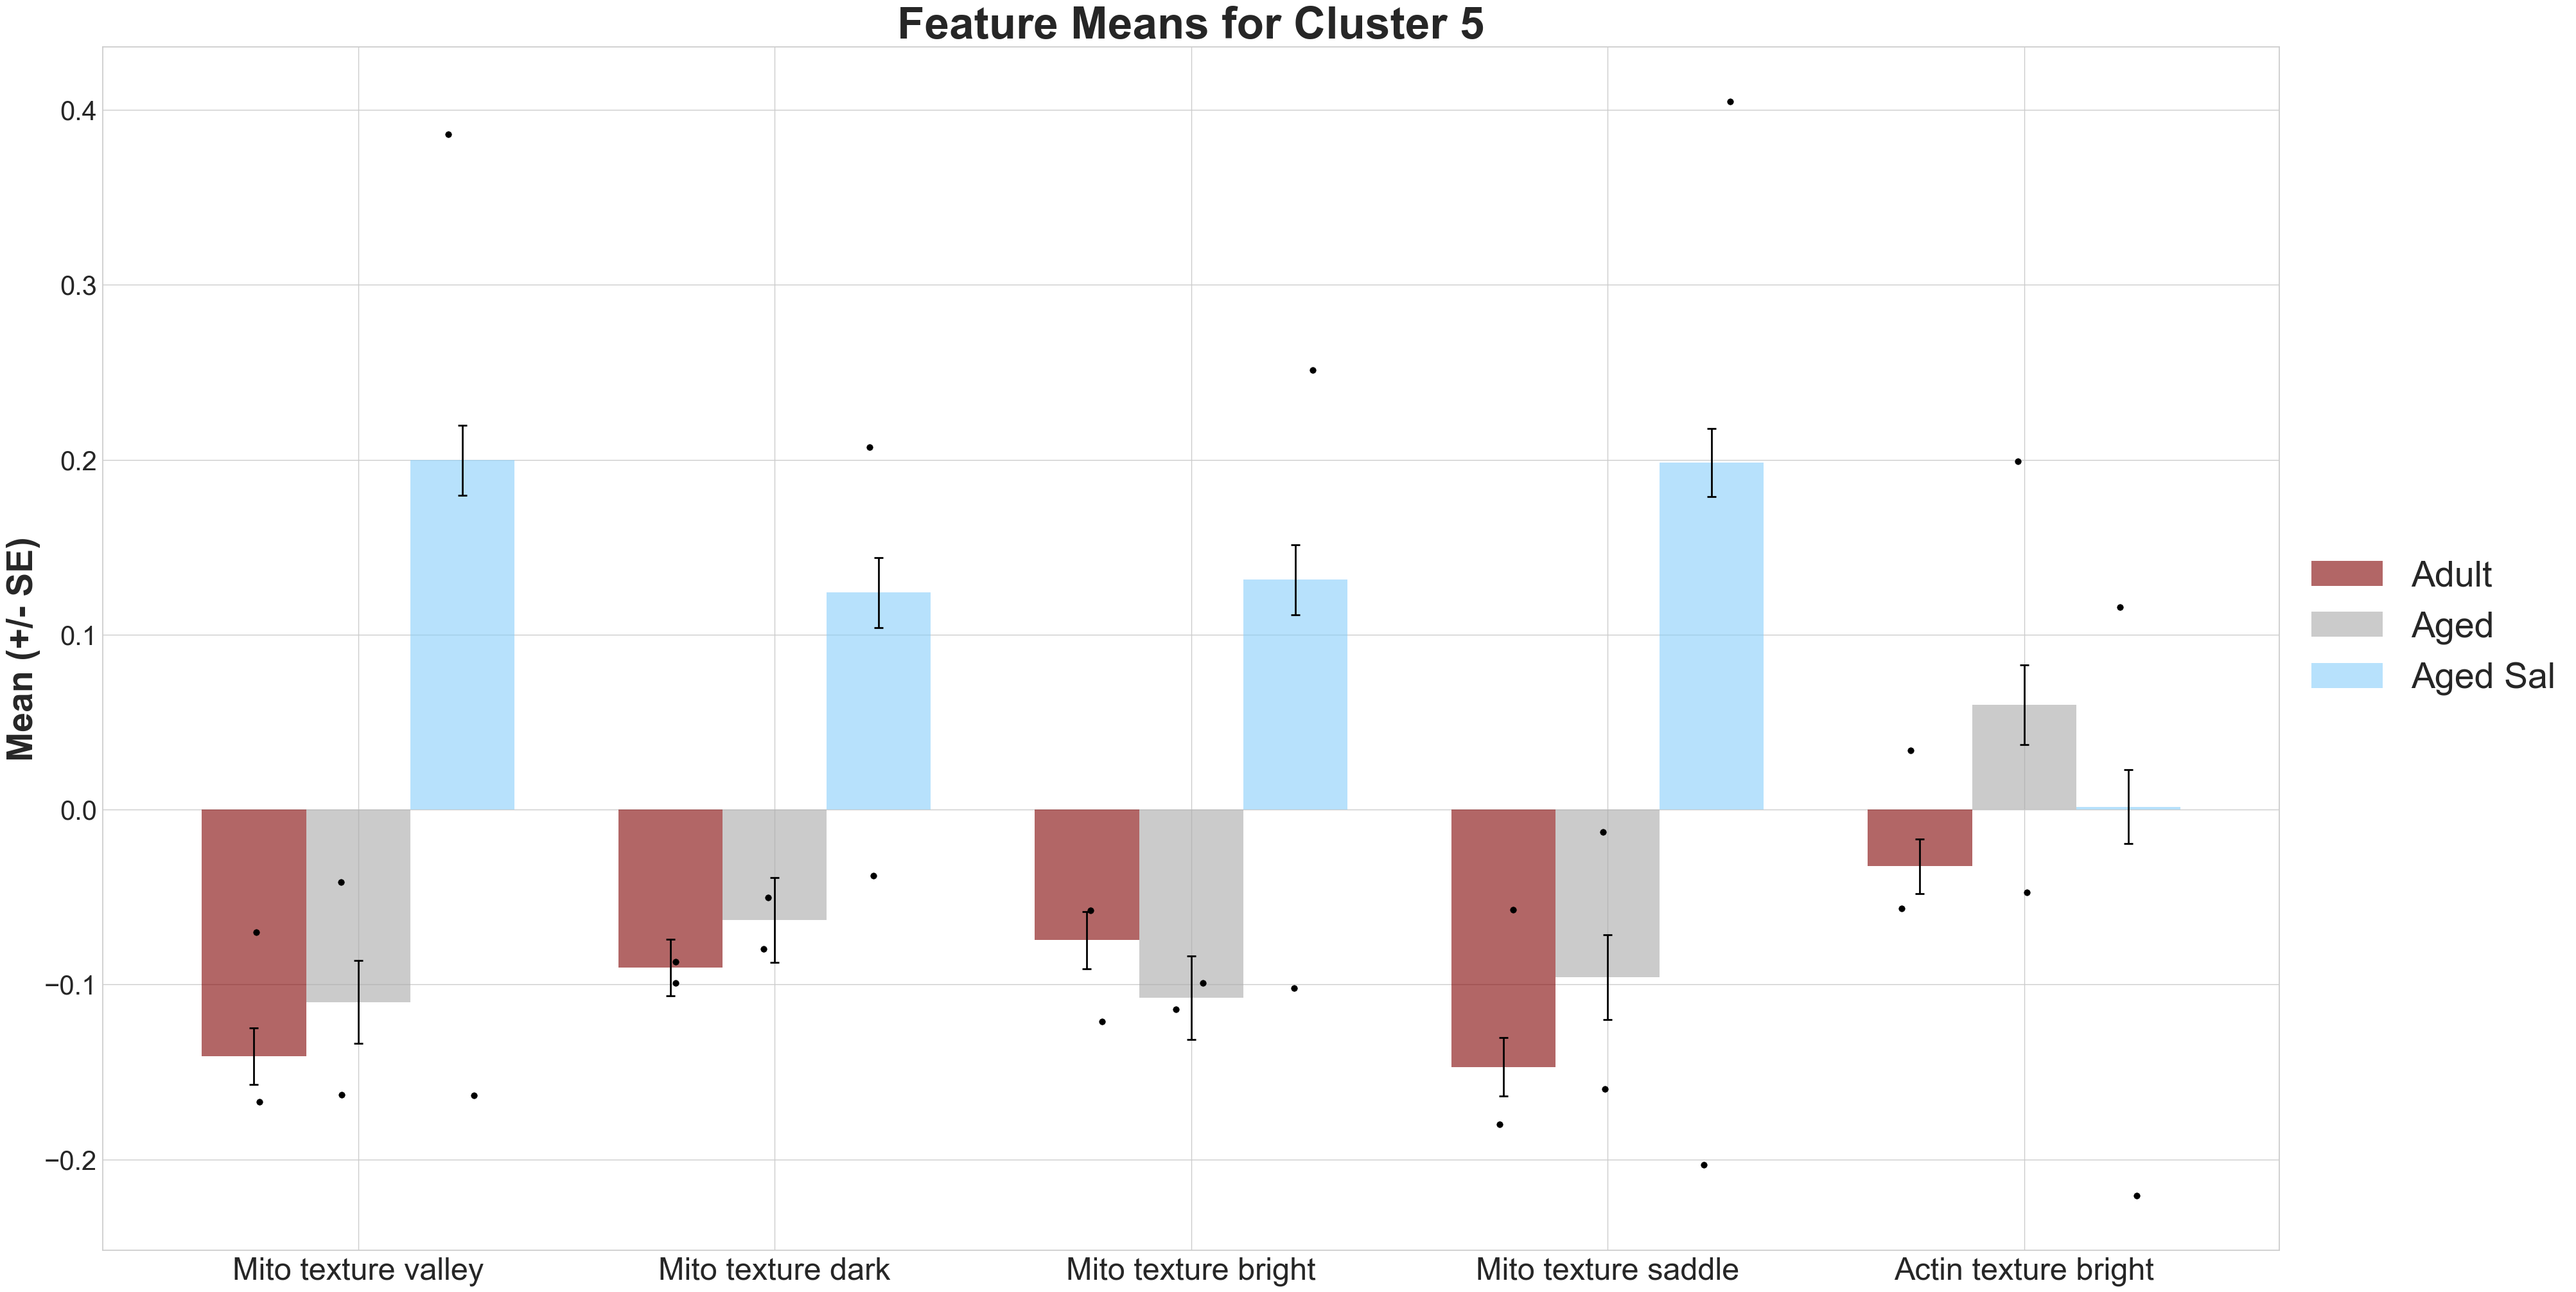

In [181]:
viz_cluster_feat(clust5_data,"Feature Means for Cluster 5","clust5.png")

# IGNORE

In [23]:
# """
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Spot 0.2 px': 'Nucleoli texture spot',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Hole 0.2 px': 'Nucleoli texture hole',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Edge 0.2 px': 'Nucleoli texture edge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Ridge 0.2 px': 'Nucleoli texture ridge',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Valley 0.2 px': 'Nucleoli texture valley',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Saddle 0.2 px': 'Nucleoli texture saddle',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Bright 0.2 px': 'Nucleoli texture bright',
# 'Nuclei - Cytoplasm SYTO 14 - phenovue 512 nucleic acid SER Dark 0.2 px': 'Nucleoli texture dark',
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Mean': ,
# 'Nuclei - Intensity Nucleus SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cytoplasm SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Mean',
# 'Nuclei - Intensity Cell SYTO 14 - phenovue 512 nucleic acid Sum',
# 'Nuclei - Cell Phalloidin/Alexa Flour 568 - actin, cytoskeleton, golgi, plasma membrane SER Dark 0.2 px': 'Actin texture dark',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'ER texture spot',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'ER texture hole',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'ER texture edge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'ER texture ridge',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'ER texture valley',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'ER texture saddle',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'ER texture bright',
# 'Nuclei - Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'ER texture dark'
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Spot 0.2 px': 'RNA texture spot',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Hole 0.2 px': 'RNA texture hole',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Edge 0.2 px': 'RNA texture edge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Ridge 0.2 px': 'RNA texture ridge',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Valley 0.2 px': 'RNA texture valley',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Saddle 0.2 px': 'RNA texture saddle',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Bright 0.2 px': 'RNA texture bright',
# 'Nuclei - Nucleus Concanavalin A/Alexa Flour 488 Conjugate SER Dark 0.2 px': 'RNA texture dark',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Mean': 'ER intensity sum',
# 'Nuclei - Intensity Cytoplasm Concanavalin A/Alexa Flour 488 Conjugate Sum': 'ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA+ER intensity mean',
# 'Nuclei - Intensity Cell Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA+ER intensity sum',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Mean': 'RNA intensity mean',
# 'Nuclei - Intensity Nucleus Concanavalin A/Alexa Flour 488 Conjugate Sum': 'RNA intensity sum',
# """